## **Bank Marketing Campaign:** <br> **Customer Profiling for Term Deposit Telemarketing**

By Raymond Arifianto Jonathan

### **Contents**

1. Problem Statement
1. Libraries
1. Data Understanding
1. Exploratory Data Analysis (EDA) for Data Cleaning
1. Preprocessing (Data Cleaning, Feature Selection, Feature Engineering)
1. Methodology (Modeling / Analysis)
1. Conclusion and Recommendation

****

### **1. Business Problem Understanding**

#### **Context**

The year is 2014. Bank XYZ is a European commercial bank that offers financial products to its customers. The recent financial crisis pressured European banks to increase regulatory capital in order to ensure that banks have enough liquid capital to be able to honor withdrawals whilst facing operating losses. One of the strategies Bank XYZ took is aiming to increase their capital requirements by selling more long-term deposits.

A long-term deposit is a fixed-term investment, which involves the bank client storing money into a deposit account and not being able to withdraw from this account until the fixed term matures. In return, the bank client receives an interest that is usually of a better rate than a savings account.

Source:
https://www.investopedia.com/terms/t/termdeposit.asp

Currently, Bank XYZ is running telemarketing campaigns to sell long-term deposits. These telemarketing campaigns are operated remotely through call centers.

#### **Problem Statement**

On 2014, European banks were facing a variety of challenges, including economic uncertainty and increased regulatory scrutiny following the global financial crisis on 2007-2008. Economic growth is sluggish, with the European Central Bank maintained historically low interest rates for an extended period to stimulate economic activity and facilitate recovery. Investors are now also more cautious than ever due to the collective public distrust in financial institutions. It is an overall hard period of time for banks in Europe, especially offering any form of investment.

Naturally, people are reluctant to subscribe to a term-deposit at this time period. As such, identifying potential customers who are still likely to subscribe to one is very crucial for banks so that they can prioritize telemarketing efforts to them. While call centers are not too costly to run inefficiently and indiscriminatively, it is certainly very preferable to target those who are more likely to subscribe to a term deposit so that more customers can be attained in shorter time.

https://www.euribor-rates.eu/en/euribor-rates-by-year/

#### **Goals**

Based on the defined problems, increasing revenue gain from term deposit subscription is the main goal of the bank.

In order to achieve the goal, we set the following guidelines:
1. Increase revenue by getting more clients to subscribe to a term deposit
2. Increase call center efficiency to reduce operational cost
3. Understand what are the characteristics of customers who are more likely to subscribe to a term deposit with the bank

Based on the guideline, `increasing the telemarketing success rate through customer profiling` would be our main goal

#### **Analytic Approach**

Based on our goals, the bank would like to classify which of their clients who are willing to subscribe to a term deposit in order to increase the telemarketing campaign's success rate.

In addition, the bank would also like to know what are the most important characteristics for clients to be more willing to subscribe to term deposit

As such, the ML objective is to build a classification model that can classify the outcome of the marketing campaign accurately. In this ML development, the outcome is the target variable as follows:
<br>

Target : `y` <br>
- 'yes' : The marketing campaign was successful. The client subscribed to term deposit with the bank. <br>
- 'no' : The marketing campaign was not successful. The client did not subscribe to term deposit with the bank.

We will develop a predictive model that classifies clients into two categories: those who are likely to subscribe to a long-term deposit and those who are not. The model should use the historical data to identify patterns and features that are indicative of subscription likelihood. Once the model is trained and validated, it can be used to identify potential clients before launching telemarketing campaigns.

**ML Modelling**

Initially, the modelling will be done with 4 different treatment to the dataset:
1. Without Outliers and Missing Values Handling (Missing Values will be treated as its own categorical value or removed if numerical)
2. With Outliers Handled
3. With Missing Values Handled
4. With (Full Data Cleaning)

After selecting which dataset performs better during the model benchmarking stage, we will continue to fully optimize the model and take a look at its model importance.

Using Feature Selection done by statistical testing, multicolinearity check, and model importance from the best model, we will create one more model with Feature Selection (dataset 5) and compare its performance against the previous model to select the best model to proceed with.

Once the model is done, we can use the model to run client profiling on new client data in order to label those who are interested as potential customers worth calling.

**Data Analysis**

After the modelling is done, we will evaluate feature importance scored by our ML model to identify the 8 most important features which contributes the greatest towards customer's likelihood to subscribe to a term deposit.

Through data analysis, we then find the trends for each features to understand what are the characteristics of customers who are more likely to be interested to subscribe to a term deposit in order to correlate them to a certain demographic.

Knowing the right demographic more susceptible to term deposit telemarketing will enable us to understand their behaviours, which will be very valuable in formulating business suggestions.

#### **Metric Evaluation**

Type 1 error: False Positive  
Consequence: Loss from unnecessary telemarketing effort (time, manpower, budget)

Type 2 error: False Negative  
Consequence: Losing potential customers

According to Moro et al. (2014), false negatives are more costly for the context of this problem statement due to two reasons:
1. As mentioned in the problem statement, the bank's priority is to increase their regulatory capital due to the pressure from the recent financial crisis. Hence, the priority is to minimize false negatives, which is losing potential customers.
2. Secondly, the cost of making calls to potential clients is very low due to the use of telecommunication bundle packages. Hence, false positives (wasting telemarketing resources) is not a concern because these resources are relatively cheap.

Therefore, this signifies that modelling and analysis should maximise the true positives (TP) and reduce the false negatives (FN). In other words, our model should be focused on sensitivity.

The best evaluation metric to build a sensitive model is `recall` in order to maximize the true positive and minimize false negative.

Recall = TP / (TP + FN)


In addition, `f1 score` is a widely used metric for classification which can be used to maintain an acceptable level of precision balance with the recall.
F1 score can also help benchmark our model against other versions.


****

### **2. Libraries**

In [1]:
# Array and DataFrame
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

# Feature Engineering
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalanced Classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay, recall_score, f1_score, accuracy_score, precision_score

# Hide Warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Create variable to store random_state number
seed = 42

# Set max columns
pd.set_option('display.max_columns', None)

import pickle

****

### **3. Data Understanding**

In [2]:
# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### **Attribute Information**

- There are 41118 rows and 21 columns.
- Each row of data represents multiple information attribute about a client.
- Each column represents an attribute containing information about that attribute for every client.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| age | quantitative | Age of client
| job | categorical | Type of job of client
| marital | categorical | Marital status of client
| education | categorical | Education level of client
| default | categorical | Whether the client has credit in default
| housing | categorical | Whether the client has housing loan
| loan | categorical | Whether the client has personal loan
| contact | categorical | Communication channel for contact with client
| month | categorical | Month for last contact with client
| day_of_week | categorical | Day of the week for last contact with client
| duration | quantitative | Duration, in seconds, of last contact with client
| campaign | quantitative | Number of times the client was contacted during this campaign, including last contact
| pdays | quantitative | Number of days since the client was last contacted during a previous campaign (999 means that the client was not contacted previously)
| previous | quantitative | Total number of times the client was contacted before this campaign
| poutcome | categorical | Outcome of the previous campaign
| emp.var.rate | quantitative | Employment variation rate (quaterly indicator)
| cons.price.idx | quantitative | Consumer price index (monthly indicator)
| cons.conf.idx | quantitative | Consumer confidence index (monthly indicator)
| euribor3m | quantitative | Euribor 3 month rate (daily indicator)
| nr.employed | quantitative | Average of the Total Number of Employed Citizens (quaterly indicator)
| y | categorical | Target variable. 'yes': Client subscribed for term deposit. 'no': Client did not subscribe for term deposit.

Important Note - For `Duration`:
- This attribute highly affects the output target (e.g., if duration=0 then y="no"). 
- Yet, the duration is not known before a call is performed.
- Also, after the end of the call y is obviously known. 
- Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Based on Feature Type**
| **Type** | **Sub-type** | **Variables / Features** |
| --- | --- | --- |
| Quantitative | Continuous | `age`, `duration`, `pdays`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m` |
| Quantitative | Discrete | `campaign`, `previous`, `nr.employed` |
| Categorical | Ordinal | `education` |
| Categorical | Nominal | `job`, `marital`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome` |
| Categorical | Target Variable - Binary | `y` |

In [4]:
# Statistical summary
display(df.describe(), df.describe(include=object))

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

**Proportion of Target Variable**

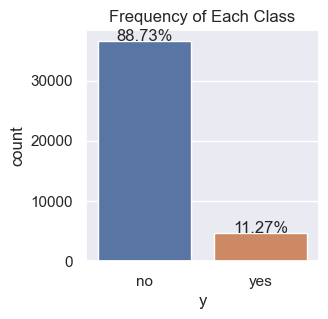

In [5]:
# Proportion of target variable to check for imbalance
plt.figure(figsize=(3,3))
ax_churn = sns.countplot(data=df, x='y')
plt.title('Frequency of Each Class')
for bar in ax_churn.patches:
    ax_churn.annotate(f'{(bar.get_height()/41188)*100:.2f}%', (bar.get_x() +  bar.get_width()/2, bar.get_height()), ha='center')

The proportion of Target Data (`y` = 1) compared to the rest is only 11%. This indicates major data imbalance, and we should consider using data balancing methods during modelling

#### **Summary of Data Understanding**

- The proportion of target variable is imbalanced - there are more 'yes' values than 'no' values. Hence, imbalanced classification techniques should be explored for modeling.
- The 21 columns contain 1 target variable `y` and 20 other features.
- Out of the 20 features, there are 10 quantitative features and 10 categorical features as follows:

- The data can be grouped into client demographic data, data related to most recent contact during current campaign, historical data related to all prior communications with the client (previous campaigns) and socio-economic context/attributes as follows:

| **Data Group** | **Features** | **Notes** |
| --- | --- | --- |
| Client demographic | `age`, `job`, `marital`, `education`, `default`, `housing`, `loan` | placeholder |
| Related to most recent contact during current campaign | `contact`, `month`, `day_of_week`, `duration`, `y` | placeholder |
| Historical / Prior communications including previous campaigns | `campaign`, `pdays`, `previous`, `poutcome` | placeholder  |
| Macroeconomic indices | `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed` | placeholder |

In [6]:
#Categorization based on Data Type
quantitative_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

continuous_features = ['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
discrete_features = ['campaign', 'previous', 'nr.employed']

In [7]:
#Categorization of Feature Group
demo_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
lcon_features = ['contact', 'month', 'day_of_week', 'duration']
prev_features = ['campaign', 'pdays', 'previous', 'poutcome']
sec_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

****

### **4. Exploratory Data Analysis (EDA) for Data Cleaning**
In this section, unique values and distributions of quantitative and categorical data are plotted to detect missing values and outliers so that these can be cleaned in the next data cleaning section.
- Unique Values for Quantitative Data
- Distribution Plots for Quantitative Data
- Data Cardinalities of Categorical Features
- Distribution Plots of Categorical Features

**Unique Values for Quantitative Data**

In [8]:
listItem = []
for col in quantitative_features :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(5).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0             age    int64     0      0.0      78   
1        duration    int64     0      0.0    1544   
2        campaign    int64     0      0.0      42   
3           pdays    int64     0      0.0      27   
4        previous    int64     0      0.0       8   
5    emp.var.rate  float64     0      0.0      10   
6  cons.price.idx  float64     0      0.0      26   
7   cons.conf.idx  float64     0      0.0      26   
8       euribor3m  float64     0      0.0     316   
9     nr.employed  float64     0      0.0      11   

                               uniqueSample  
0                      [73, 55, 31, 49, 48]  
1                [319, 1036, 551, 412, 772]  
2                       [14, 18, 24, 42, 6]  
3                      [4, 19, 999, 13, 25]  
4                           [7, 4, 6, 3, 5]  
5            [-3.4, -3.0, -1.1, -1.7, -2.9]  
6  [93.876, 92.379, 93.798, 92.649, 94.055]  
7       [-47.1, -40.8, -31.4, -50.0, -41.8]  
8        [0.896, 0.712, 0.74, 0.972, 0.743]  
9  [5228.1, 5023.5, 5099.1, 5176.3, 5195.8]

- Note: For `pdays`, 999 means that the client was not previously contacted.
- Range of values of other features make sense.
- Next, distribution plots of quantitative features using boxplot and histograms will be used to detect outliers and explore the data further.

**Distribution Plots of Quantitative Data**

Distribution of age:



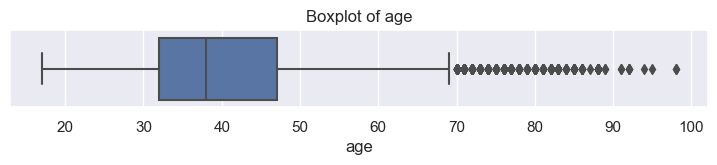

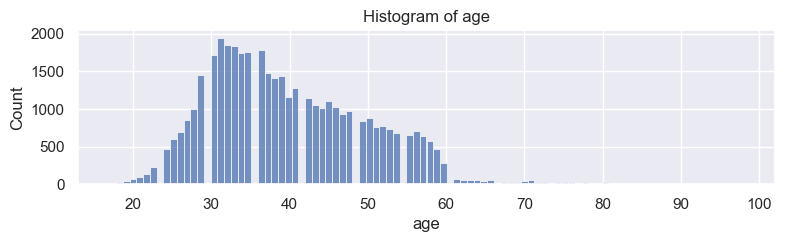

The mode of age is 31.
31    1947
32    1846
33    1833
Name: age, dtype: int64
The mean of age is 40.02406040594348.
The median of age is 38.0.
--------------------------------------------------------------------------------------------------- 

Distribution of duration:



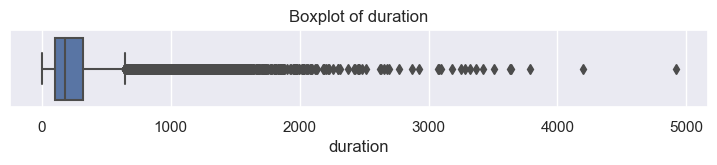

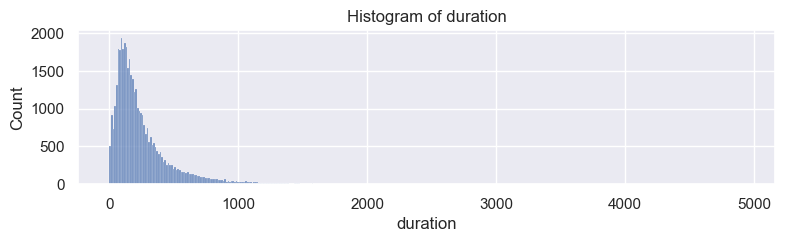

The mode of duration is 85.
90     170
85     170
136    168
Name: duration, dtype: int64
The mean of duration is 258.2850101971448.
The median of duration is 180.0.
--------------------------------------------------------------------------------------------------- 

Distribution of campaign:



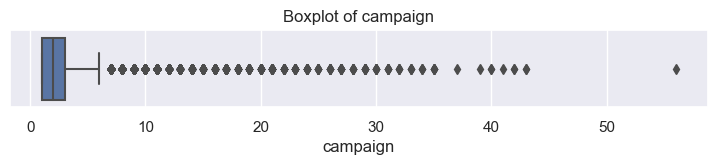

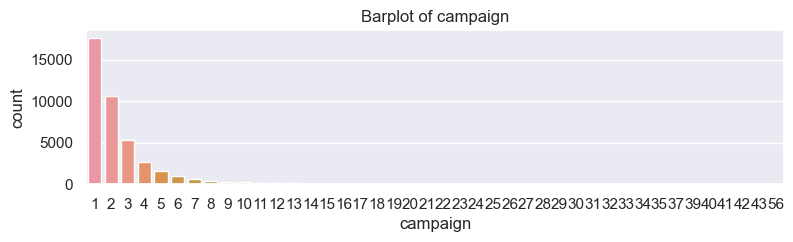

The mode of campaign is 1.
1    17642
2    10570
3     5341
Name: campaign, dtype: int64
The mean of campaign is 2.567592502670681.
The median of campaign is 2.0.
--------------------------------------------------------------------------------------------------- 

Distribution of pdays:



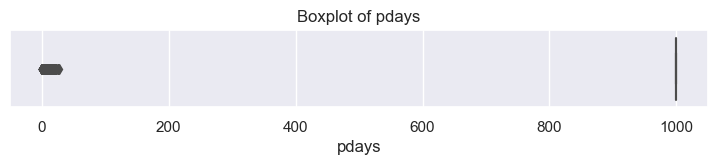

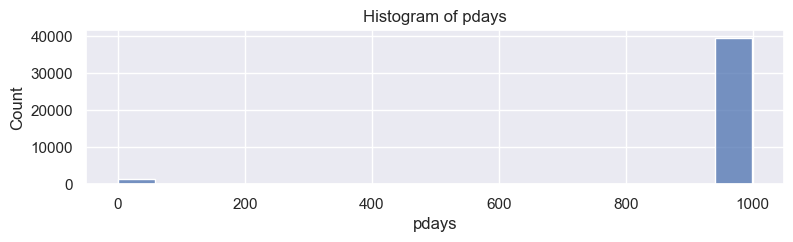

The mode of pdays is 999.
999    39673
3        439
6        412
Name: pdays, dtype: int64
The mean of pdays is 962.4754540157328.
The median of pdays is 999.0.
--------------------------------------------------------------------------------------------------- 

Distribution of previous:



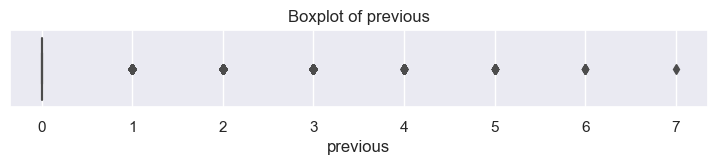

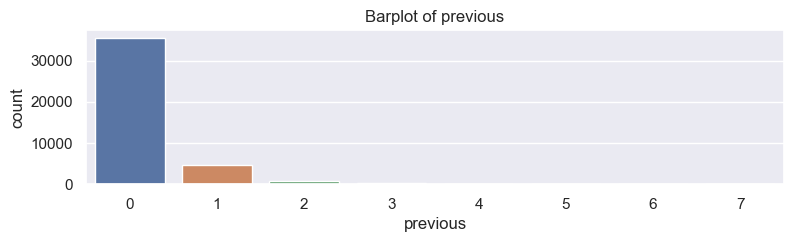

The mode of previous is 0.
0    35563
1     4561
2      754
Name: previous, dtype: int64
The mean of previous is 0.17296299893172767.
The median of previous is 0.0.
--------------------------------------------------------------------------------------------------- 

Distribution of emp.var.rate:



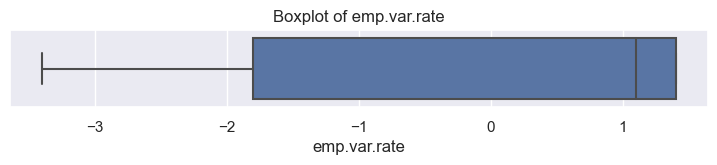

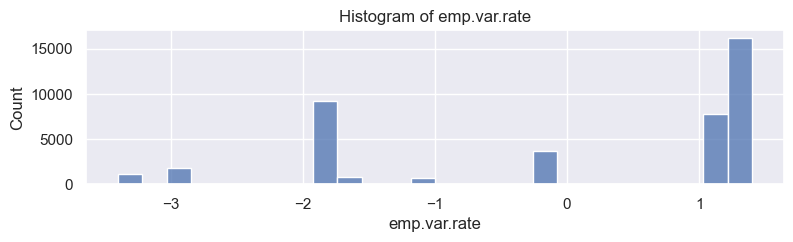

The mode of emp.var.rate is 1.4.
 1.4    16234
-1.8     9184
 1.1     7763
Name: emp.var.rate, dtype: int64
The mean of emp.var.rate is 0.08188550063125165.
The median of emp.var.rate is 1.1.
--------------------------------------------------------------------------------------------------- 

Distribution of cons.price.idx:



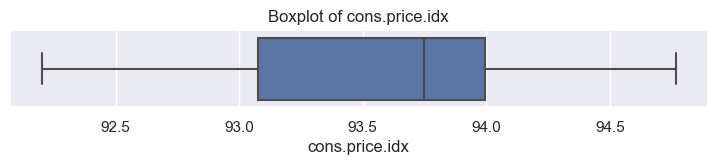

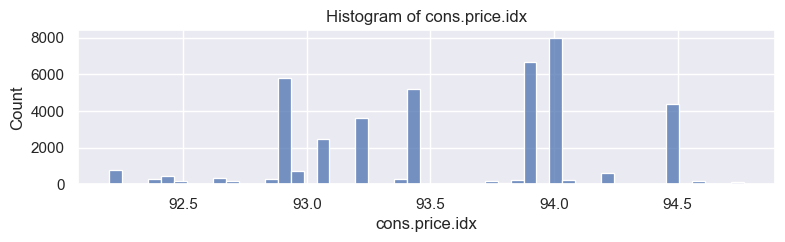

The mode of cons.price.idx is 93.994.
93.994    7763
93.918    6685
92.893    5794
Name: cons.price.idx, dtype: int64
The mean of cons.price.idx is 93.57566436826262.
The median of cons.price.idx is 93.749.
--------------------------------------------------------------------------------------------------- 

Distribution of cons.conf.idx:



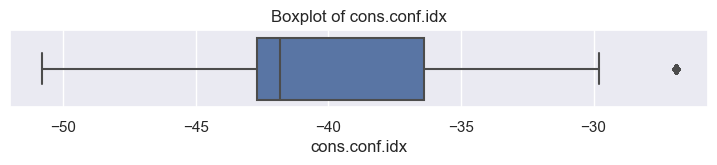

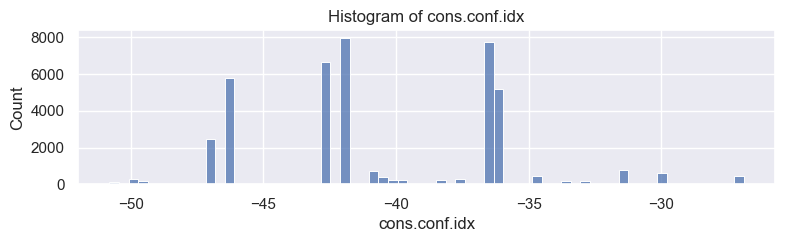

The mode of cons.conf.idx is -36.4.
-36.4    7763
-42.7    6685
-46.2    5794
Name: cons.conf.idx, dtype: int64
The mean of cons.conf.idx is -40.50260027192386.
The median of cons.conf.idx is -41.8.
--------------------------------------------------------------------------------------------------- 

Distribution of euribor3m:



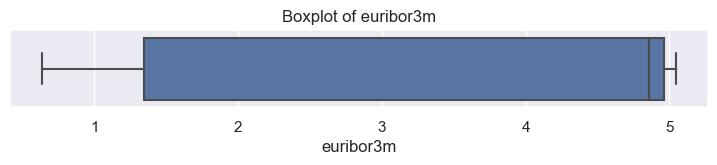

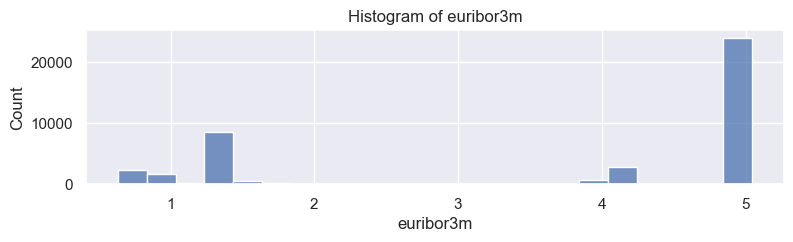

The mode of euribor3m is 4.857.
4.857    2868
4.962    2613
4.963    2487
Name: euribor3m, dtype: int64
The mean of euribor3m is 3.621290812858114.
The median of euribor3m is 4.857.
--------------------------------------------------------------------------------------------------- 

Distribution of nr.employed:



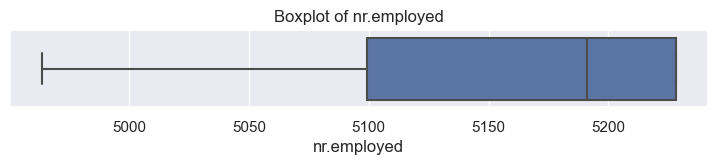

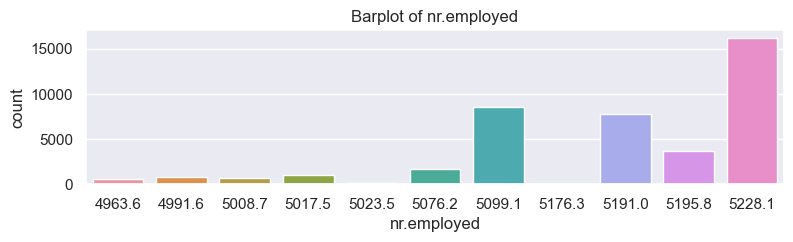

The mode of nr.employed is 5228.1.
5228.1    16234
5099.1     8534
5191.0     7763
Name: nr.employed, dtype: int64
The mean of nr.employed is 5167.035910944936.
The median of nr.employed is 5191.0.
--------------------------------------------------------------------------------------------------- 



In [9]:
# Distribution of Quantitative Features
for col in quantitative_features:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    else:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.countplot(data=df, x=df[col])
        plt.title(f'Barplot of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

**Summary of Distributions of Quantitative Data**
- Outliers exist in `age`, `duration`, `campaign`, `cons.conf.idx`, and `previous`
    - outliers at `cons.conf.idx` should not be handled considering that it is the socio-economic condition which is fundamental to understand the context of the uncontrollable situation
    - Check best way to handle each outliers
- `pdays` have too many values at 999 (no previous days)
    - Check best way to handle it

**Data Cardinalities of Categorical Features**

In [10]:
listItem = []
for col in categorical_features :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0          job   object     0      0.0      12   
1      marital   object     0      0.0       4   
2    education   object     0      0.0       8   
3      default   object     0      0.0       3   
4      housing   object     0      0.0       3   
5         loan   object     0      0.0       3   
6      contact   object     0      0.0       2   
7        month   object     0      0.0      10   
8  day_of_week   object     0      0.0       5   
9     poutcome   object     0      0.0       3   

                                                                                                                             uniqueSample  
0  [housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]  
1                                                                                                    [married, single, divorced, unknown]  
2                                [basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]  
3                                                                                                                      [no, unknown, yes]  
4                                                                                                                      [no, yes, unknown]  
5                                                                                                                      [no, yes, unknown]  
6                                                                                                                   [telephone, cellular]  
7                                                                                      [may, jun, jul, aug, oct, nov, dec, mar, apr, sep]  
8                                                                                                               [mon, tue, wed, thu, fri]  
9                                                                                                         [nonexistent, failure, success]

**Summary of Data Cardinality for Categorical Data**
- It can be observed that missing values are present in the form of string column values:
    - 'unknown' in `job`, `marital`, `education`, `default`, `housing`, `loan`
    - 'nonexistent' in `poutcome`
<br>
- Most of the categorical features have low cardinalities, except for `job`, `education` and `month`, which have a high cardinality of >= 8 column values.

Other information gained from table above:
- Calls are made only during weekdays.
- There are no last contact calls in January and February.
- There are only 2 channels of communication - via cellular and via telephone (landline).

**Distribution of Categorical Data**

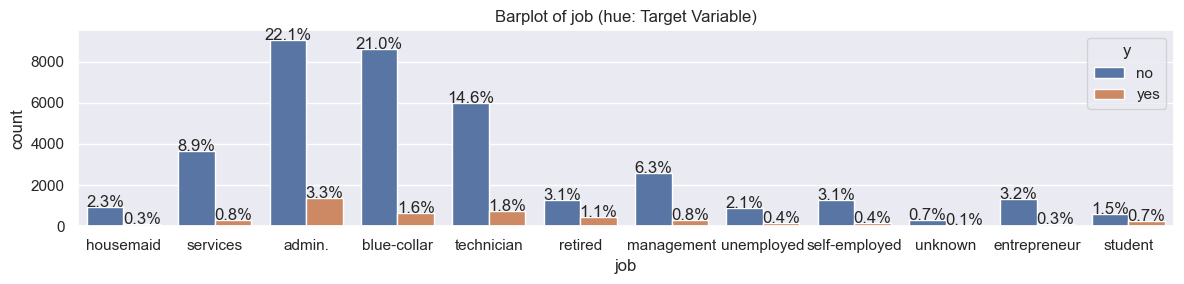

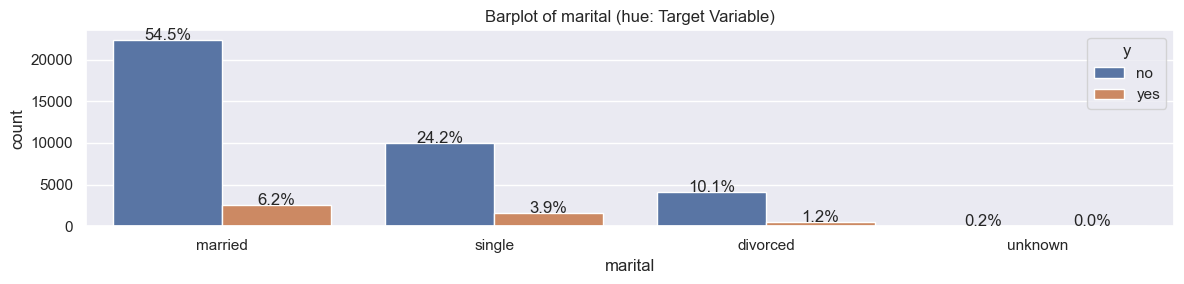

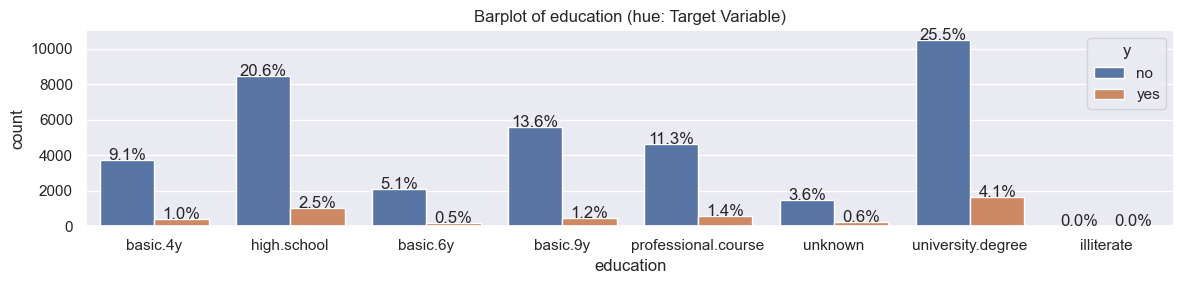

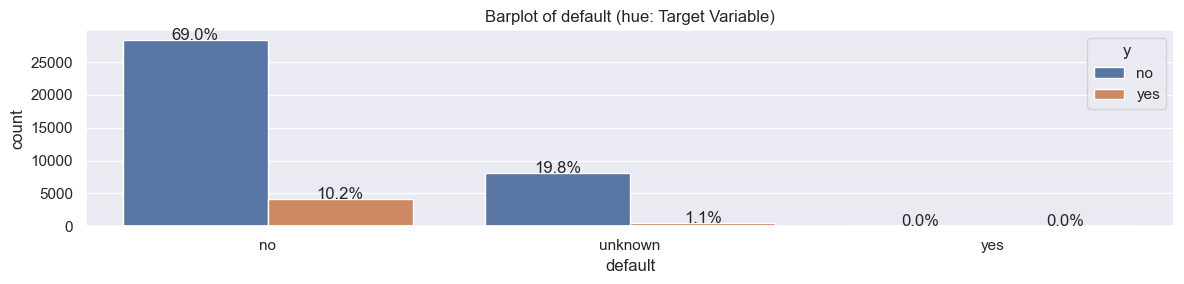

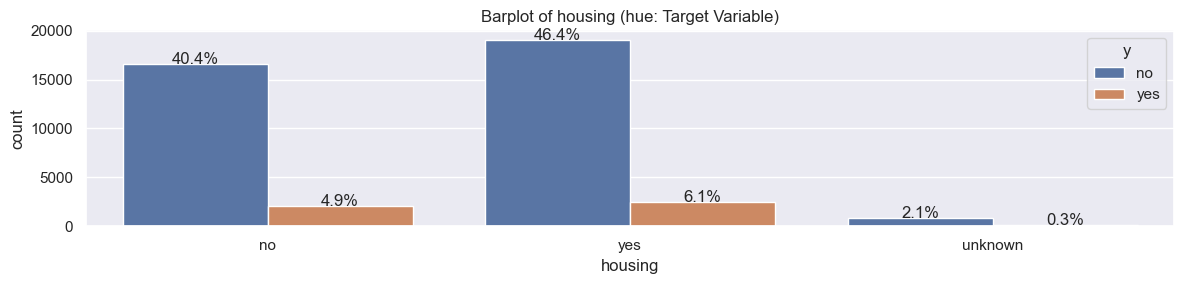

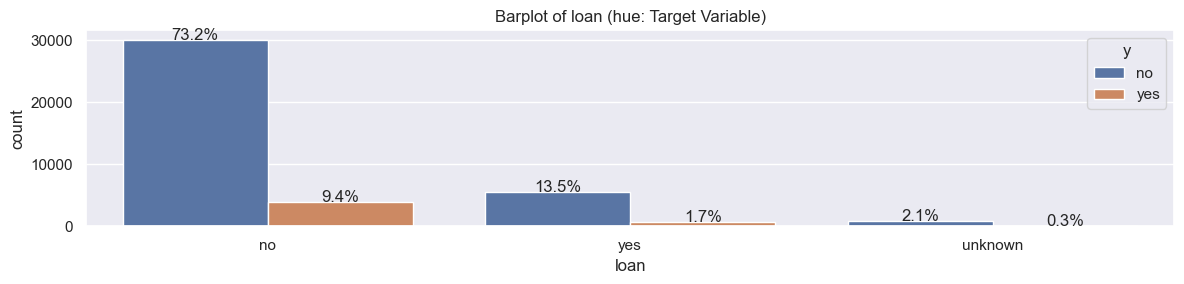

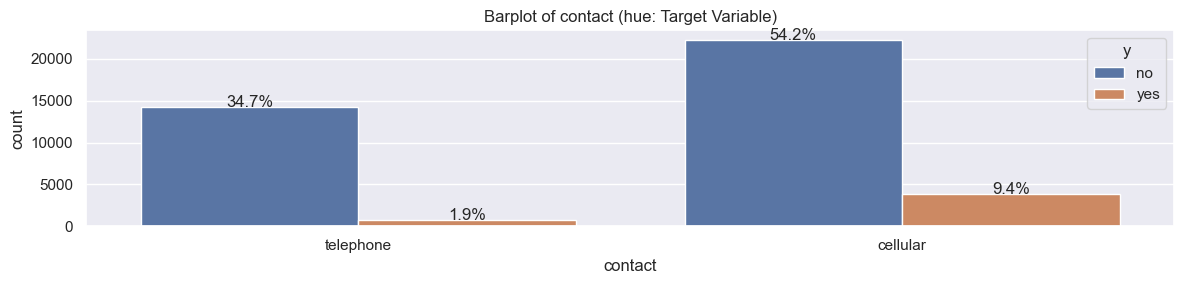

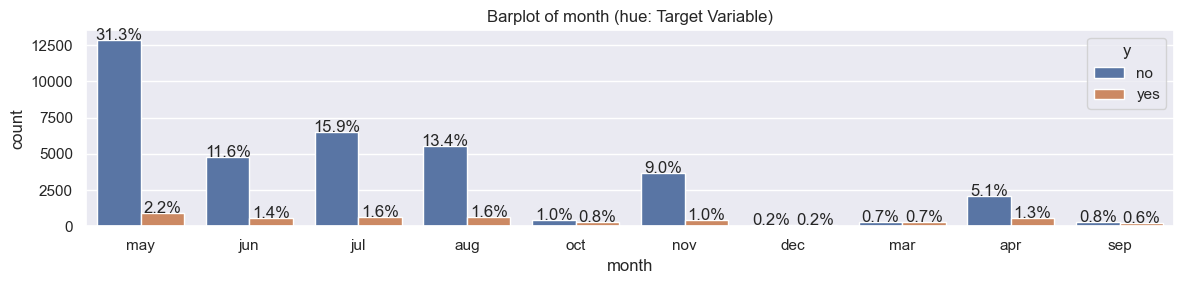

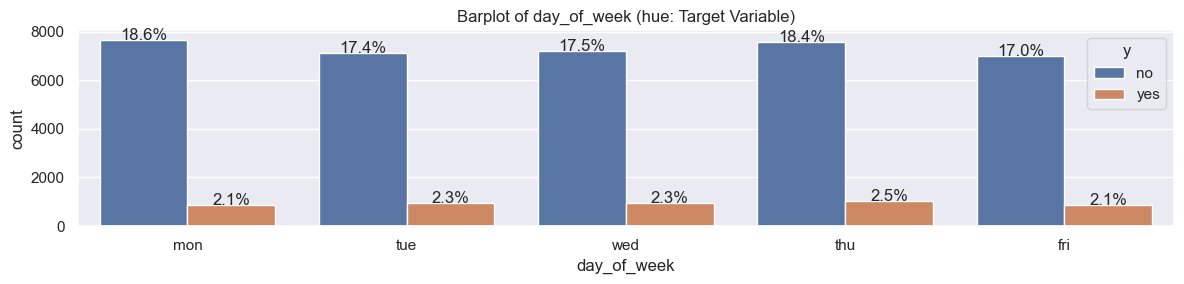

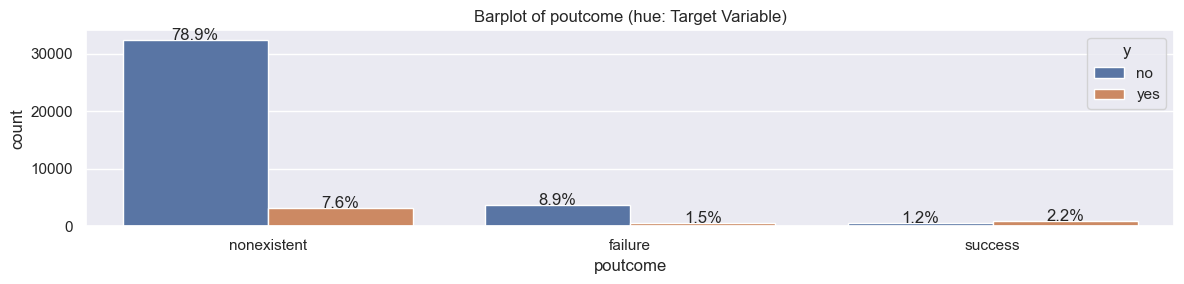

In [11]:
for feature in categorical_features:
   plt.figure(figsize=(12,3))
   ax = sns.countplot(data=df, x=feature, hue='y')
   for bar in ax.patches:
      ax.annotate(f'{(bar.get_height()/41118)*100:.1f}%', (bar.get_x() +  bar.get_width()/2, bar.get_height()), ha='center')
   plt.title(f'Barplot of {feature} (hue: Target Variable)')
   plt.tight_layout()
   plt.show()

Based on the distribution plot above, we can infer that:
- The majority of the bank's clients is from the following demographic:
    - Occupation (`job`): 'admin', followed by 'blue-collar' and 'technician'.
    - Marital status (`marital`): 'married', followed by 'single' with a significant margin
    - Education Level (`education`): 'university.degree', followed by 'high.school' and 'basic.9y'
    - Default credit status (`default`): 'No' default
    - Housing Loan (`housing`): 'Yes'
    - Personal Loan (`loan`): 'No' loans
- 'Cellular' is the most popular type of `contact` made for telemarketing effort
- Most calls are done at the `month` of 'may'
- The number of calls are done quite equally during any `day of week`
- Most data from `poutcome` is nonexistent, meaning the outcome of the previous call is unknown or there is no previous call
- Overall, the proportion of Missing Values ('unknown') varies between each features

****

### **5. Preprocessing (Data Cleaning, Feature Selection and Feature Engineering)**

In [12]:
# Make a copy of the dataframe before preprocessing
dfc = df.copy()

**Cleaning Duplicates**

In [13]:
#check duplicate sum
df.duplicated().sum()

12

In [14]:
#drop duplicates from all databases
df.drop_duplicates(inplace=True)
dfc.drop_duplicates(inplace=True)

In [15]:
#check duplicate sum after removing
dfc.duplicated().sum()

0

**Identify Missing Values**

- From the EDA Section, it can be observed that missing values are present in the form of string column values:
    - 'unknown' in `job`, `marital`, `education`, `default`, `housing`, `loan`
    - 'nonexistent' in `poutcome`

Next, check for the presence of NaN in the data.

In [16]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The nonexistence of NaN implies that this data has been previously cleaned before being handed to us by imputing the Missing Values in the Categorical Features with 'unknown' and 'nonexistent'.

Since there are no NaN, only the columns with 'unknown' or 'nonexistent' have to be cleaned.

Prior to cleaning, these values will be replaced with NaN to facilitate visualization.

In [17]:
# Replace 'nonexistent' and 'unknown' with NaN
dfc.replace('nonexistent', np.NaN, inplace=True)
dfc.replace('unknown', np.NaN, inplace=True)

In [18]:
# Proportion of missing values
list_missing_values = []
for col in ['poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan']:
    list_missing_values.append([col,
                                dfc[col].dtype, 
                                dfc[col].isna().sum(), 
                                round((dfc[col].isna().sum()/len(dfc[col])) * 100, 2), 
                                dfc[col].nunique(), 
                                list(dfc[col].sample(2))])

df_missing_values = pd.DataFrame(columns=['Attribute',
                                          'Data Type',
                                          'Number of Missing Values',
                                          'Percentage of Missing Values',
                                          'Number of Unique Values',
                                          'Samples of Unique Values'],
                                data=list_missing_values)
display(df_missing_values)

Attribute Data Type  Number of Missing Values  \
0   poutcome    object                     35551   
1        job    object                       330   
2    marital    object                        80   
3  education    object                      1730   
4    default    object                      8596   
5    housing    object                       990   
6       loan    object                       990   

   Percentage of Missing Values  Number of Unique Values  \
0                         86.34                        2   
1                          0.80                       11   
2                          0.19                        3   
3                          4.20                        7   
4                         20.88                        2   
5                          2.40                        2   
6                          2.40                        2   

  Samples of Unique Values  
0               [nan, nan]  
1    [blue-collar, admin.]  
2       [married, married]  
3  [high.school, basic.4y]  
4                 [no, no]  
5               [yes, yes]  
6                 [no, no]

- `default` contains the highest proportion of missing values (20.88%), hence, it is important to understand the nature of the missing values in `default`.
- `marital` and `job` contain the lowest proportions of missing values (<1%). If no pattern is found for these missing values, dropping these rows can be considered.
- `education`, `housing` and `loan` have between 2-5% missing values.

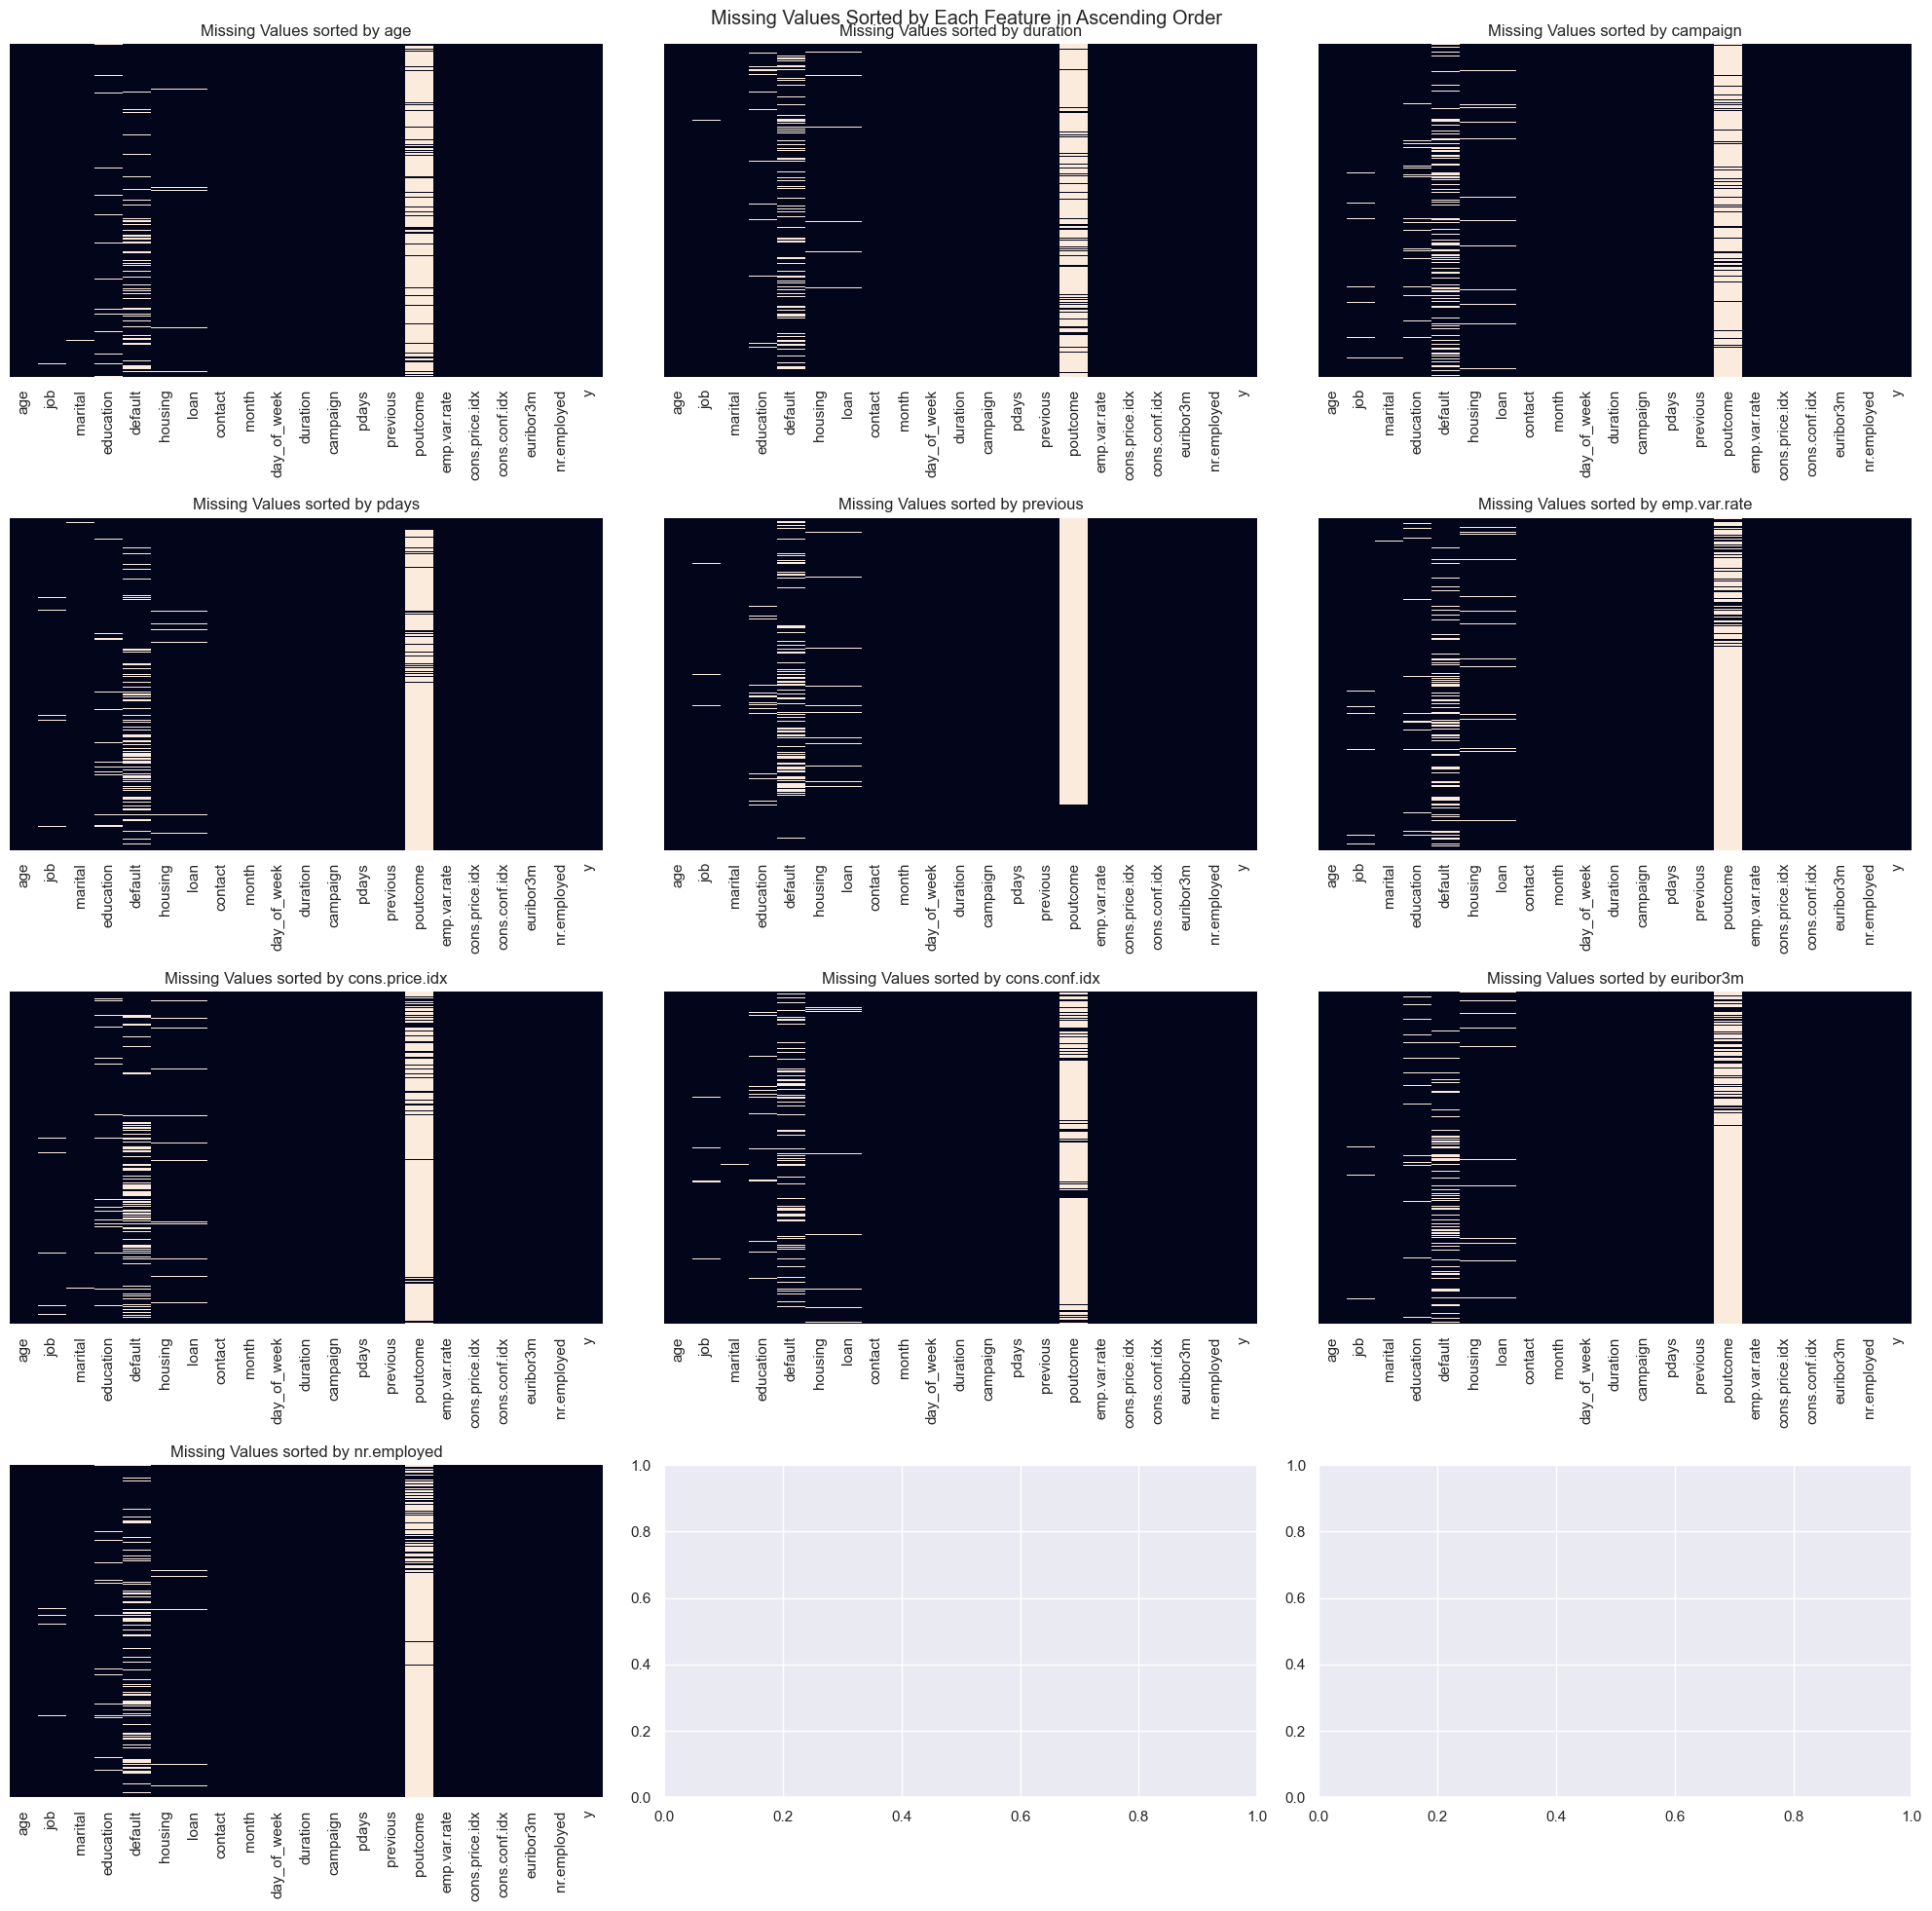

In [19]:
# Distribution of Missing Values sorted by each quantitative feature
fig_mv, ax_mv = plt.subplots(4, 3, figsize=(20,20))
fig_mv.suptitle('Missing Values Sorted by Each Feature in Ascending Order')
for feature, ax in zip(quantitative_features, ax_mv.ravel()):
    sns.heatmap(dfc.sort_values(by=feature).isna(), cbar=False, ax=ax)
    ax.set_title(f'Missing Values sorted by {feature}')
    ax.set(yticklabels=[])
plt.tight_layout()

- Missing values in `poutcome` are related to `previous` - Missing At Random (MAR).
- Missing values in `job` are related to `emp.var.rate` - Missing At Random (MAR).
- Missing values in `default` are related to `age`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`

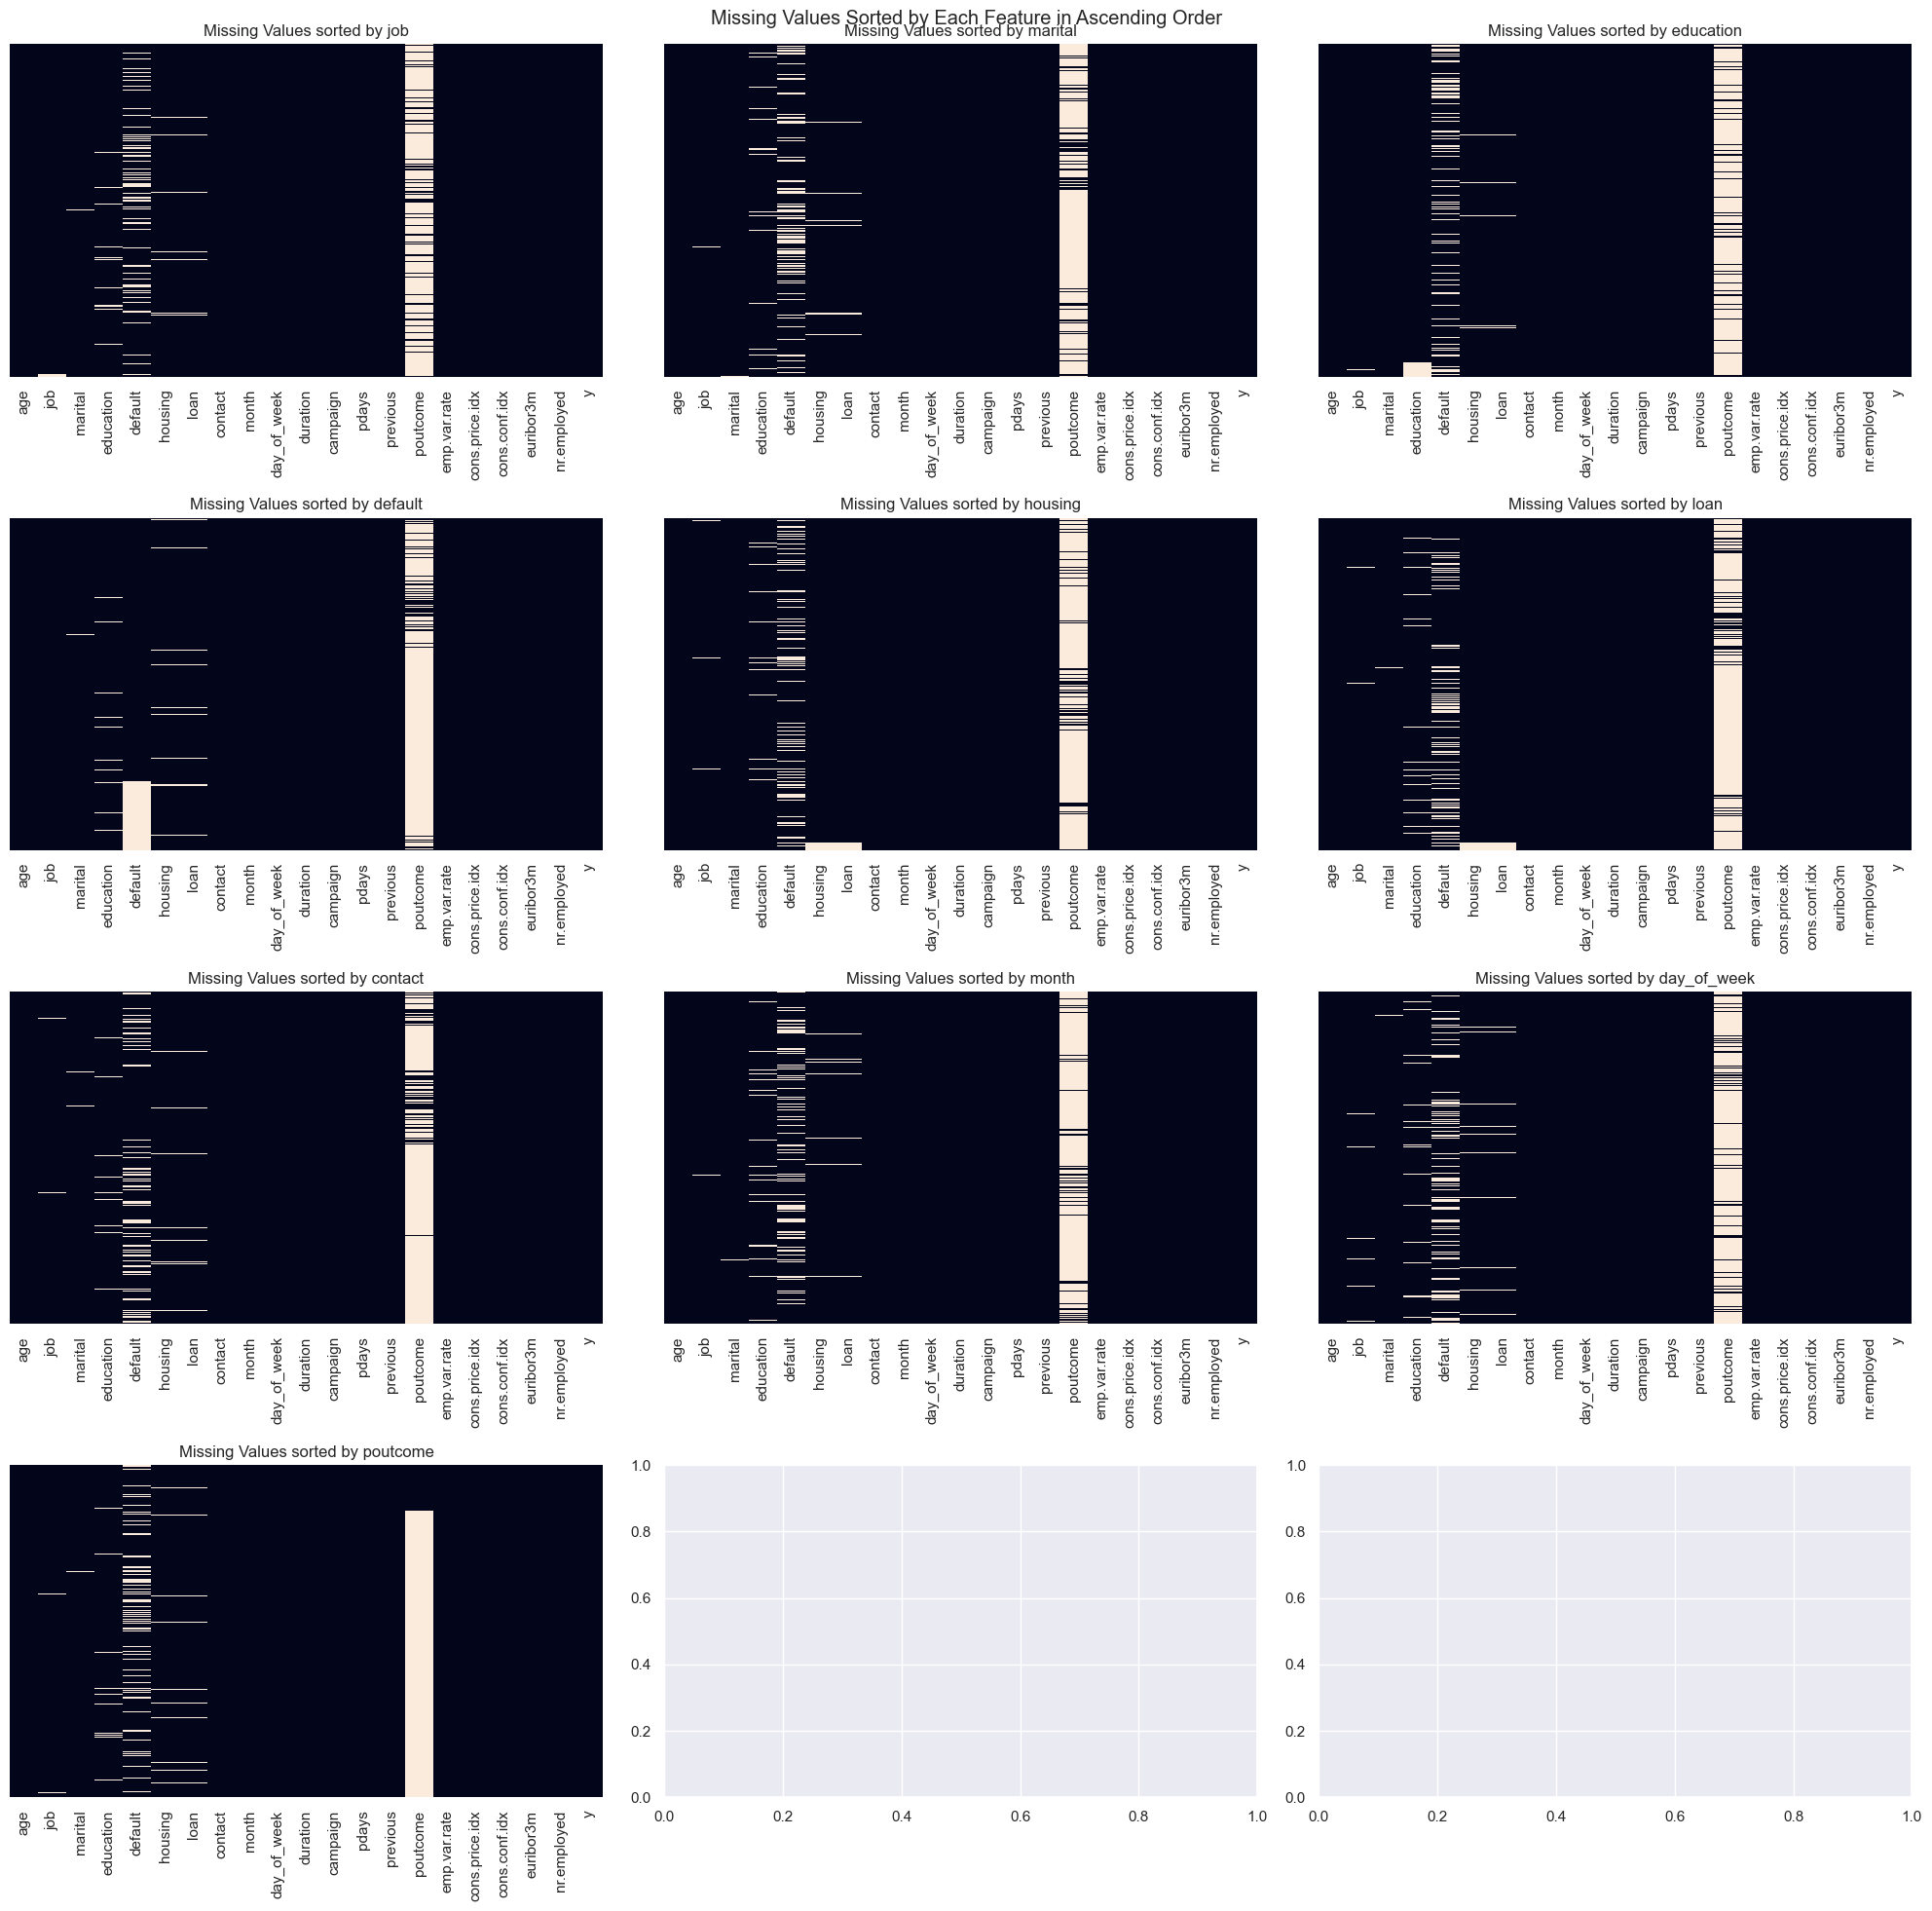

In [20]:
# Distribution of Missing Values sorted by each categorical feature
fig_mv, ax_mv = plt.subplots(4, 3, figsize=(20,20))
fig_mv.suptitle('Missing Values Sorted by Each Feature in Ascending Order')
for feature, ax in zip(categorical_features, ax_mv.ravel()):
    sns.heatmap(dfc.sort_values(by=feature).isna(), cbar=False, ax=ax)
    ax.set_title(f'Missing Values sorted by {feature}')
    ax.set(yticklabels=[])
plt.tight_layout()

<Axes: >

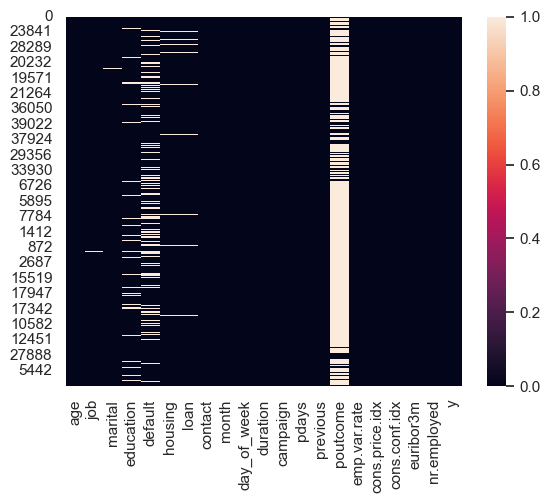

In [21]:
sns.heatmap(dfc.sort_values(by='y').isna())

**Missing Values in `poutcome`**

In [22]:
# Check number of times the client was contacted for the clients whose poutcome is NaN ('nonexistent')
dfc[dfc['poutcome'].isna()]['previous'].describe()

count    35551.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64

- The analysis confirms that the missing values in `poutcome` were previously filled in as 'nonexistent' because they were not contacted in the previous campaign and hence, did not have any outcomes.
- These will be filled in with 'p_not_contacted'.

In [23]:
dfc['poutcome'] = dfc['poutcome'].fillna('p_not_contacted')

**Missing Values in `job`**

In [24]:
display(dfc[dfc['job'].isna()].describe(), dfc[dfc['job'].isna()].describe(include=object))

age     duration    campaign       pdays    previous  \
count  330.000000   330.000000  330.000000  330.000000  330.000000   
mean    45.563636   239.675758    2.648485  938.727273    0.154545   
std     11.159954   251.760249    2.770461  237.655222    0.477831   
min     24.000000     8.000000    1.000000    1.000000    0.000000   
25%     37.000000    96.000000    1.000000  999.000000    0.000000   
50%     45.000000   174.000000    2.000000  999.000000    0.000000   
75%     53.000000   277.000000    3.000000  999.000000    0.000000   
max     81.000000  2203.000000   18.000000  999.000000    3.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  nr.employed  
count    330.000000      330.000000     330.000000  330.000000   330.000000  
mean       0.357879       93.718942     -38.797879    3.949033  5172.931818  
std        1.617462        0.579867       4.338605    1.677204    74.520231  
min       -3.400000       92.201000     -50.800000    0.655000  4963.600000  
25%       -0.100000       93.444000     -41.800000    4.137750  5191.000000  
50%        1.100000       93.918000     -36.400000    4.860000  5191.000000  
75%        1.400000       93.994000     -36.400000    4.962000  5228.100000  
max        1.400000       94.767000     -26.900000    5.045000  5228.100000

job  marital education default housing loan   contact month  \
count     0      321       199     178     325  325       330   330   
unique    0        3         6       1       2    2         2    10   
top     NaN  married  basic.4y      no     yes   no  cellular   may   
freq    NaN      234        52     178     172  268       168   120   

       day_of_week         poutcome    y  
count          330              330  330  
unique           5                3    2  
top            mon  p_not_contacted   no  
freq            78              293  293

In [25]:
display(dfc.describe(), dfc.describe(include=object))

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

job  marital          education default housing   loan   contact  \
count    40846    41096              39446   32580   40186  40186     41176   
unique      11        3                  7       2       2      2         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week         poutcome      y  
count   41176       41176            41176  41176  
unique     10           5                3      2  
top       may         thu  p_not_contacted     no  
freq    13767        8618            35551  36537

- Comparing the `job` missing values statistical summary with the overall statistical summary, the main difference is the mean of `emp.var.rate`.
- This suggests that the missing values can be attributed to changes in `emp.var.rate`

In [26]:
dfc[dfc['job'].isna()]['emp.var.rate']

29       1.1
35       1.1
73       1.1
91       1.1
144      1.1
        ... 
40370   -1.7
40428   -1.7
40656   -1.1
41005   -1.1
41108   -1.1
Name: emp.var.rate, Length: 330, dtype: float64

count    330.000000
mean       0.357879
std        1.617462
min       -3.400000
25%       -0.100000
50%        1.100000
75%        1.400000
max        1.400000
Name: emp.var.rate, dtype: float64

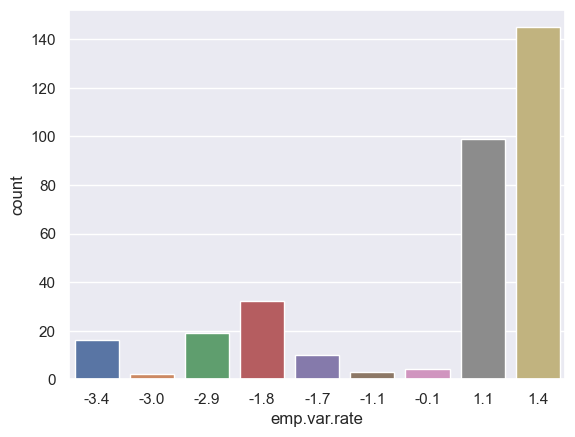

In [27]:
# Explore how job can be explained by emp.var.rate
sns.countplot(x= dfc[dfc['job'].isna()]['emp.var.rate'])
dfc[dfc['job'].isna()]['emp.var.rate'].describe()

<Axes: xlabel='month', ylabel='count'>

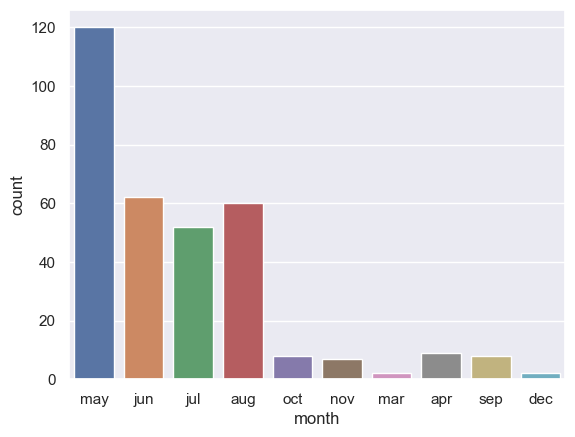

In [28]:
sns.countplot(x = dfc[dfc['job'].isna()]['month'])

<Axes: xlabel='job', ylabel='count'>

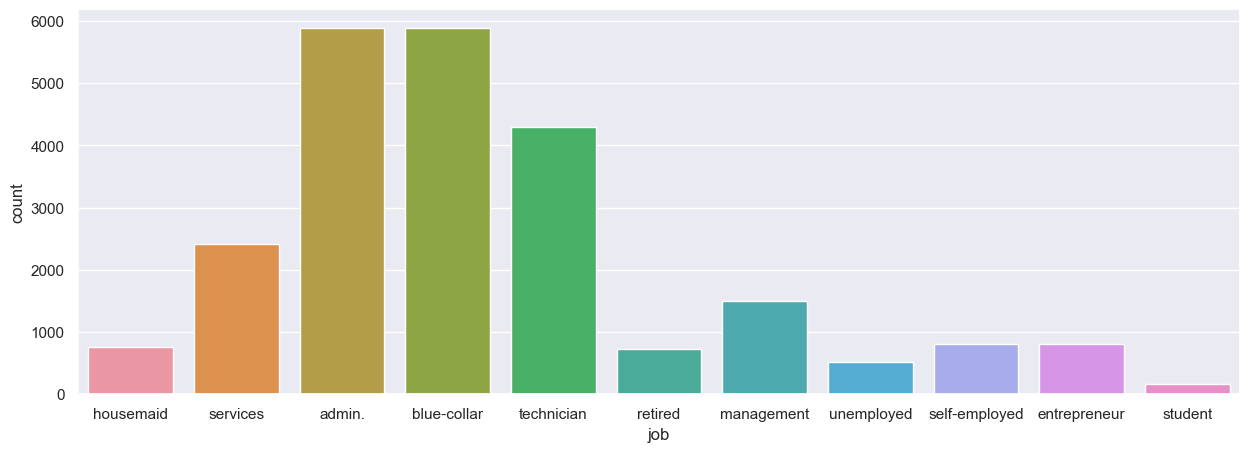

In [29]:
# For emp.var.rate greater than or equal to 1.1, what jobs do they usually have?
plt.figure(figsize=(15,5))
sns.countplot(x =dfc[(dfc['emp.var.rate']>=1.1)]['job'])

<Axes: xlabel='job', ylabel='count'>

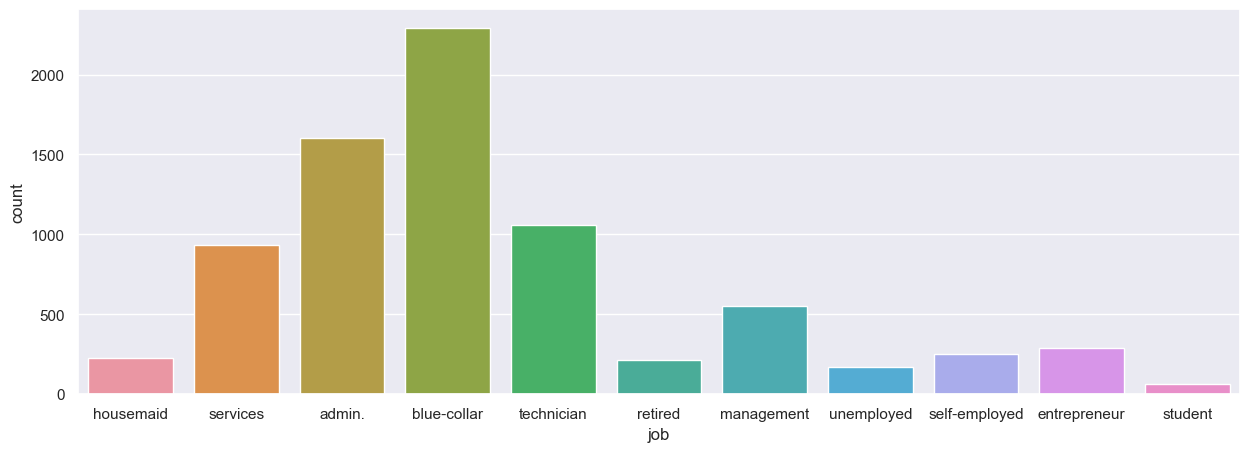

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x= dfc[(dfc['emp.var.rate']>=1.1) & (dfc['month']=='may')]['job'])

Text(0.5, 1.0, 'Boxplots of Age for each Job')

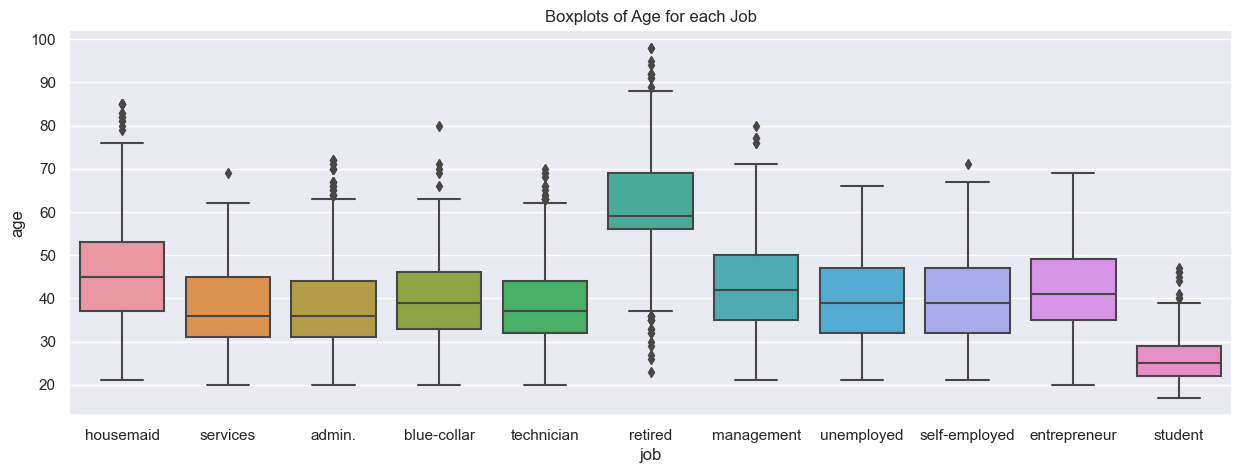

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dfc, x='job', y='age')
plt.title('Boxplots of Age for each Job')

Text(0.5, 1.0, "Boxplot of Age for 'blue-collar' Job")

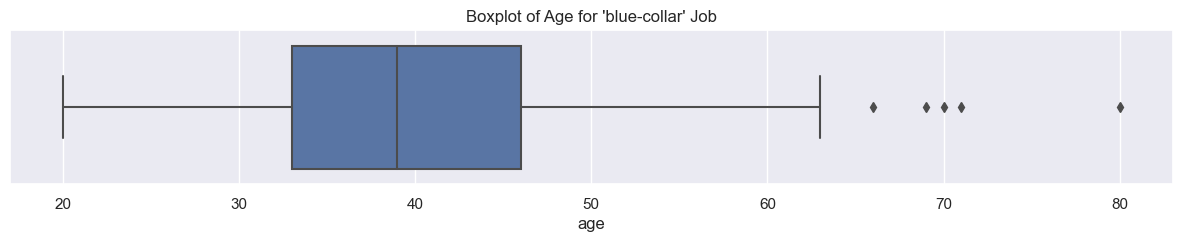

In [32]:
plt.figure(figsize=(15,2))
sns.boxplot(x= dfc[dfc['job']=='blue-collar']['age'])
plt.title("Boxplot of Age for 'blue-collar' Job")

In [33]:
iqr_age_bluecollar = dfc[dfc['job']=='blue-collar']['age'].quantile(0.75) - dfc[dfc['job']=='blue-collar']['age'].quantile(0.25)
bound_age_bluecollar = iqr_age_bluecollar * 1.5
upper_bound_age_bluecollar = dfc[dfc['job']=='blue-collar']['age'].quantile(0.75) + bound_age_bluecollar
print('The upper bound of age for blue-collar jobs is {}'.format(upper_bound_age_bluecollar))

The upper bound of age for blue-collar jobs is 65.5


**Summary of Missing Values in `job`**
- Related to `emp.var.rate` and `month`: unknown values occur frequently when the employment variation rate is higher (>1.1) and also during the `month` of 'may'.
- Hence, cannot safely assume that these values 'unknown' because they are 'unemployed' because employment variation rate higher means that employment is on the rise.
- During the `month` of 'may' and when the `emp.var.rate` is higher, 'blue-collar' jobs is the mode for `job` feature.
- From an employment perspective, `age` should also be taken into consideration for `job`.
- From the boxplots, it is apparent that clients >~60 should be 'retired'.
- The exact age is determined by the upper bound of age for blue-collar jobs, which is 65.5.
- The best method to fill in the missing values with 'blue-collar' for `age`s <= 65.5 and 'retired' for `age`s above 65.5.

In [34]:
# code for filling in missing values above
dfc.loc[(dfc['age'] <= 65.5) & dfc['job'].isna(), 'job'] = 'blue-collar'
dfc.loc[(dfc['age'] > 65.5) & dfc['job'].isna(), 'job'] = 'retired'

In [35]:
#check missing values amount in 'job'
dfc['job'].isna().sum()

0

**Missing Values in `education`**

Text(0.5, 1.0, 'Jobs of Rows with Missing Values')

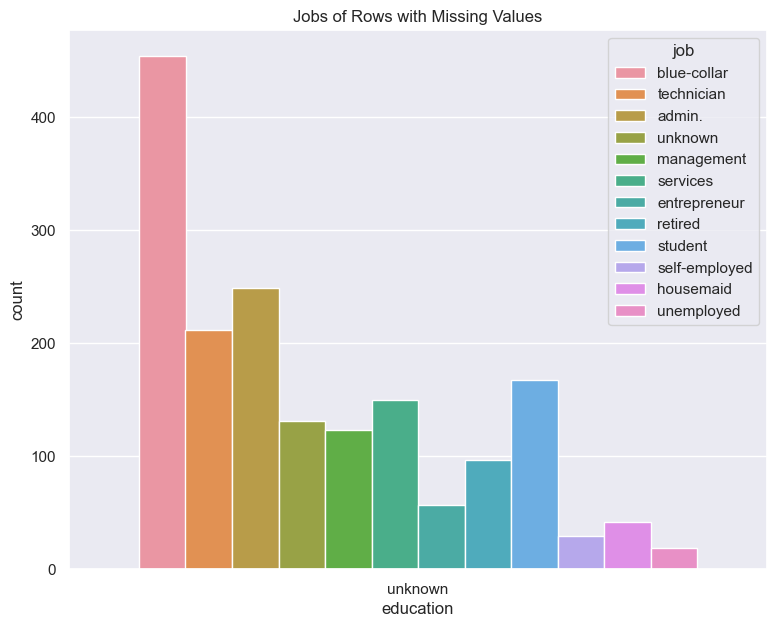

In [36]:
plt.figure(figsize=(9,7))
sns.countplot(data=df[df['education']=='unknown'], x='education', hue='job')
plt.title('Jobs of Rows with Missing Values')

- Most of the unknown values for `education` occur for rows with 'blue-collar', 'admin', 'technician', 'student' and 'entrepreneur' `job`s.
- Next, find out mode of `education` for these `job`s.

Text(0.5, 1.0, 'Education of Technician Jobs')

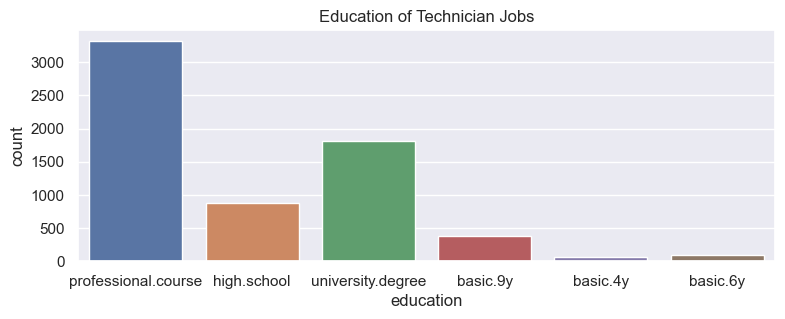

In [37]:
plt.figure(figsize=(9,3))
sns.countplot(data=dfc[dfc['job']=='technician'], x='education')
plt.title('Education of Technician Jobs')

- Mode for 'technician' `job` is 'professional.course'.

Text(0.5, 1.0, 'Education of Admin Jobs')

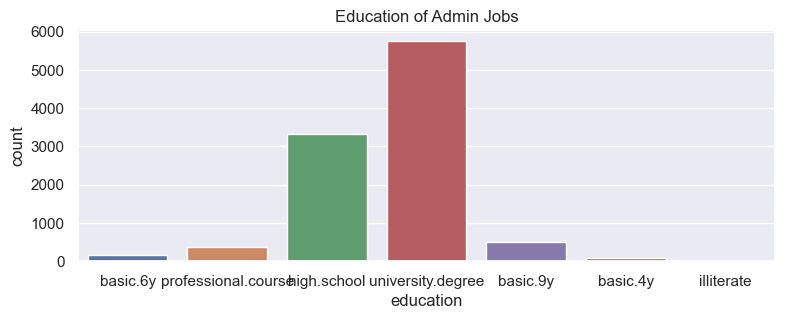

In [38]:
plt.figure(figsize=(9,3))
sns.countplot(data=dfc[dfc['job']=='admin.'], x='education')
plt.title('Education of Admin Jobs')

- Mode for 'admin.' `job` is 'university.degree'.

Text(0.5, 1.0, 'Education of Blue Collar, Student and Entrepreneur Jobs')

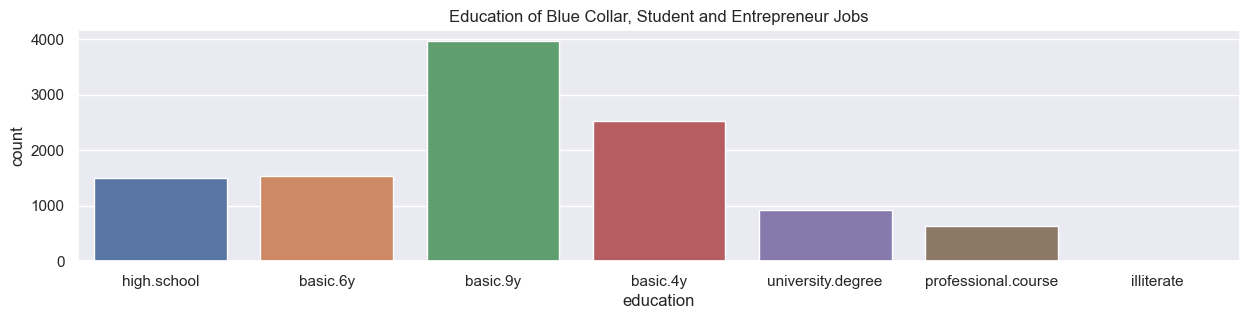

In [39]:
plt.figure(figsize=(15,3))
sns.countplot(data=dfc[(dfc['job']=='blue-collar') | (dfc['job']=='entrepreneur') | (dfc['job']=='student')], x='education')
plt.title('Education of Blue Collar, Student and Entrepreneur Jobs')

From the plots above, it can be inferred that:
- Mode for 'technician' `job` is 'professional.course'.
- Mode for 'admin.' `job` is 'university.degree'.
- Mode for 'blue-collar',  'student' and 'entrepreneur' `job`s is 'basic.9y'.

Hence, fill missing values of `education` with mode of respective `jobs`:
- 'technician' `job` with mode: 'professional.course'
- 'admin.' `job` with mode: 'university.degree'
- remaining missing values with mode of 'blue-collar', 'student' and 'entrepreneur': 'basic.9y'

In [40]:
# Fill missing values of education based on jobs - 'technician' and 'admin.' jobs with modes: 'professional.course' and 'university.degree' respectively
dfc.loc[dfc['job']=='technician', 'education'].fillna('professional.course', inplace=True)
dfc.loc[dfc['job']=='admin.', 'education'].fillna('university.degree', inplace=True)

In [41]:
# Fill missing values of education of others based on mode of 'blue-collar', 'student' and 'entrepreneur'
dfc['education'].fillna('basic.9y', inplace=True)

In [42]:
#check amount of missing values in 'education'
dfc['education'].isna().sum()

0

In [43]:
#unique values in 'education' after filling Missing Values
dfc['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

**Missing Values in `marital`**

In [44]:
display(dfc[dfc['marital'].isna()].describe(), dfc[dfc['marital'].isna()].describe(include=object))

age    duration   campaign       pdays   previous  emp.var.rate  \
count  80.000000    80.00000  80.000000   80.000000  80.000000     80.000000   
mean   40.275000   312.72500   3.187500  937.100000   0.275000     -0.221250   
std    10.784394   285.08826   3.785695  241.252722   0.550604      1.652975   
min    25.000000     7.00000   1.000000    4.000000   0.000000     -3.400000   
25%    32.000000   129.50000   1.000000  999.000000   0.000000     -1.800000   
50%    35.500000   210.00000   2.000000  999.000000   0.000000      0.500000   
75%    50.000000   404.00000   3.000000  999.000000   0.000000      1.400000   
max    66.000000  1532.00000  21.000000  999.000000   2.000000      1.400000   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count       80.000000       80.00000  80.000000    80.000000  
mean        93.471250      -40.82000   3.313038  5157.393750  
std          0.629093        5.06208   1.805199    70.034406  
min         92.201000      -50.00000   0.639000  4963.600000  
25%         92.893000      -46.20000   1.299000  5099.100000  
50%         93.444000      -41.80000   4.487500  5191.000000  
75%         93.994000      -36.40000   4.958000  5228.100000  
max         94.601000      -26.90000   4.965000  5228.100000

job marital          education default housing loan   contact  \
count            80       0                 80      69      79   79        80   
unique           11       0                  6       1       2    2         2   
top     blue-collar     NaN  university.degree      no      no   no  cellular   
freq             23     NaN                 31      69      44   67        53   

       month day_of_week         poutcome   y  
count     80          80               80  80  
unique     8           5                3   2  
top      may         thu  p_not_contacted  no  
freq      33          24               62  68

- From the missing values heatmap and the statistical summary above, the reason for these missing values cannot be explained by itself and other variables. Hence, missing values in `marital` is most likely Missing Completely At Random (MCAR).
- Since the proportion of missing values in `marital` is very low (0.19%), the rows with the missing values can be dropped without a large loss of information.

In [45]:
dfc.dropna(subset=['marital'], inplace=True)

**Missing Values for `default`**

In [46]:
display(dfc[dfc['default'].isna()].describe(), dfc[dfc['default'].isna()].describe(include=object))

age     duration     campaign        pdays     previous  \
count  8585.000000  8585.000000  8585.000000  8585.000000  8585.000000   
mean     43.367851   252.422481     2.743623   991.595923     0.074199   
std       9.486663   252.351776     2.983738    85.438563     0.293160   
min      19.000000     5.000000     1.000000     0.000000     0.000000   
25%      36.000000    98.000000     1.000000   999.000000     0.000000   
50%      43.000000   175.000000     2.000000   999.000000     0.000000   
75%      50.000000   313.000000     3.000000   999.000000     0.000000   
max      98.000000  3366.000000    56.000000   999.000000     4.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   8585.000000     8585.000000    8585.000000  8585.000000  8585.000000  
mean       0.702667       93.764908     -40.266593     4.279762  5193.699511  
std        1.190779        0.496900       3.879188     1.342348    48.312840  
min       -3.400000       92.201000     -50.000000     0.635000  4963.600000  
25%        1.100000       93.444000     -42.700000     4.856000  5191.000000  
50%        1.400000       93.918000     -41.800000     4.864000  5228.100000  
75%        1.400000       93.994000     -36.400000     4.962000  5228.100000  
max        1.400000       94.601000     -26.900000     4.970000  5228.100000

job  marital education default housing  loan   contact month  \
count          8585     8585      8585       0    8358  8358      8585  8585   
unique           11        3         7       0       2     2         2    10   
top     blue-collar  married  basic.9y     NaN     yes    no  cellular   may   
freq           3307     6269      2170     NaN    4361  7088      4361  3400   

       day_of_week         poutcome     y  
count         8585             8585  8585  
unique           5                3     2  
top            mon  p_not_contacted    no  
freq          1821             8010  8142

In [47]:
display(dfc[dfc['default']=='yes'].describe(), dfc[dfc['default']=='yes'].describe(include=object))

age    duration  campaign  pdays  previous  emp.var.rate  \
count   3.000000    3.000000  3.000000    3.0  3.000000      3.000000   
mean   42.333333  103.333333  1.333333  999.0  0.333333      0.900000   
std     9.814955   34.151623  0.577350    0.0  0.577350      0.866025   
min    31.000000   66.000000  1.000000  999.0  0.000000     -0.100000   
25%    39.500000   88.500000  1.000000  999.0  0.000000      0.650000   
50%    48.000000  111.000000  1.000000  999.0  0.000000      1.400000   
75%    48.000000  122.000000  1.500000  999.0  0.500000      1.400000   
max    48.000000  133.000000  2.000000  999.0  1.000000      1.400000   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count        3.000000       3.000000   3.000000     3.000000  
mean        93.362667     -38.066667   4.693000  5217.333333  
std          0.140873       3.406367   0.467654    18.648414  
min         93.200000     -42.000000   4.153000  5195.800000  
25%         93.322000     -39.050000   4.558000  5211.950000  
50%         93.444000     -36.100000   4.963000  5228.100000  
75%         93.444000     -36.100000   4.963000  5228.100000  
max         93.444000     -36.100000   4.963000  5228.100000

job  marital            education default housing loan  \
count            3        3                    3       3       3    3   
unique           2        1                    2       1       2    1   
top     technician  married  professional.course     yes      no   no   
freq             2        3                    2       3       2    3   

         contact month day_of_week         poutcome   y  
count          3     3           3                3   3  
unique         1     2           1                2   1  
top     cellular   aug         tue  p_not_contacted  no  
freq           3     2           3                2   3

<Axes: xlabel='default', ylabel='count'>

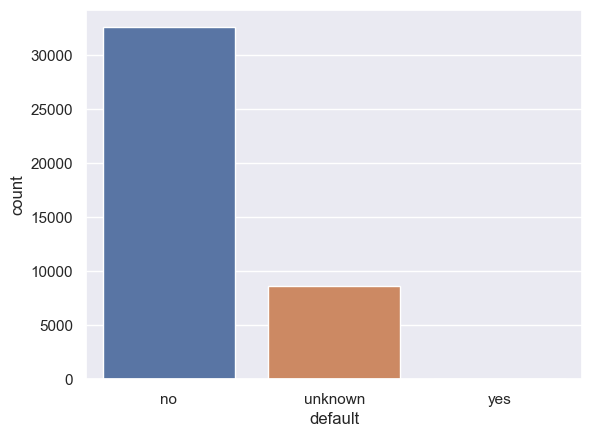

In [48]:
sns.countplot(data=df, x='default')

**Summary of Missing Values for `default`**
- There are only 3 counts of 'yes' for `default`, which is unusually low relative to the number of `no`
- Most likely, these unknown values are clients who have credit default ('yes' for `default`) but do not wish to disclose this sensitive information or clients who do not have a loan.
- Hence, the best solution for the missing values in `default` is to merge 'unknown' and 'yes' into a single category - 'undisclosed'.
- It can be taken into consideration in subsequent analysis that the 'undisclosed' category is likely to be 'yes'.

In [49]:
# Merge 'yes' and 'unknown' into 'undisclosed'
dfc.loc[dfc['default']=='yes', 'default'] = 'undisclosed'
dfc['default'].fillna('undisclosed', inplace=True)

Text(0.5, 1.0, 'Proportion of new column values of default')

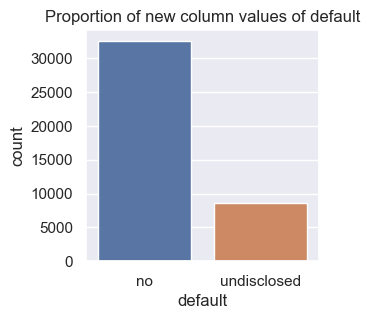

In [50]:
plt.figure(figsize=(3,3))
sns.countplot(data=dfc, x='default')
plt.title('Proportion of new column values of default')

**Missing Values for `housing` and `loan`**

In [51]:
display(dfc[dfc['housing'].isna()].describe(), dfc[dfc['housing'].isna()].describe(include=object))

age     duration    campaign       pdays    previous  \
count  989.000000   989.000000  989.000000  989.000000  989.000000   
mean    39.939333   249.831143    2.560162  964.862487    0.185035   
std     10.379946   254.730172    2.951304  181.015459    0.527712   
min     17.000000     7.000000    1.000000    2.000000    0.000000   
25%     32.000000   102.000000    1.000000  999.000000    0.000000   
50%     38.000000   169.000000    2.000000  999.000000    0.000000   
75%     47.000000   302.000000    3.000000  999.000000    0.000000   
max     86.000000  2926.000000   56.000000  999.000000    4.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  nr.employed  
count    989.000000      989.000000     989.000000  989.000000   989.000000  
mean       0.115369       93.636762     -40.283215    3.655460  5166.525379  
std        1.587791        0.601540       4.564216    1.739723    73.208139  
min       -3.400000       92.201000     -50.800000    0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000    1.344000  5099.100000  
50%        1.100000       93.918000     -41.800000    4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000    4.961000  5228.100000  
max        1.400000       94.767000     -26.900000    5.000000  5228.100000

job  marital          education default housing loan  \
count           989      989                989     989       0    0   
unique           11        3                  6       2       0    0   
top     blue-collar  married  university.degree      no     NaN  NaN   
freq            244      588                277     762     NaN  NaN   

         contact month day_of_week         poutcome    y  
count        989   989         989              989  989  
unique         2    10           5                3    2  
top     cellular   may         tue  p_not_contacted   no  
freq         560   349         210              850  882

In [52]:
display(dfc[dfc['loan'].isna()].describe(), dfc[dfc['loan'].isna()].describe(include=object))

age     duration    campaign       pdays    previous  \
count  989.000000   989.000000  989.000000  989.000000  989.000000   
mean    39.939333   249.831143    2.560162  964.862487    0.185035   
std     10.379946   254.730172    2.951304  181.015459    0.527712   
min     17.000000     7.000000    1.000000    2.000000    0.000000   
25%     32.000000   102.000000    1.000000  999.000000    0.000000   
50%     38.000000   169.000000    2.000000  999.000000    0.000000   
75%     47.000000   302.000000    3.000000  999.000000    0.000000   
max     86.000000  2926.000000   56.000000  999.000000    4.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  nr.employed  
count    989.000000      989.000000     989.000000  989.000000   989.000000  
mean       0.115369       93.636762     -40.283215    3.655460  5166.525379  
std        1.587791        0.601540       4.564216    1.739723    73.208139  
min       -3.400000       92.201000     -50.800000    0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000    1.344000  5099.100000  
50%        1.100000       93.918000     -41.800000    4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000    4.961000  5228.100000  
max        1.400000       94.767000     -26.900000    5.000000  5228.100000

job  marital          education default housing loan  \
count           989      989                989     989       0    0   
unique           11        3                  6       2       0    0   
top     blue-collar  married  university.degree      no     NaN  NaN   
freq            244      588                277     762     NaN  NaN   

         contact month day_of_week         poutcome    y  
count        989   989         989              989  989  
unique         2    10           5                3    2  
top     cellular   may         tue  p_not_contacted   no  
freq         560   349         210              850  882

- The missing values in `housing` and `loan` are identical.

In [53]:
display(dfc[dfc['housing']=='yes'].describe(), dfc[dfc['housing']=='yes'].describe(include=object))

age      duration      campaign         pdays      previous  \
count  21536.000000  21536.000000  21536.000000  21536.000000  21536.000000   
mean      40.009751    256.597697      2.538726    960.493917      0.182578   
std       10.495431    259.658487      2.731781    191.732166      0.507666   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    178.000000      2.000000    999.000000      0.000000   
75%       47.000000    318.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     43.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  21536.000000    21536.000000   21536.000000  21536.000000  21536.000000  
mean      -0.007866       93.530614     -40.655145      3.523651   5163.914952  
std        1.588167        0.571552       4.715756      1.757763     73.359051  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.327000   5099.100000  
50%        1.100000       93.444000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

job  marital          education default housing   loan   contact  \
count    21536    21536              21536   21536   21536  21536     21536   
unique      11        3                  7       2       1      2         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      5551    12949               6490   17174   21536  17855     14501   

        month day_of_week         poutcome      y  
count   21536       21536            21536  21536  
unique     10           5                3      2  
top       may         thu  p_not_contacted     no  
freq     6976        4611            18423  19034

- EDA in the previous section and the statistical summaries above do not reveal a pattern for the missing values.
- Hence, the values will be restored to 'unknown' like in the original data.

In [54]:
dfc.fillna('unknown', inplace=True)

In [55]:
display(dfc['housing'].unique(), dfc['loan'].unique() )

array(['no', 'yes', 'unknown'], dtype=object)

array(['no', 'yes', 'unknown'], dtype=object)

**Summary of Data Cleaning for Missing Values**

In [56]:
dfc.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Below is the summary of Missing Value Handling:
- `poutcome`: 'nonexistent' means not previously contacted - replace with 'p_not_contacted'.
- `marital`: proportion is small and does not show distinct pattern with other features - drop rows.
- `default`: unusually small counts for 'yes', most likely undisclosed due to sensitivity of query - replace with 'undisclosed'.
- `job`: based on `emp.var.rate` and `month`, replace with mode ('blue-collar') for `age` <= 65.5 and 'retired' for `age` > 65.5.
- `education`: fill missing values of `education` with mode of respective `jobs`:
    - 'technician' `job` with mode: 'professional.course'
    - 'admin.' `job` with mode: 'university.degree'
    - remaining missing values with mode of 'blue-collar', 'student' and 'entrepreneur': 'basic.9y'
- `housing` and `loan` (both features have identical missing values): Restored to 'unknown'

**Cleaning Outliers**

We will create 2 new datasets that will exclusively include the Outlier Handling for both untreated and treated missing values:

In [57]:
def outlier_limit(df, feature):
    plt.figure(figsize=(9,1))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
    plt.figure(figsize=(9,2))
    sns.histplot(data=df, x=df[feature])
    plt.title(f'Histogram of {feature}')
    plt.show()
    feat = df[feature]
    q1 = feat.describe()['25%']
    q3 = feat.describe()['75%']
    iqr = q3 - q1
    print(f"{feature} IQR:\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}")

    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    print(f"Lower limit: {lower}\nUpper limit: {upper}\n")
    outlier = df[(feat > upper) | (feat< lower)]
    print('Rows considered outliers:')
    display(outlier[feature])
    print(f"Number of outliers: {outlier[feature].count()}")
    print(f"% of outliers: {outlier[feature].count()/df.shape[0]*100}")

In [58]:
#create new dataset with missing value and outlier handling
dfc_out = dfc.copy()

In [59]:
#create new dataset with only outlier handling
df_out = df.copy()

- `age`

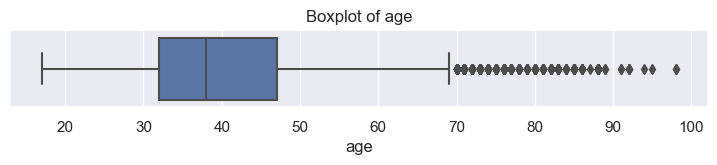

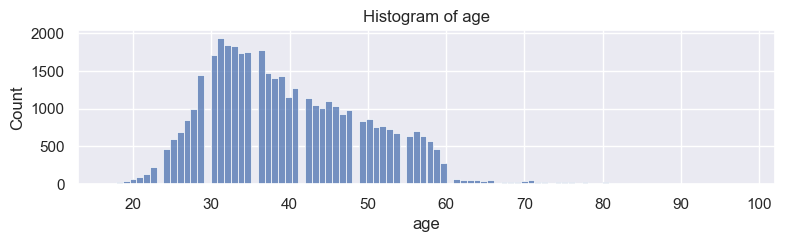

age IQR:
Q1 = 32.0
Q3 = 47.0
IQR = 15.0
Lower limit: 9.5
Upper limit: 69.5

Rows considered outliers:


27713    70
27757    76
27780    73
27800    88
27802    88
         ..
40986    84
40996    81
41004    80
41183    73
41187    74
Name: age, Length: 468, dtype: int64

Number of outliers: 468
% of outliers: 1.138796963208098


In [60]:
outlier_limit(dfc_out ,'age')

- There are only 2 possible ways to handle the outliers:
    - Removing rows
    - Binning (possibly at the range of 5 years (<20, 20-25, 25-30, ...., >65))
- Considering the low proportion of outliers (1%), it is generally safe for us to just remove them altogether
    - Even if we need to predict with an age outside the limit, the gap should not be too far away from the limit (69.5) for us to fear that it will create any bias (considering the average life expectancy in the EU is 81.3 years at 2019*)

Source: https://www.euronews.com/next/2023/07/22/life-expectancy-where-in-europe-do-people-live-the-shortest-and-the-longest

In [61]:
#remove age above 69.5 (outliers)
dfc_out = dfc_out[dfc_out['age'] <= 69.5]
df_out = df_out[df_out['age'] <= 69.5]

In [62]:
#maximum age
dfc_out['age'].max(), df_out['age'].max()

(69, 69)

- `previous`

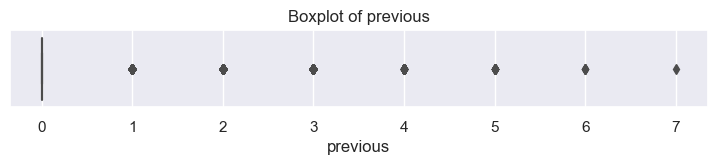

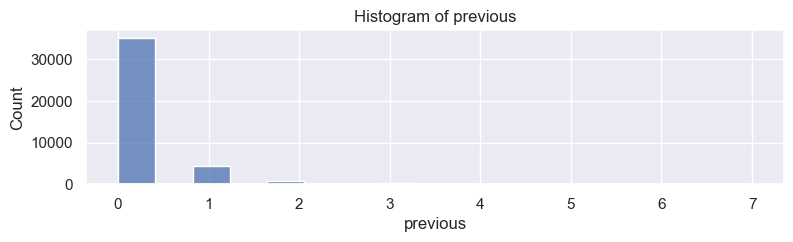

previous IQR:
Q1 = 0.0
Q3 = 0.0
IQR = 0.0
Lower limit: 0.0
Upper limit: 0.0

Rows considered outliers:


24013    1
24019    1
24076    1
24102    1
24108    1
        ..
41173    2
41174    6
41175    2
41178    3
41182    1
Name: previous, Length: 5405, dtype: int64

Number of outliers: 5405
% of outliers: 13.303632962488923


In [63]:
outlier_limit(dfc_out, 'previous')

Considering that the majority of the data in `previous` is '0' (87%), it is better for us to change the definition of `previous` feature into **whether the client has been contacted or not previously**

As such, we will split the data into 2 values (binary):
- 0 : not previously contacted
- 1 : has ever been previously contacted

In [64]:
def previous_binary(x):
    if x == 0:
        return 0
    else:
        return 1

In [65]:
#change into binary
dfc_out['previous'] = dfc_out['previous'].apply(previous_binary)
df_out['previous'] = df_out['previous'].apply(previous_binary)

In [66]:
#check values
dfc_out['previous'].unique(), df_out['previous'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

- `duration`

`duration` is a feature that will not be used in our predictive modelling
- Reason: `duration` data can only be obtained when the call is ended, hence, this data cannot be used to predict retrospectively.
- The business problem we are trying to solve requires us to not only interpret the characteristics of clients who are more willing to subscribe to a term deposit, but more importantly to predict whether a certain client with a certain condition would be willing to.
- Hence, if we start to predict only after the call has been made, then the model would be truly redundant

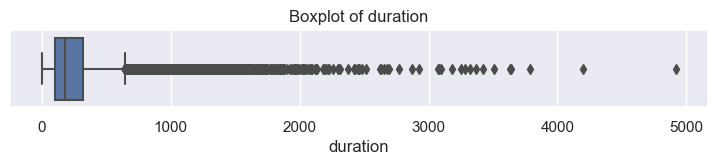

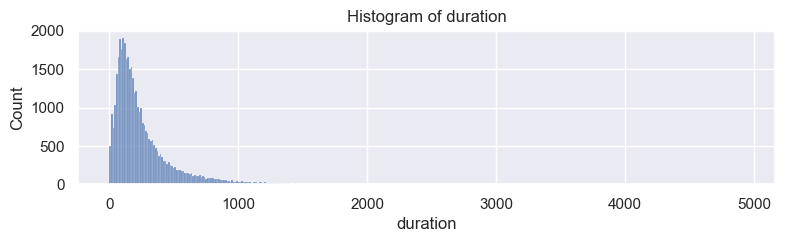

duration IQR:
Q1 = 102.0
Q3 = 319.0
IQR = 217.0
Lower limit: -223.5
Upper limit: 644.5

Rows considered outliers:


37       1666
57        787
61        812
75       1575
83       1042
         ... 
41147     712
41153     655
41160     843
41164    1868
41166     651
Name: duration, Length: 2926, dtype: int64

Number of outliers: 2926
% of outliers: 7.201929703652652


In [67]:
outlier_limit(dfc_out ,'duration')

Considering that we are not going to use this as a feature in our predictive model, we will only be judging its importance with Data Analysis.
- With a high % of outliers (7%), it is not recommended to drop them.
- By keeping it as continuous data we can already see a skewed normal distribution, which indicates a consistent trend.
- Outliers would not affect our Data Analysis in any significant way 
    - We only need to see the trend visually, and outlier of 7% in one direction is simple to dismiss during trend-seeking
    - The data distribution clearly won't be normally distributed even after removing the outliers (will still be skewed), so removing will not improve the statistical test reliability
    - Statistical test should perform better if we remove the rows with the outlier, so we are not setting an 'artifical' ideal condition by keeping the outliers
    - Binning will create a huge informational loss which can make the statistical test perform much worse

Based on the judgement above, we will choose to keep the data as-is by not removing the outliers from the feature `duration`

- `campaign`

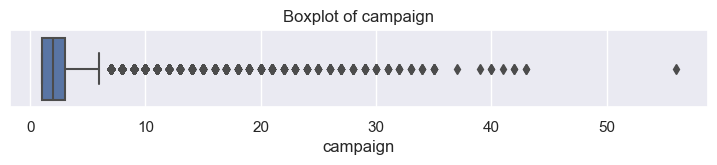

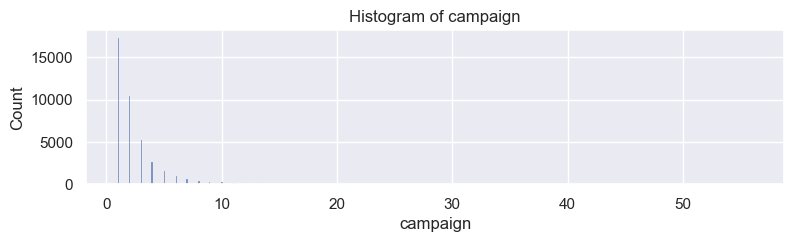

campaign IQR:
Q1 = 1.0
Q3 = 3.0
IQR = 2.0
Lower limit: -2.0
Upper limit: 6.0

Rows considered outliers:


887      7
1043     8
1094     8
1097     7
1230     7
        ..
40520    7
40597    7
40698    7
40821    9
40993    7
Name: campaign, Length: 2382, dtype: int64

Number of outliers: 2382
% of outliers: 5.862951658954415


In [68]:
outlier_limit(dfc_out ,'campaign')

The outlier limit is 6, which categorizes 5.8% of the data as outliers
- This outlier amount is too much to remove, as we might be removing too many data information for it to be useful

Let's see if it's viable for us to cut off the value at 10 (making the limit to 10)

In [69]:
outlier = dfc_out[(dfc_out['campaign'] > 10)]
print(f"Number of outliers: {outlier['campaign'].count()}")
print(f"% of outliers: {outlier['campaign'].count()/dfc.shape[0]*100}")

Number of outliers: 863
% of outliers: 2.0999610667704887


- Since there are 2% of data that have `campaign` values of above 10, these outliers can be dropped.

In [70]:
dfc_out = dfc_out[dfc_out['campaign'] <= 10]
df_out = df_out[df_out['campaign'] <= 10]

In [71]:
dfc_out['campaign'].max(), df_out['campaign'].max()

(10, 10)

- `pdays`

In [72]:
pct_pdays = dfc[dfc['pdays'] == 999].shape[0]/dfc.shape[0]*100
print(f'Percentage of rows with no previous calls: {pct_pdays}')

Percentage of rows with no previous calls: 96.32567646486277


- 96% of rows have no prev calls, hence it is too much to drop the rows containing 999.
- The data seems to be in a very unusable format, where it is a combination of both discrete and categorical and has too big of variant if we use it as is.
- If we still want to use this feature, our only option is to turn it into binning or binary to signify if the client has been prev contacted or not
- But, `previous` feature has already signify whether the client has been previously contacted or not, so it is redundant to still keep the pdays feature even for that purpose considering 96% of the rows have not been previously called
- Hence, it is better to just remove the feature altogether on all dataset

In [73]:
#drop column from database
df.drop(columns = 'pdays', inplace = True)
dfc.drop(columns = 'pdays', inplace = True)
dfc_out.drop(columns = 'pdays', inplace = True)
df_out.drop(columns = 'pdays', inplace = True)
dfc_out.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [74]:
#remove from existing lists
prev_features.remove('pdays')
quantitative_features.remove('pdays')
continuous_features.remove('pdays')

**Changing Data Type of Target Variable**

In [75]:
# replace 'yes' with 1 and 'no' with 0
def y_binary(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [76]:
df['y'] = df['y'].apply(y_binary)
dfc['y'] = dfc['y'].apply(y_binary)
dfc_out['y'] = dfc_out['y'].apply(y_binary)
df_out['y'] = df_out['y'].apply(y_binary)

In [77]:
dfc_out['y'].unique()

array([0, 1], dtype=int64)

**Distribution of Clean Data**
- Now that data cleaning is complete, the distribution of the new data can be analyzed before further preprocessing.

In [78]:
display(dfc_out.describe(), dfc_out.describe(include='object'))

age      duration      campaign      previous  emp.var.rate  \
count  39765.000000  39765.000000  39765.000000  39765.000000  39765.000000   
mean      39.581189    260.259298      2.278084      0.135722      0.087987   
std        9.674900    259.665836      1.719584      0.342498      1.560038   
min       17.000000      0.000000      1.000000      0.000000     -3.400000   
25%       32.000000    104.000000      1.000000      0.000000     -1.800000   
50%       38.000000    181.000000      2.000000      0.000000      1.100000   
75%       47.000000    321.000000      3.000000      0.000000      1.400000   
max       69.000000   4918.000000     10.000000      1.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed             y  
count    39765.000000   39765.000000  39765.000000  39765.000000  39765.000000  
mean        93.573558     -40.550504      3.629909   5167.642467      0.110122  
std          0.574530       4.591421      1.725774     71.292818      0.313046  
min         92.201000     -50.800000      0.634000   4963.600000      0.000000  
25%         93.075000     -42.700000      1.344000   5099.100000      0.000000  
50%         93.444000     -41.800000      4.857000   5191.000000      0.000000  
75%         93.994000     -36.400000      4.961000   5228.100000      0.000000  
max         94.767000     -26.900000      5.045000   5228.100000      1.000000

job  marital          education default housing   loan   contact  \
count    39765    39765              39765   39765   39765  39765     39765   
unique      11        3                  7       2       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10150    24069              11813   31454   20860  32766     25262   

        month day_of_week         poutcome  
count   39765       39765            39765  
unique     10           5                3  
top       may         thu  p_not_contacted  
freq    13526        8264            34368

In [79]:
dfc_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39765 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39765 non-null  int64  
 1   job             39765 non-null  object 
 2   marital         39765 non-null  object 
 3   education       39765 non-null  object 
 4   default         39765 non-null  object 
 5   housing         39765 non-null  object 
 6   loan            39765 non-null  object 
 7   contact         39765 non-null  object 
 8   month           39765 non-null  object 
 9   day_of_week     39765 non-null  object 
 10  duration        39765 non-null  int64  
 11  campaign        39765 non-null  int64  
 12  previous        39765 non-null  int64  
 13  poutcome        39765 non-null  object 
 14  emp.var.rate    39765 non-null  float64
 15  cons.price.idx  39765 non-null  float64
 16  cons.conf.idx   39765 non-null  float64
 17  euribor3m       39765 non-null 

**Summary of Data Cleaning**
- There are no more missing values in the features.
- Outliers have been handled
- In conclusion, the data is now clean.

#### **Feature Selection**

**Check for Multicollinearity by Data Correlation**

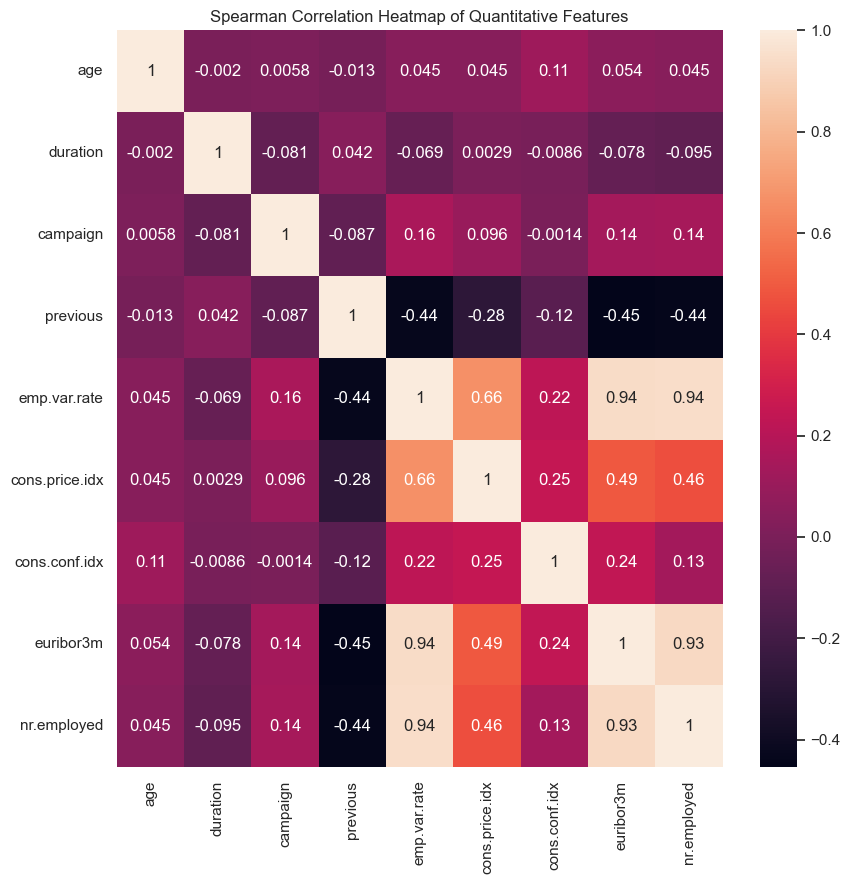

In [80]:
# Correlation between features
plt.figure(figsize=(9,9))
sns.heatmap(df[quantitative_features].corr(method='spearman'), annot=True)
plt.title('Spearman Correlation Heatmap of Quantitative Features')
plt.tight_layout()

Based on the heatmap, we can see that there are strong correlations between `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed`.

Because of this, it is preferable for us to drop `emp.var.rate`, `euribor3m`, and `nr.employed`
- `emp.var.rate`, `euribor3m`, and `nr.employed` has strong correlation with the other 3 features and `previous` (around 0.44)
- `cons.price.idx`, on the other hand, has less correlation with `previous` (-0.28) or any other features compared to those 3
- Considering these 4 features are to show the socio-economic indices of the time, Consumer Price Index is also a reliable indicator of macroeconomic condition (inflation -> rise in price, etc.), hence on its own it is already enough to represent the indices the other 3 were meant to show.

In [81]:
for month in df['month'].unique():
    print(f"{month}: {df[df['month'] == month]['cons.price.idx'].nunique()} {df[df['month'] == month]['cons.price.idx'].unique()}")
    

may: 3 [93.994 92.893 93.876]
jun: 3 [94.465 92.963 94.055]
jul: 3 [93.918 92.469 94.215]
aug: 3 [93.444 92.201 94.027]
oct: 3 [93.798 92.431 94.601]
nov: 3 [93.2   92.649 94.767]
dec: 2 [92.756 92.713]
mar: 2 [92.843 93.369]
apr: 2 [93.075 93.749]
sep: 2 [92.379 94.199]


- Based on the dataset context, the data is presumably taken at 2008-2013. Even so, the data does not have a timestamp. 
- There are at least 2 unique value on every month, which clearly indicates that the data is not taken within the same year.
- Hence, we cannot identify the time with which these socioeconomic indices were taken.
- As such, it is impossible to even plot these socio-economic indices against time to try to see any underlying information

Based on this, we should consider dropping `emp.var.rate`, `euribor3m`, and `nr.employed` during Feature Selection due to multicolinearity

**Feature Selection by Analyzing Data against the Target Variable**

We will first Conduct a quick statistical test against all features, and take a look at those which are not significant

In [82]:
# Automatic EDA Plotter & Description
def auto_eda(df, features, target, target_yes):
    #Libraries
    from scipy.stats import normaltest, mannwhitneyu, ttest_1samp, chi2_contingency
    from statsmodels.stats.proportion import proportions_ztest

    #create new df for only target = yes
    df_y = df[df[target] == target_yes]
    
    #summary list
    summary_type =[]
    summary_mode=[]
    summary_mean=[]
    summary_median=[]
    summary_pval= []
    summary_test = []
    
    i = 0
    for col in features:
        i += 1
        print(f'{i}. {col}') #numbering
        
        #Cross Tabulation
        df_cross = pd.crosstab(df[col], df[target])
        df_cross['Total'] = df_cross.sum(axis = 1)
        df_cross['Population_Proportion'] = round(df_cross['Total']/df_cross['Total'].sum()*100,2)
        df_cross['Yes_Rate'] = round(df_cross[target_yes] / df_cross['Total'] * 100)
        df_cross['Yes_PProportion'] = round(df_cross[target_yes]/df_cross[target_yes].sum()*100,2)
        display(df_cross.sort_values(target_yes,ascending=False))
        
        #Barplot / Histogram of Target Amt
        ##Continuous
        if col in continuous_features:
            plt.figure(figsize=(15,2))
            sns.histplot(data=df_y, x=df_y[col])
            plt.title(f'Histogram of Target {col}')
            plt.show()
                
            summary_type.append('Continuous')
                
                
            
        ##Qualitative & Discrete
        else:
            if col in discrete_features:
                summary_type.append('Discrete')
            else:
                summary_type.append('Categorical')
                
            plt.figure(figsize=(15,2))
            sns.countplot(data=df_y, x=df_y[col], order = df_y[col].value_counts().index)
            plt.title(f'Barplot of Target {col}')
            plt.show()
            
            
        print(f'The mode of {col} is {df_y[col].mode()[0]}.')
        print(df_y[col].value_counts(ascending=False).nlargest(3))
        
        summary_mode.append(df_y[col].mode()[0])
        
        #Barplot of Yes_Rate
        df_yr = df_cross.reset_index()[[col, 'Yes_Rate']]
        plt.figure(figsize=(18,2))
        if col in continuous_features:
            sns.barplot(data=df_yr, x=col, y='Yes_Rate', order = df_yr[col])
        else:
            sns.barplot(data=df_yr, x=col, y='Yes_Rate')
        plt.title(f'Barplot of Target {col} Yes_Rate')
        plt.show()

        
        #Statistical Test
        ##continuous
        if col in continuous_features:
            print(f'The mean of {col} is {df_y[col].mean()}.')
            print(f'The median of {col} is {df_y[col].median()}.')
            
            summary_mean.append(df_y[col].mean())
            summary_median.append(df_y[col].median())
            
            print(f'\nHypothesis: {col} is independent from Target variable')
            # Normality test
            stats, pval=normaltest(df[col])
            
            if pval<=0.05:
                print('The sample data is not normally distributed. Using Mann-Whitney Test')
                stats,pval=mannwhitneyu(*[df[df[target]==i][col] for i in df[target].unique()])
            
            else:
                print('The sample data is normally distributed. Using T-Test')
                stats,pval=ttest_1samp(a=df[col], popmean=10, alternative= 'two-sided')

        ##discrete or categorical
        else:
            summary_mean.append('-')
            summary_median.append('-')
            print(f'\nHypothesis: {col} is independent from Target variable')
            df_ct= pd.crosstab(df[col],df[target])
            #check binary
            if df[col].nunique() == 2:
                print(f'Binary Variable. Using Z-Test')
                stats, pval=proportions_ztest(df_ct[target_yes],df_ct.sum(axis=1)) 
                
            else:
                print(f'Non-binary Variable. Using Chi-Squared Test')
                score, pval, dof,exp=chi2_contingency(df_ct)
                
        #Statistical Test Result        
        if pval<=0.05:
            print(f'p-value: {pval}.\nReject H0')
            summary_test.append('Significant')
        else:
            print(f'p-value: {pval}.\nFail to reject H0')
            summary_test.append('Not Significant')
                
        summary_pval.append(pval)
            
        print('-'*99, '\n')
        
    summary = pd.DataFrame(
        data= [summary_type, summary_mode, summary_mean, summary_median, summary_pval, summary_test],
        columns= [features]
        )
    summary =  summary.T
    summary.columns = ['Data Type', 'Mode', 'Mean', 'Median', 'P-value', 'Stat Test']
    display(summary)

In [83]:
def quick_stat(df, features, target, target_yes):
    #Libraries
    from scipy.stats import normaltest, mannwhitneyu, ttest_1samp, chi2_contingency
    from statsmodels.stats.proportion import proportions_ztest

    #create new df for only target = yes
    df_y = df[df[target] == target_yes]
    
    #summary list
    summary_type =[]
    summary_pval= []
    summary_test = []

    for col in features:
        
        if col in continuous_features:
            summary_type.append('Continuous')
        else:
            if col in discrete_features:
                summary_type.append('Discrete')
            else:
                summary_type.append('Categorical')
        
        
        #Statistical Test
        ##continuous
        if col in continuous_features:
            
            # Normality test
            stats, pval=normaltest(df[col])
            
            if pval<=0.05:
                stats,pval=mannwhitneyu(*[df[df[target]==i][col] for i in df[target].unique()])
            
            else:
                stats,pval=ttest_1samp(a=df[col], popmean=10, alternative= 'two-sided')

        ##discrete or categorical
        else:
            df_ct= pd.crosstab(df[col],df[target])
            #check binary
            if df[col].nunique() == 2:
                stats, pval=proportions_ztest(df_ct[target_yes],df_ct.sum(axis=1)) 
                
            else:
                score, pval, dof,exp=chi2_contingency(df_ct)
                
        #Statistical Test Result        
        if pval<=0.05:
            summary_test.append('Significant')
        else:
            summary_test.append('Not Significant')
                
        summary_pval.append(pval)
        
    summary = pd.DataFrame(
        data= [summary_type, summary_pval, summary_test],
        columns= [features]
        )
    summary =  summary.T
    summary.columns = ['Data Type', 'P-value', 'Stat Test']
    display(summary)

In [84]:
all_features = quantitative_features + categorical_features

In [85]:
quick_stat(dfc, all_features, 'y', 1)

Data Type   P-value        Stat Test
age              Continuous  0.016541      Significant
duration         Continuous       0.0      Significant
campaign           Discrete       0.0      Significant
previous           Discrete       0.0      Significant
emp.var.rate     Continuous       0.0      Significant
cons.price.idx   Continuous       0.0      Significant
cons.conf.idx    Continuous       0.0      Significant
euribor3m        Continuous       0.0      Significant
nr.employed        Discrete       0.0      Significant
job             Categorical       0.0      Significant
marital         Categorical       0.0      Significant
education       Categorical       0.0      Significant
default         Categorical       0.0      Significant
housing         Categorical  0.054185  Not Significant
loan            Categorical  0.601207  Not Significant
contact         Categorical       0.0      Significant
month           Categorical       0.0      Significant
day_of_week     Categorical  0.000027      Significant
poutcome        Categorical       0.0      Significant

Based on the statistical test result, it is found that `housing` and `loan` feature is not considered significant to influence a customer to subscribe to a term deposit.

1. loan


y            0     1  Total  Population_Proportion  Yes_Rate  Yes_PProportion
loan                                                                         
no       30033  3838  33871                  82.42      11.0            82.95
yes       5554   682   6236                  15.17      11.0            14.74
unknown    882   107    989                   2.41      11.0             2.31

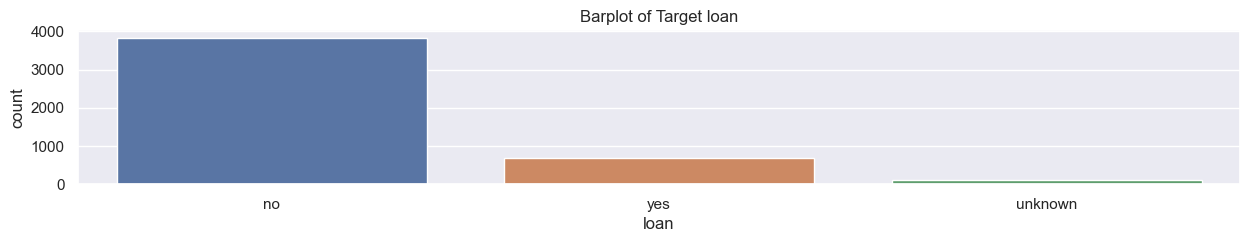

The mode of loan is no.
no         3838
yes         682
unknown     107
Name: loan, dtype: int64


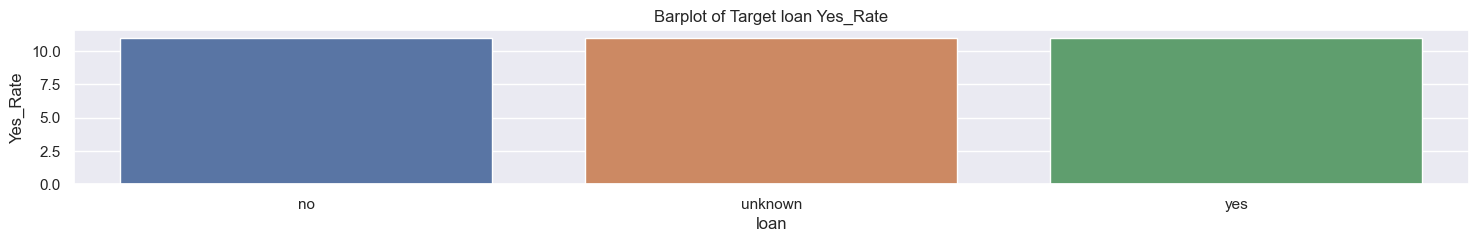


Hypothesis: loan is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 0.6012069180968242.
Fail to reject H0
--------------------------------------------------------------------------------------------------- 

2. housing


y            0     1  Total  Population_Proportion  Yes_Rate  Yes_PProportion
housing                                                                      
yes      19034  2502  21536                  52.40      12.0            54.07
no       16553  2018  18571                  45.19      11.0            43.61
unknown    882   107    989                   2.41      11.0             2.31

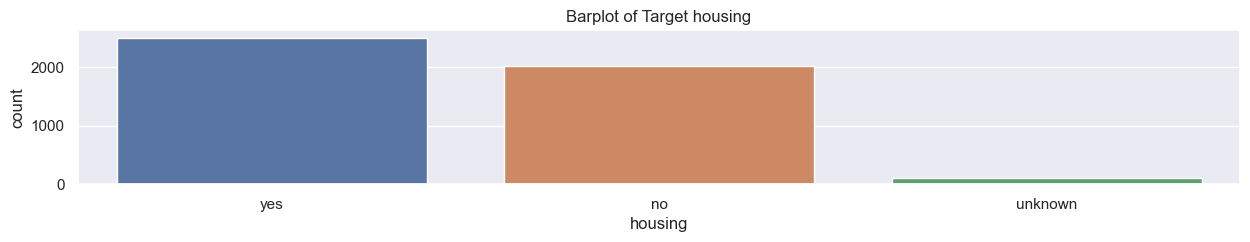

The mode of housing is yes.
yes        2502
no         2018
unknown     107
Name: housing, dtype: int64


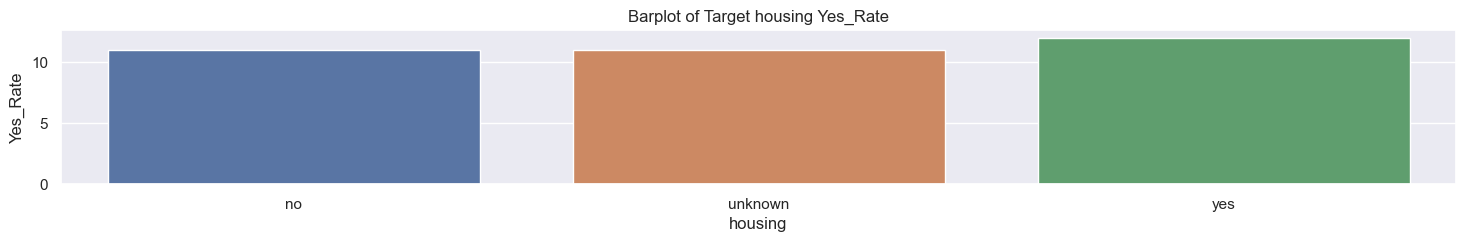


Hypothesis: housing is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 0.054185365056789635.
Fail to reject H0
--------------------------------------------------------------------------------------------------- 



Data Type Mode Mean Median   P-value        Stat Test
loan     Categorical   no    -      -  0.601207  Not Significant
housing  Categorical  yes    -      -  0.054185  Not Significant

In [86]:
auto_eda(dfc, ['loan', 'housing'], 'y', 1)

- Looking at the barplot generated, while the majority of the clients who subscribe to term deposit has no `loan` (85%), there is clearly no difference between the 'Yes_Rate' (The rate of becoming target; subscribe to term deposit) of each client group (with and without loan). 
- The same thing can be said for `housing`, considering the 'Yes_Rate' of each group is very close, with categories of 'no' and 'unknown' sharing the same 'Yes_Rate' despite the major proportion difference

As such, we can safely say that there is no significant contribution of a client's `loan` and `housing` status towards their tendency to subscribe to a term deposit, and that we can consider dropping the feature from modelling and analysis when implementing feature selection

#### **Feature Engineering**

**Encoding**

In [87]:
# Check unique values to determine which type of encoding to use
listItem = []
for col in dfc.columns:
    listItem.append([col, dfc[col].dtype, dfc[col].isna().sum(), round((dfc[col].isna().sum()/len(dfc[col])) * 100, 2),
                    dfc[col].nunique()])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique
0              age    int64     0      0.0      78
1              job   object     0      0.0      11
2          marital   object     0      0.0       3
3        education   object     0      0.0       7
4          default   object     0      0.0       2
5          housing   object     0      0.0       3
6             loan   object     0      0.0       3
7          contact   object     0      0.0       2
8            month   object     0      0.0      10
9      day_of_week   object     0      0.0       5
10        duration    int64     0      0.0    1544
11        campaign    int64     0      0.0      42
12        previous    int64     0      0.0       8
13        poutcome   object     0      0.0       3
14    emp.var.rate  float64     0      0.0      10
15  cons.price.idx  float64     0      0.0      26
16   cons.conf.idx  float64     0      0.0      26
17       euribor3m  float64     0      0.0     316
18     nr.employed  float64     0      0.0      11
19               y    int64     0      0.0       2

Based on the Data Sub-type, we will be doing the following Preprocessing Method:
| **Type** | **Sub-type** | **Preprocessing** | **Variables / Features** |
| --- | --- | --- | --- |
| Quantitative | Continuous | Robust Scaler | `age`, `cons.price.idx`, `cons.conf.idx`, `emp.var.rate`, `euribor3m`, `nr.employed `|
| Quantitative | Discrete | - | `campaign`, `previous`*|
| Categorical | Ordinal | Ordinal Encoding | `education` |
| Categorical | Nominal | Onehot Encoding | `marital`, `default`, `day_of_week`, `poutcome`, `default`, `contact`, `housing`, `loan`|
| Categorical | Nominal | Binary Encoding | `job`, `month`|
| Categorical | Target Variable (Binary) | - | `y` |

Note:
- Due to the high amount of unique values for job and month (11 and 10 respectively), binary encoding will be used for these 2 features.
- `previous` is considered as discrete on datasets without outlier handling, and as binary (already in 0 and 1) on datasets with outlier handling 

In [88]:
# Mapping for ordinal encoding
ordinal_mapping = [
    {'col': 'education',
     'mapping': {None: 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y':4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}}
]

In [89]:
# Transformer for encoding
#1. Without Outlier Handing (previous is still discrete)
transformer1 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['marital', 'day_of_week', 'poutcome', 'default', 'contact', 'housing', 'loan']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['education']),
    ('binary', ce.BinaryEncoder(), ['job', 'month']),
    ('robust scaler', RobustScaler(), ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
    
], remainder='passthrough')

#1. With Outlier Handing (previous is now binary)
transformer2 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['marital', 'day_of_week', 'poutcome', 'default', 'contact', 'housing', 'loan']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['education']),
    ('binary', ce.BinaryEncoder(), ['job', 'month']),
    ('robust scaler', RobustScaler(), ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
    
], remainder='passthrough')

****

### **6. Modeling / Analysis**

#### **Machine Learning Modelling**

We will be trying to model 5 types of datasets based on the dataset used:
1. Without any Data Cleaning (Outliers and Missing Values intact)
2. With Outliers Handled
3. With Missing Values Handled
4. With Full Data Cleaning
5. With Feature Selection

- All dataset will have duplicates cleaned and `pdays` & `duration` removed from the modelling.
- The first 4 dataset models will be benchmarked against each other at the model benchmarking step (applied to all estimators) and the best performer will be selected to continue with modelling until finished.
- The best performing dataset out of the 4 will be selected to go through a feature selection based on its model's feature importance and Feature Selection conducted earlier as the 5th dataset, and performance will be compared at the model benchmarking step to determine which model to use

#### **Modelling - No Feature Selection**

#### 1. **Data Splitting**

We will be splitting 80:20 for Training and Testing dataset, Stratified to y and with random state of 42

In [90]:
#Dataset 1
x1 = df.drop(columns=['duration', 'y'])
y1 = df['y']

x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1,
    y1,
    test_size= 0.2,
    random_state= seed,
    stratify= y1
)

In [91]:
#Dataset 2
x2 = df_out.drop(columns=['duration', 'y'])
y2 = df_out['y']

x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2,
    y2,
    test_size= 0.2,
    random_state= seed,
    stratify= y2
)

In [92]:
#Dataset 3
x3 = dfc.drop(columns=['duration', 'y'])
y3 = dfc['y']

x3_train, x3_test, y3_train, y3_test = train_test_split(
    x3,
    y3,
    test_size= 0.2,
    random_state= seed,
    stratify= y3
)

In [93]:
#Dataset 4
x4 = dfc_out.drop(columns=['duration', 'y'])  #all variables except 'y' will be used
y4 = dfc_out['y']

x4_train, x4_test, y4_train, y4_test = train_test_split(
    x4,
    y4,
    test_size= 0.2,
    random_state= seed,
    stratify= y4
)

Let's try to check if the transformer works

In [94]:
transformer_test1 = pd.DataFrame(transformer1.fit_transform(x1_train),columns=transformer1.get_feature_names_out())
transformer_test2 = pd.DataFrame(transformer2.fit_transform(x2_train),columns=transformer2.get_feature_names_out())
transformer_test3 = pd.DataFrame(transformer1.fit_transform(x3_train),columns=transformer1.get_feature_names_out())
transformer_test4 = pd.DataFrame(transformer2.fit_transform(x4_train),columns=transformer2.get_feature_names_out())

In [95]:
def check_data(df):
    listItem = []
    for col in df.columns :
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100, 2),
                        df[col].nunique(), list(df[col].drop_duplicates().values)])

    dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                        data=listItem)
    return dfDesc

In [96]:
#Dataset 1
check_data(transformer_test1)

dataFeatures dataType  null  nullPct  unique  \
0         onehot__marital_married  float64     0      0.0       2   
1          onehot__marital_single  float64     0      0.0       2   
2         onehot__marital_unknown  float64     0      0.0       2   
3         onehot__day_of_week_mon  float64     0      0.0       2   
4         onehot__day_of_week_thu  float64     0      0.0       2   
5         onehot__day_of_week_tue  float64     0      0.0       2   
6         onehot__day_of_week_wed  float64     0      0.0       2   
7    onehot__poutcome_nonexistent  float64     0      0.0       2   
8        onehot__poutcome_success  float64     0      0.0       2   
9         onehot__default_unknown  float64     0      0.0       2   
10            onehot__default_yes  float64     0      0.0       2   
11      onehot__contact_telephone  float64     0      0.0       2   
12        onehot__housing_unknown  float64     0      0.0       2   
13            onehot__housing_yes  float64     0      0.0       2   
14           onehot__loan_unknown  float64     0      0.0       2   
15               onehot__loan_yes  float64     0      0.0       2   
16             ordinal__education  float64     0      0.0       8   
17                  binary__job_0  float64     0      0.0       2   
18                  binary__job_1  float64     0      0.0       2   
19                  binary__job_2  float64     0      0.0       2   
20                  binary__job_3  float64     0      0.0       2   
21                binary__month_0  float64     0      0.0       2   
22                binary__month_1  float64     0      0.0       2   
23                binary__month_2  float64     0      0.0       2   
24                binary__month_3  float64     0      0.0       2   
25             robust scaler__age  float64     0      0.0      77   
26        robust scaler__campaign  float64     0      0.0      41   
27        robust scaler__previous  float64     0      0.0       8   
28    robust scaler__emp.var.rate  float64     0      0.0      10   
29  robust scaler__cons.price.idx  float64     0      0.0      26   
30   robust scaler__cons.conf.idx  float64     0      0.0      26   
31       robust scaler__euribor3m  float64     0      0.0     312   
32     robust scaler__nr.employed  float64     0      0.0      11   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [97]:
#Dataset 2
check_data(transformer_test2)

dataFeatures dataType  null  nullPct  unique  \
0         onehot__marital_married  float64     0      0.0       2   
1          onehot__marital_single  float64     0      0.0       2   
2         onehot__marital_unknown  float64     0      0.0       2   
3         onehot__day_of_week_mon  float64     0      0.0       2   
4         onehot__day_of_week_thu  float64     0      0.0       2   
5         onehot__day_of_week_tue  float64     0      0.0       2   
6         onehot__day_of_week_wed  float64     0      0.0       2   
7    onehot__poutcome_nonexistent  float64     0      0.0       2   
8        onehot__poutcome_success  float64     0      0.0       2   
9         onehot__default_unknown  float64     0      0.0       2   
10            onehot__default_yes  float64     0      0.0       2   
11      onehot__contact_telephone  float64     0      0.0       2   
12        onehot__housing_unknown  float64     0      0.0       2   
13            onehot__housing_yes  float64     0      0.0       2   
14           onehot__loan_unknown  float64     0      0.0       2   
15               onehot__loan_yes  float64     0      0.0       2   
16             ordinal__education  float64     0      0.0       8   
17                  binary__job_0  float64     0      0.0       2   
18                  binary__job_1  float64     0      0.0       2   
19                  binary__job_2  float64     0      0.0       2   
20                  binary__job_3  float64     0      0.0       2   
21                binary__month_0  float64     0      0.0       2   
22                binary__month_1  float64     0      0.0       2   
23                binary__month_2  float64     0      0.0       2   
24                binary__month_3  float64     0      0.0       2   
25             robust scaler__age  float64     0      0.0      53   
26        robust scaler__campaign  float64     0      0.0      10   
27    robust scaler__emp.var.rate  float64     0      0.0      10   
28  robust scaler__cons.price.idx  float64     0      0.0      26   
29   robust scaler__cons.conf.idx  float64     0      0.0      26   
30       robust scaler__euribor3m  float64     0      0.0     313   
31     robust scaler__nr.employed  float64     0      0.0      11   
32            remainder__previous  float64     0      0.0       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [98]:
#Dataset 3
check_data(transformer_test3)

dataFeatures dataType  null  nullPct  unique  \
0            onehot__marital_married  float64     0      0.0       2   
1             onehot__marital_single  float64     0      0.0       2   
2            onehot__day_of_week_mon  float64     0      0.0       2   
3            onehot__day_of_week_thu  float64     0      0.0       2   
4            onehot__day_of_week_tue  float64     0      0.0       2   
5            onehot__day_of_week_wed  float64     0      0.0       2   
6   onehot__poutcome_p_not_contacted  float64     0      0.0       2   
7           onehot__poutcome_success  float64     0      0.0       2   
8        onehot__default_undisclosed  float64     0      0.0       2   
9          onehot__contact_telephone  float64     0      0.0       2   
10           onehot__housing_unknown  float64     0      0.0       2   
11               onehot__housing_yes  float64     0      0.0       2   
12              onehot__loan_unknown  float64     0      0.0       2   
13                  onehot__loan_yes  float64     0      0.0       2   
14                ordinal__education  float64     0      0.0       7   
15                     binary__job_0  float64     0      0.0       2   
16                     binary__job_1  float64     0      0.0       2   
17                     binary__job_2  float64     0      0.0       2   
18                     binary__job_3  float64     0      0.0       2   
19                   binary__month_0  float64     0      0.0       2   
20                   binary__month_1  float64     0      0.0       2   
21                   binary__month_2  float64     0      0.0       2   
22                   binary__month_3  float64     0      0.0       2   
23                robust scaler__age  float64     0      0.0      77   
24           robust scaler__campaign  float64     0      0.0      41   
25           robust scaler__previous  float64     0      0.0       8   
26       robust scaler__emp.var.rate  float64     0      0.0      10   
27     robust scaler__cons.price.idx  float64     0      0.0      26   
28      robust scaler__cons.conf.idx  float64     0      0.0      26   
29          robust scaler__euribor3m  float64     0      0.0     311   
30        robust scaler__nr.employed  float64     0      0.0      11   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [99]:
#Dataset 4
check_data(transformer_test4)

dataFeatures dataType  null  nullPct  unique  \
0            onehot__marital_married  float64     0      0.0       2   
1             onehot__marital_single  float64     0      0.0       2   
2            onehot__day_of_week_mon  float64     0      0.0       2   
3            onehot__day_of_week_thu  float64     0      0.0       2   
4            onehot__day_of_week_tue  float64     0      0.0       2   
5            onehot__day_of_week_wed  float64     0      0.0       2   
6   onehot__poutcome_p_not_contacted  float64     0      0.0       2   
7           onehot__poutcome_success  float64     0      0.0       2   
8        onehot__default_undisclosed  float64     0      0.0       2   
9          onehot__contact_telephone  float64     0      0.0       2   
10           onehot__housing_unknown  float64     0      0.0       2   
11               onehot__housing_yes  float64     0      0.0       2   
12              onehot__loan_unknown  float64     0      0.0       2   
13                  onehot__loan_yes  float64     0      0.0       2   
14                ordinal__education  float64     0      0.0       7   
15                     binary__job_0  float64     0      0.0       2   
16                     binary__job_1  float64     0      0.0       2   
17                     binary__job_2  float64     0      0.0       2   
18                     binary__job_3  float64     0      0.0       2   
19                   binary__month_0  float64     0      0.0       2   
20                   binary__month_1  float64     0      0.0       2   
21                   binary__month_2  float64     0      0.0       2   
22                   binary__month_3  float64     0      0.0       2   
23                robust scaler__age  float64     0      0.0      53   
24           robust scaler__campaign  float64     0      0.0      10   
25       robust scaler__emp.var.rate  float64     0      0.0      10   
26     robust scaler__cons.price.idx  float64     0      0.0      26   
27      robust scaler__cons.conf.idx  float64     0      0.0      26   
28          robust scaler__euribor3m  float64     0      0.0     311   
29        robust scaler__nr.employed  float64     0      0.0      11   
30               remainder__previous  float64     0      0.0       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

The datasets with no Missing Value handling (dataset 1 & 2) have 33 features after transforming (encoding), and 31 for those with Missing Value handling (dataset 3 & 4)

##### **2. Model Benchmarking**

We will try to benchmark the 4 data from 2 angles:
- Stratified 5-Fold Cross-Validation : to get initial performance when using training data for validation
- Test data: to see the performance when implemented on test data

In [100]:
#Insert all estimators that we can use for classification model
logreg = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed, verbosity=0)
lgbm = lgb.LGBMClassifier(random_state=seed, verbose=-1)

**Model Benchmarking: Stratified K-Fold**

In [101]:
models = [logreg,knn,dt,rf,xgb,lgbm]
dataset = [
    [x1_train, y1_train, transformer1],
    [x2_train, y2_train, transformer2],
    [x3_train, y3_train, transformer1],
    [x4_train, y4_train, transformer2]
           ]

count = 0
for x_train, y_train, transformer in dataset:
    score=[]
    mean=[]
    mean_r = []
    std=[]
    
    for i in models:
        skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train, y_train,cv=skfold,scoring='f1')
        score.append(model_cv)
        mean.append(model_cv.mean())
        model_cv=cross_val_score(estimator,x_train, y_train,cv=skfold,scoring='recall')
        mean_r.append(model_cv.mean())
        std.append(model_cv.std())
    count += 1 
    print(f'Dataset {count}:')    
    display(pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1':mean,'mean recall':mean_r,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False))

Dataset 1:


mean f1  mean recall      sdev
model                                               
XGBoost              0.376606     0.277283  0.009082
LightGBM             0.374093     0.266237  0.009934
Random Forest        0.373807     0.282946  0.007740
KNN                  0.338765     0.253840  0.007658
Logistic Regression  0.326871     0.218537  0.010937
Decision Tree        0.319441     0.340077  0.015234

Dataset 2:


mean f1  mean recall      sdev
model                                               
XGBoost              0.354408     0.259602  0.013698
Random Forest        0.349092     0.260741  0.010708
LightGBM             0.344160     0.236832  0.009349
KNN                  0.316535     0.233981  0.012293
Logistic Regression  0.311468     0.204380  0.006273
Decision Tree        0.300113     0.321659  0.015586

Dataset 3:


mean f1  mean recall      sdev
model                                               
XGBoost              0.369233     0.272288  0.015812
Random Forest        0.367568     0.278774  0.015083
LightGBM             0.361681     0.255548  0.020080
KNN                  0.336352     0.254193  0.018191
Logistic Regression  0.322039     0.213948  0.017381
Decision Tree        0.315905     0.336310  0.011555

Dataset 4:


mean f1  mean recall      sdev
model                                               
XGBoost              0.365469     0.268914  0.021669
LightGBM             0.351639     0.245222  0.014059
Random Forest        0.348976     0.260632  0.014113
KNN                  0.322014     0.240651  0.002938
Logistic Regression  0.306872     0.200971  0.013608
Decision Tree        0.301936     0.322299  0.009988

Based on this Cross-Validation, Dataset 1 unanimously outperform the other 3 datasets based on its f1 score and recall.
- Handling the Missing Values by imputing actually made the model perform worse
- Removing outliers universally worsen the f1 score of any model

This implies that the Missing Value and Outlier handling we did might introduce bias or removal of important data which can help the model classify the observations based on the `y` Target

As such, we will be moving forward with Dataset 1 (No Missing Value and Outlier Treatment)

**Model Benchmarking: Test Data**

In [102]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer1),
        ('model',i)])
    
    estimator.fit(x1_train,y1_train)
    return(estimator,estimator.predict(x1_test))

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred = y_pred_func(i)
    score_f1.append(f1_score(y1_test,y_pred))
    print(j,'\n', classification_report(y1_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.63      0.21      0.31       928

    accuracy                           0.90      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.88      0.90      0.87      8236

KNN 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.52      0.26      0.35       928

    accuracy                           0.89      8236
   macro avg       0.72      0.61      0.64      8236
weighted avg       0.87      0.89      0.87      8236

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.30      0.34      0.32       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.61      8236
weighted avg       0.85      0

f1 score
model                        
Random Forest        0.378723
XGBoost              0.372230
LightGBM             0.360248
KNN                  0.345821
Decision Tree        0.321285
Logistic Regression  0.310065

With Dataset 1, XGBoost, Random Forest, and LightGBM consistently top the f1 score both at CV and Test Data Benchmarking, with XGBoost significantly outperforming the two, and LightGBM placing 3rd.

We will plot all models to confirm their performance

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to plot precision-recall curves and F1 scores for a single model
def plot_precision_recall_f1(estimator, x_train, y_train, x_test, y_test, model_name):
    from sklearn.metrics import precision_recall_curve, f1_score
    
    model = estimator.fit(x_train, y_train)

    # Predict probabilities on the test set
    y_pred_prob = model.predict_proba(x_test)[:, 1]

    # Calculate precision and recall
    precision, recall, tresholds = precision_recall_curve(y_test, y_pred_prob)

    # Calculate F1 scores for different thresholds
    th_values = [i / 100 for i in range(0, 100)]  
    f1_scores = []

    for threshold in th_values:
        y_pred = (y_pred_prob > threshold).astype(int)
        f1_scores.append(f1_score(y_test, y_pred))
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot precision-recall curve
    axes[0].plot(recall, precision, marker='.')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title(f'{model_name} Precision-Recall Curve')
    axes[0].grid(True)

    # Plot Threshold - Precision & Recall
    axes[1].plot(tresholds, precision[:-1], label='Precision', marker='.')
    axes[1].plot(tresholds, recall[:-1], label='Recall', marker='.')
    axes[1].set_xlabel('Threshold')
    axes[1].set_ylabel('Precision / Recall')
    axes[1].set_title(f'{model_name} Precision and Recall vs. Threshold')
    axes[1].legend(loc= 'lower left')
    axes[1].grid(True)
    
    # Plot F1 scores vs. Threshold
    axes[2].plot(th_values, f1_scores, label='F1 Score', marker='.')
    axes[2].set_xlabel('Threshold')
    axes[2].set_ylabel('F1 Score')
    axes[2].set_title(f'{model_name} F1 Score vs. Threshold')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()


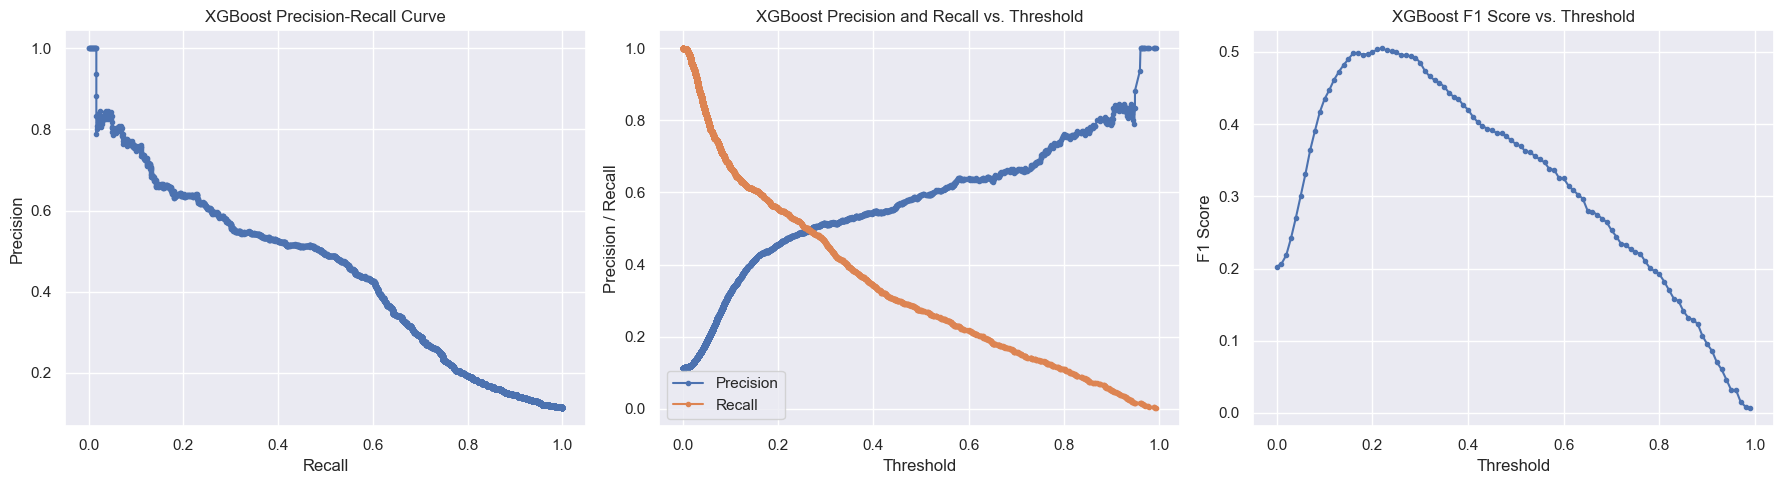

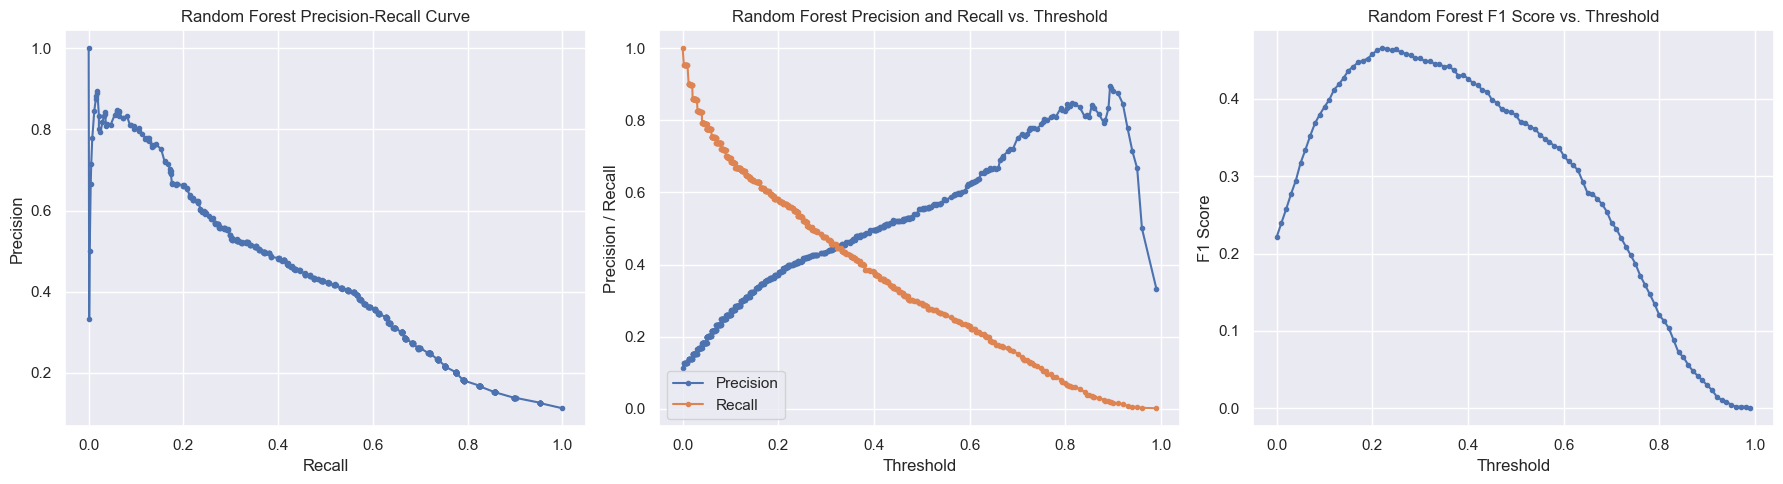

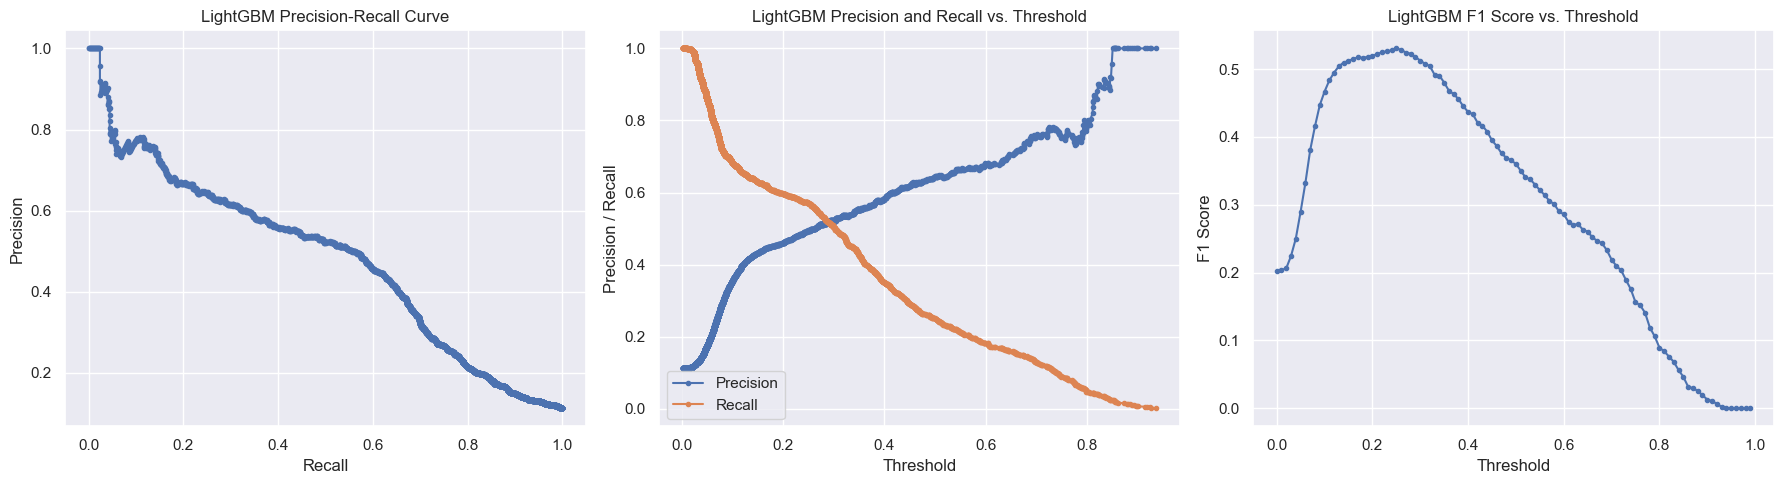

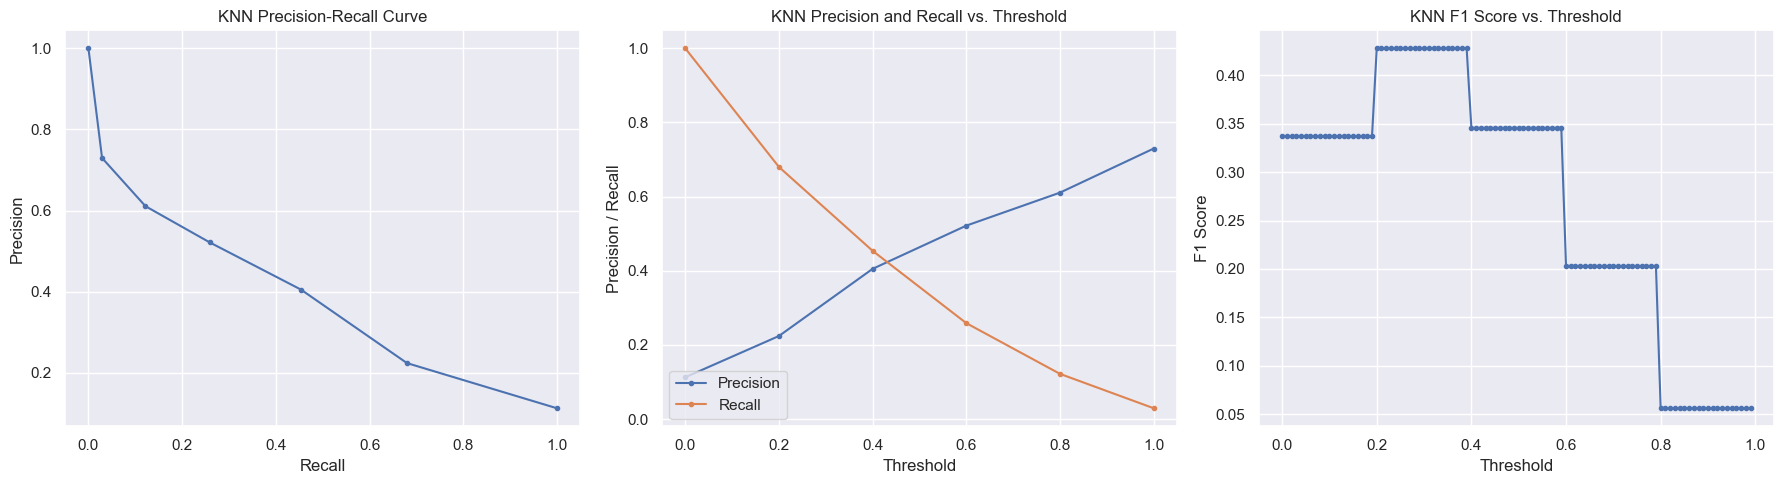

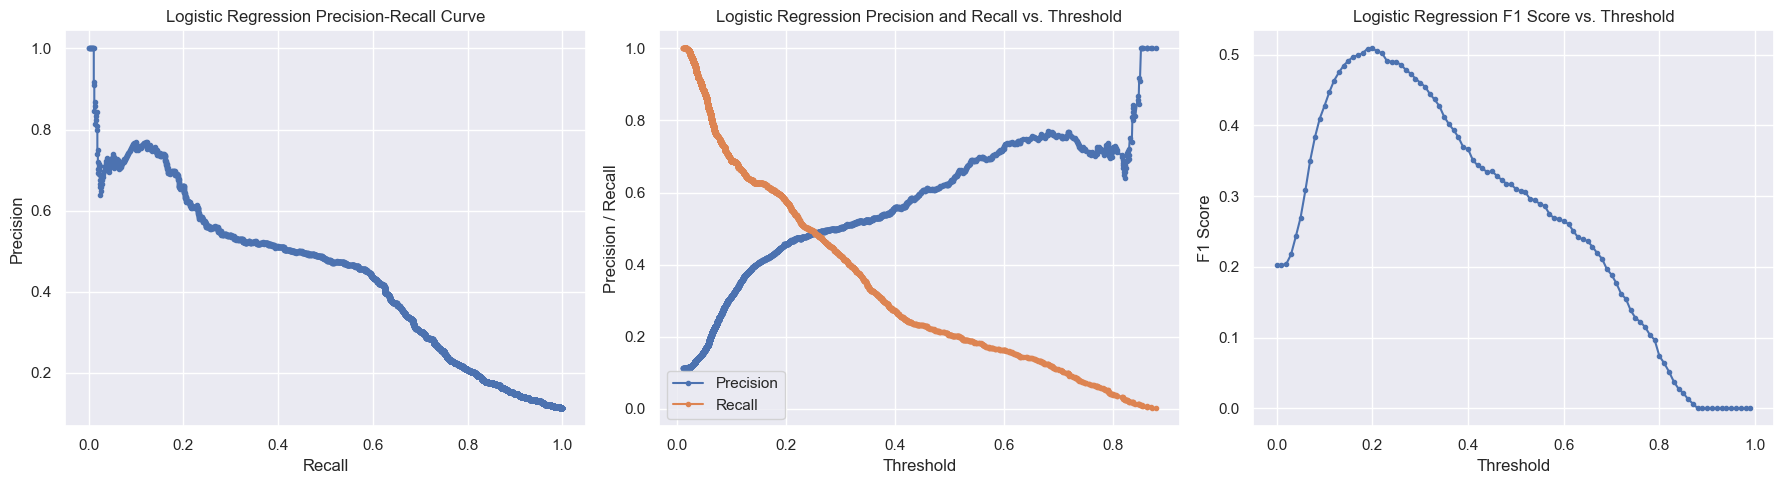

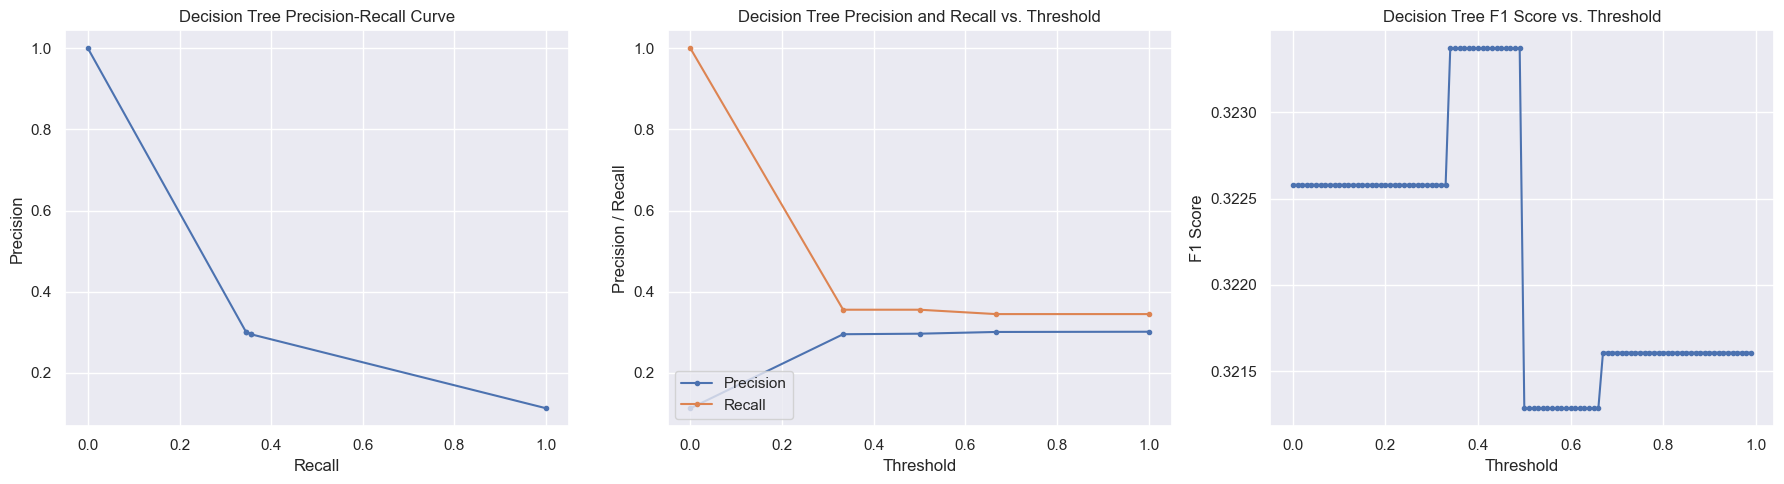

In [104]:
models = [
    (xgb, 'XGBoost'),
    (rf, 'Random Forest'),
    (lgbm, 'LightGBM'),
    (knn, 'KNN'),
    (logreg, 'Logistic Regression'),
    (dt, 'Decision Tree')
]

for model, model_name in models:
    estimator = Pipeline([
        ('preprocess', transformer1),
        ('model', model)
    ])
    plot_precision_recall_f1(estimator, x1_train, y1_train, x1_test, y1_test, model_name)


Surprisingly, LightGBM have the highest potential f1 score at around 0.25 threshold, followed by XGBoost, Logistic Regression, and Random Forest.
- While Random Forest performs consistently well during validation and test data benchmarking with the threshold of 0.5, it is clear that it has the least potential for better f1 score in other threshold.
- Logistic Regression has the potential to perform well when we train it with the dataset which has the features with multicolinearity removed, which will be done on the next modelling

Based on this, we will only be continuing with LightGBM and XGBoost as potential models, and compare both performance after data rebalancing

****

#### 3. Data Balancing

We will be trying to use 3 types of Resampling method:
- Random UnderSampling
- Random OverSampling
- Oversampling - SMOTE

In [105]:
rus = RandomUnderSampler(random_state= 42)
ros = RandomOverSampler(random_state= 42)
smote = SMOTE()

Due to the nature of the remaining models we are testing (Boosted Decision Trees), we no longer require scaling the dataset, and we will be dropping it from the transformer to potentially increase its accuracy

In [106]:
#Transformer1 Reconfiguration
ordinal_mapping = [
    {'col': 'education',
     'mapping': {None: 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y':4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}}  #other than current data = None (0)
]

transformer1 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['marital', 'day_of_week', 'poutcome','default', 'contact', 'housing', 'loan']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['education']),
    ('binary', ce.BinaryEncoder(), ['job', 'month']),
], remainder='passthrough')

Using XGBoost

In [107]:
rs = [rus, ros, smote]
score=[]
mean=[]
std=[]

for i in rs:
    skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    estimator=Pipeline([
        ('preprocess',transformer1),
        ('balance', i), #resampling
        ('model', xgb)])  #classifier
    model_cv=cross_val_score(estimator,x1_train,y1_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

#unbalanced
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
estimator=Pipeline([
    ('preprocess',transformer1),
    ('model', xgb)])  #classifier
model_cv=cross_val_score(estimator,x1_train,y1_train,cv=skfold,scoring='f1')
score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())
rs.append('No Balancing')

pd.DataFrame({'Resampling':rs,'mean f1':mean,'sdev':std}).set_index('Resampling').sort_values(by='mean f1',ascending=False)

mean f1      sdev
Resampling                                             
RandomOverSampler(random_state=42)   0.435425  0.008946
RandomUnderSampler(random_state=42)  0.394954  0.005542
SMOTE()                              0.381469  0.013450
No Balancing                         0.376606  0.008853

Using LightGBM

In [108]:
rs = [rus, ros, smote]
score=[]
mean=[]
std=[]

for i in rs:
    skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    estimator=Pipeline([
        ('preprocess',transformer1),
        ('balance', i), #resampling
        ('model', lgbm)])  #classifier
    model_cv=cross_val_score(estimator,x1_train,y1_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

#unbalanced
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
estimator=Pipeline([
    ('preprocess',transformer1),
    ('model', lgbm)])  #classifier
model_cv=cross_val_score(estimator,x1_train,y1_train,cv=skfold,scoring='f1')
score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())
rs.append('No Balancing')

pd.DataFrame({'Resampling':rs,'mean f1':mean,'sdev':std}).set_index('Resampling').sort_values(by='mean f1',ascending=False)

mean f1      sdev
Resampling                                             
RandomOverSampler(random_state=42)   0.474585  0.008429
RandomUnderSampler(random_state=42)  0.444072  0.007316
SMOTE()                              0.378823  0.008633
No Balancing                         0.369438  0.006649

As we can see, LightGBM is significantly superior on every data rebalancing method even in the default treshold (0.5)

As such, we will proceed with using LightGBM as our estimator

Test Dataset

In [109]:
rs = [rus, ros, smote]
score_f1=[]

def y_pred_func_rs(i):
    estimator=Pipeline([
        ('preprocess',transformer1),
        ('balance', i),
        ('model', lgbm)])
    
    estimator.fit(x1_train,y1_train)
    return(estimator,estimator.predict(x1_test))

for i in rs:
    estimator,y_pred= y_pred_func_rs(i)
    score_f1.append(f1_score(y1_test,y_pred))
    print(i,'\n', classification_report(y1_test,y_pred))

#no rebalancing
estimator=Pipeline([
        ('preprocess',transformer1),
        ('model', lgbm)])
    
estimator.fit(x1_train,y1_train)
y_pred = estimator.predict(x1_test)
rs.append('No Balancing')
score_f1.append(f1_score(y1_test,y_pred))
print(j,'\n', classification_report(y1_test,y_pred))



pd.DataFrame({'Resampling':rs,
             'f1 score':score_f1}).set_index('Resampling').sort_values(by='f1 score',ascending=False)

RandomUnderSampler(random_state=42) 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.67      0.48       928

    accuracy                           0.83      8236
   macro avg       0.66      0.76      0.69      8236
weighted avg       0.89      0.83      0.85      8236

RandomOverSampler(random_state=42) 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.40      0.64      0.49       928

    accuracy                           0.85      8236
   macro avg       0.67      0.76      0.70      8236
weighted avg       0.89      0.85      0.86      8236

SMOTE() 
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7308
           1       0.60      0.29      0.39       928

    accuracy                           0.90      8236
   macro avg       0.76      0.63      0.67

f1 score
Resampling                                   
RandomOverSampler(random_state=42)   0.491532
RandomUnderSampler(random_state=42)  0.476301
SMOTE()                              0.390704
No Balancing                         0.358578

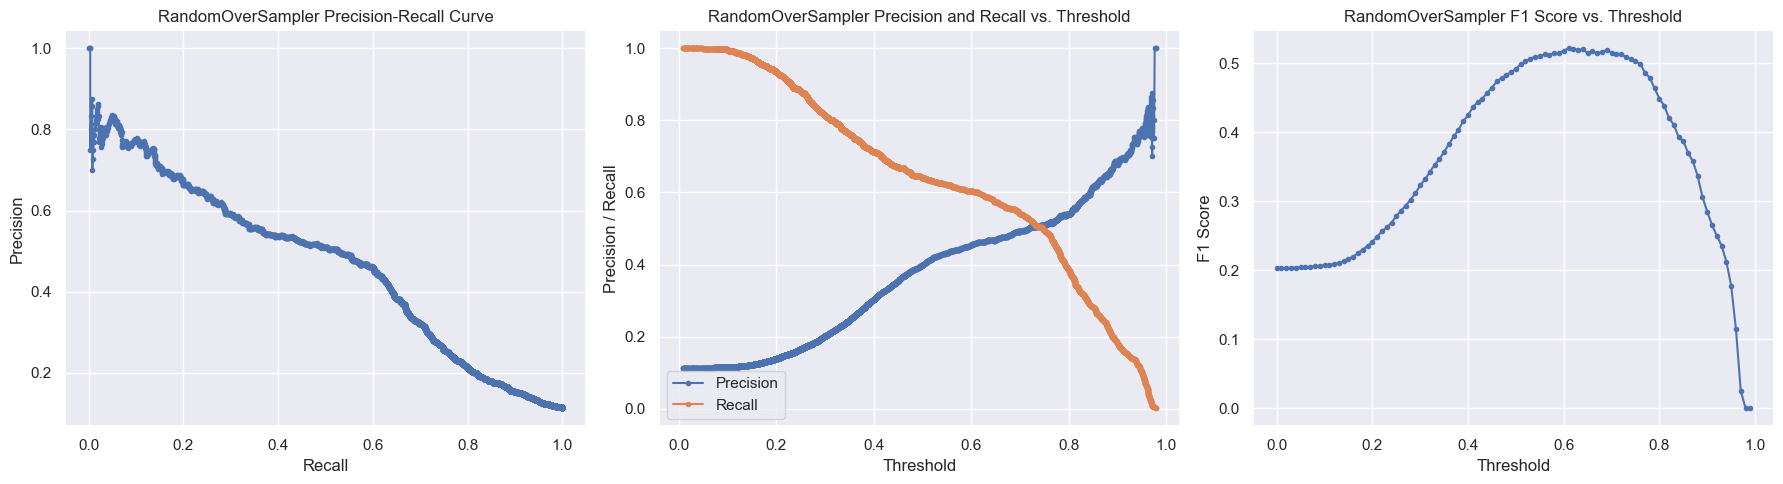

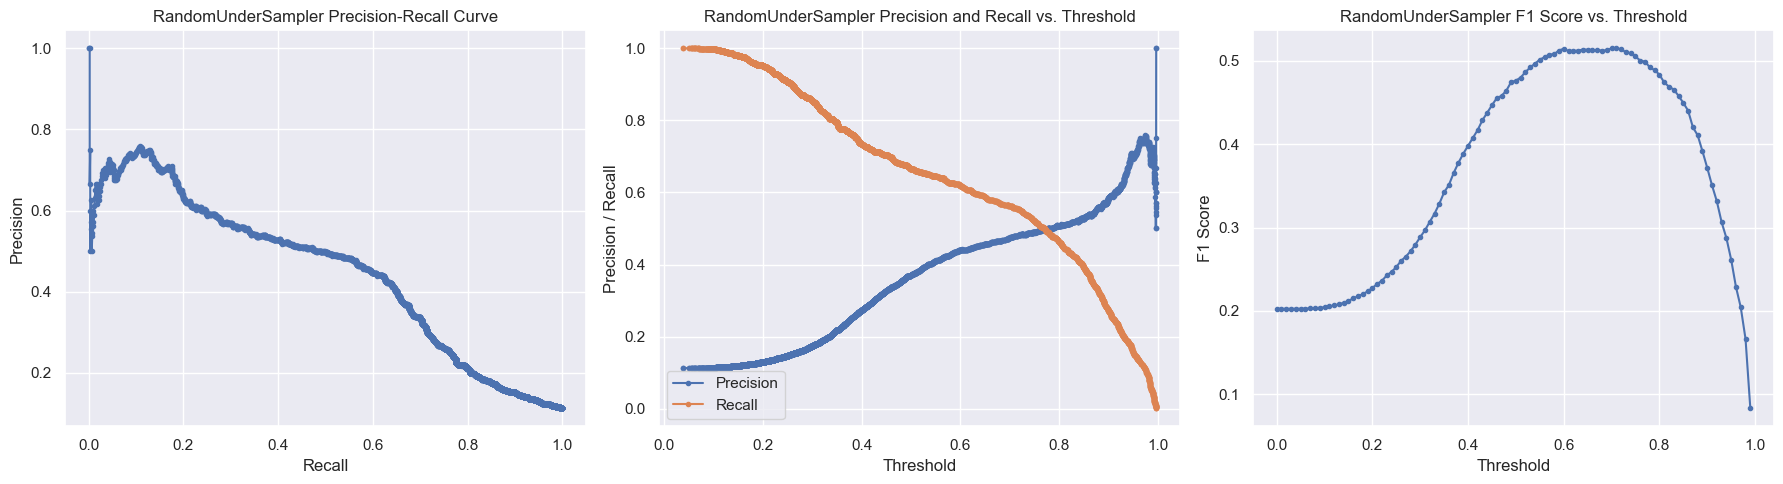

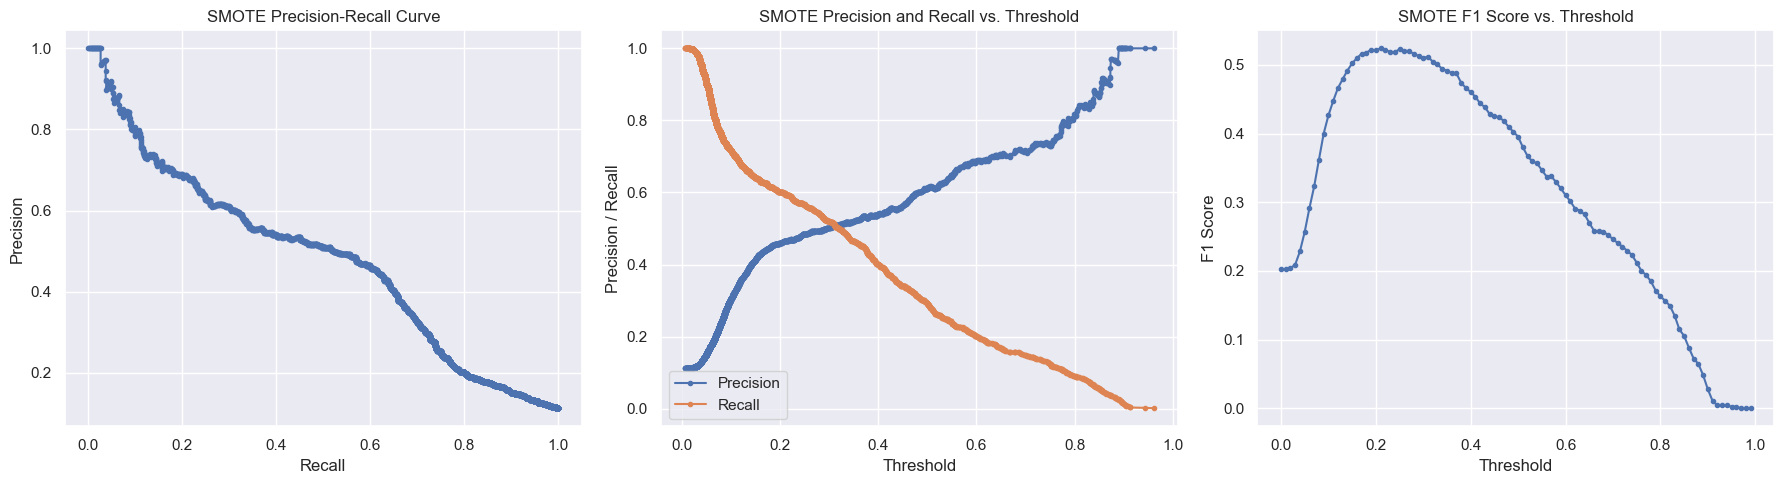

In [110]:
rs = [
    (ros, 'RandomOverSampler'),
    (rus, 'RandomUnderSampler'),
    (smote, 'SMOTE'),
]

for i, balancing_name in rs:
    estimator = Pipeline([
        ('preprocess', transformer1),
        ('balance', i),
        ('model', lgbm)
    ])
    plot_precision_recall_f1(estimator, x1_train, y1_train, x1_test, y1_test, balancing_name)

While placing 3rd on default threshold, SMOTE surprisingly have a higher peak of f1 score compared to the other rebalancing methods, followed by RandomOverSampler (which placed 1st on default treshold)
- This indicates that this dataset prefers rebalancing using Oversampling rather than undersampling

While SMOTE has the higher potential f1 score, it prioritizes the precision score with a much deflated recall score, which is on the contrary of what we need for our business problem

As such, we will not be choosing SMOTE as our best rebalancing method, but instead the RandomOverSampler, which give similar recall spread as RandomUndersampler whilst providing better f1 score on lower tresholds

#### 4. **Hyperparameter Tuning**

default hyperparameters of LGBM:
  - `max_bin` = 255 
  - `num_leaves` = 31
  - `min_data_in_leaf` = 20
  - `num_iterations` = 100
  - `learning_rate` = 0.1

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [111]:
lgbm = lgb.LGBMClassifier(random_state=seed, verbose=-1)
ros = RandomOverSampler(random_state=42)

estimator = Pipeline([
    ('preprocess',transformer1),
    ('oversampling',ros),
    ('model', lgbm)
])

skfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

hyperparam_space={
    'model__max_bin': [255, 275, 230],
    'model__num_leaves':[31, 21, 41],
    'model__min_data_in_leaf': [20, 15, 30],
    'model__num_iterations':[100,75, 125],
    'model__learning_rate': [0.1, 0.075, 0.125],
    
    'model__random_state': [42]
}
grid = GridSearchCV( 
    estimator,
    param_grid= hyperparam_space,
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1
)

In [112]:
grid.fit(x1_train, y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['marital',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'default',
                                                                          'contact',
                                                                          'housing',
                                                                          'loan']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dt...
                                                                          'month'])])),
                                       ('oversampling',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LGBMClassifier(random_state=42,
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.075, 0.125],
                         'model__max_bin': [255, 275, 230],
                         'model__min_data_in_leaf': [20, 15, 30],
                         'model__num_iterations': [100, 75, 125],
                         'model__num_leaves': [31, 21, 41],
                         'model__random_state': [42]},
             scoring='f1')

In [113]:
grid.best_score_, grid.best_params_

(0.4791970895406036,
 {'model__learning_rate': 0.075,
  'model__max_bin': 255,
  'model__min_data_in_leaf': 30,
  'model__num_iterations': 75,
  'model__num_leaves': 31,
  'model__random_state': 42})

In [114]:
best_model = grid.best_estimator_
best_model.fit(x1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.075, max_bin=255,
                                min_data_in_leaf=30, num_iterations=75,
                                random_state=42, verbose=-1))])

In [115]:
#default model
default_model= Pipeline([
    ('preprocess',transformer1),
    ('balance', ros),
    ('model', lgbm)
])
default_model.fit(x1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('balance', RandomOverSampler(random_state=42)),
                ('model', LGBMClassifier(random_state=42, verbose=-1))])

In [116]:
y_pred_default = default_model.predict(x1_test)
y_pred_proba_default = default_model.predict_proba(x1_test)
y_pred_tuned = best_model.predict(x1_test)
y_pred_proba_tuned = best_model.predict_proba(x1_test)

roc_auc_default = roc_auc_score(y1_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y1_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM:', roc_auc_default)
print('ROC AUC Score Tuned LGBM:', roc_auc_tuned)

ROC AUC Score Default LGBM: 0.8099152971236057
ROC AUC Score Tuned LGBM: 0.8125120174159637


In [117]:
report_default = classification_report(y1_test, y_pred_default)
report_tuned = classification_report(y1_test, y_pred_tuned)

print('Classification Report Default LGBM: \n', report_default)
print('Classification Report Tuned LGBM: \n', report_tuned)

Classification Report Default LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.40      0.64      0.49       928

    accuracy                           0.85      8236
   macro avg       0.67      0.76      0.70      8236
weighted avg       0.89      0.85      0.86      8236

Classification Report Tuned LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.40      0.64      0.50       928

    accuracy                           0.85      8236
   macro avg       0.68      0.76      0.71      8236
weighted avg       0.89      0.85      0.87      8236



##### Tuning - Iteration 2

Previous Best Parameters:
  - `max_bin` = 255 
  - `num_leaves` = 31
  - `min_data_in_leaf` = 30
  - `num_iterations` = 75
  - `learning_rate` = 0.075

In [118]:
lgbm = lgb.LGBMClassifier(random_state=seed, verbose=-1)
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('preprocess',transformer1),
    ('oversampling',ros),
    ('model',lgbm)
])

hyperparam_space={
    'model__max_bin': [255, 265, 240],
    'model__num_leaves':[31, 25, 36],
    'model__min_data_in_leaf': [25, 30, 40],
    'model__num_iterations':[90, 75, 50],
    'model__learning_rate': [0.075, 0.05, 0.025],
    'model__random_state': [42]
}
grid = GridSearchCV( 
    estimator,
    param_grid= hyperparam_space,   #hyperparam is set as the models
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1
)

In [119]:
grid.fit(x1_train, y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['marital',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'default',
                                                                          'contact',
                                                                          'housing',
                                                                          'loan']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dt...
                                                                          'month'])])),
                                       ('oversampling',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LGBMClassifier(random_state=42,
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.075, 0.05, 0.025],
                         'model__max_bin': [255, 265, 240],
                         'model__min_data_in_leaf': [25, 30, 40],
                         'model__num_iterations': [90, 75, 50],
                         'model__num_leaves': [31, 25, 36],
                         'model__random_state': [42]},
             scoring='f1')

In [120]:
grid.best_score_, grid.best_params_

(0.47991053360082747,
 {'model__learning_rate': 0.05,
  'model__max_bin': 255,
  'model__min_data_in_leaf': 25,
  'model__num_iterations': 75,
  'model__num_leaves': 36,
  'model__random_state': 42})

In [121]:
best_model2 = grid.best_estimator_
best_model2.fit(x1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=255,
                                min_data_in_leaf=25, num_iterations=75,
                                num_leaves=36, random_state=42, verbose=-1))])

In [122]:
y_pred_default = best_model.predict(x1_test)
y_pred_proba_default = best_model.predict_proba(x1_test)
y_pred_tuned = best_model2.predict(x1_test)
y_pred_proba_tuned = best_model2.predict_proba(x1_test)

roc_auc_default = roc_auc_score(y1_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y1_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Tuned1 LGBM:', roc_auc_default)
print('ROC AUC Score Tuned2 LGBM:', roc_auc_tuned)

ROC AUC Score Tuned1 LGBM: 0.8125120174159637
ROC AUC Score Tuned2 LGBM: 0.8152496290083612


In [123]:
report_default = classification_report(y1_test, y_pred_default)
report_tuned = classification_report(y1_test, y_pred_tuned)

print('Classification Report Tuned1 LGBM: \n', report_default)
print('Classification Report Tuned2 LGBM: \n', report_tuned)

Classification Report Tuned1 LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.40      0.64      0.50       928

    accuracy                           0.85      8236
   macro avg       0.68      0.76      0.71      8236
weighted avg       0.89      0.85      0.87      8236

Classification Report Tuned2 LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7308
           1       0.41      0.65      0.50       928

    accuracy                           0.86      8236
   macro avg       0.68      0.77      0.71      8236
weighted avg       0.89      0.86      0.87      8236



##### Tuning - Iteration 3

Previous Best Parameters:
  - `max_bin` = 255 
  - `num_leaves` = 36
  - `min_data_in_leaf` = 25
  - `num_iterations` = 75
  - `learning_rate` = 0.05

In [124]:
lgbm = lgb.LGBMClassifier(random_state=seed, verbose=-1)
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('preprocess',transformer1),
    ('oversampling',ros),
    ('model',lgbm)
])

hyperparam_space={
    'model__max_bin': [255, 260, 250],
    'model__num_leaves':[34, 36, 38],
    'model__min_data_in_leaf': [23, 25, 27],
    'model__num_iterations':[80, 75, 60],
    'model__learning_rate': [0.06, 0.05, 0.04],
    'model__random_state': [42]
}
grid = GridSearchCV( 
    estimator,
    param_grid= hyperparam_space,   #hyperparam is set as the models
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1
)

In [125]:
grid.fit(x1_train, y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['marital',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'default',
                                                                          'contact',
                                                                          'housing',
                                                                          'loan']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dt...
                                                                          'month'])])),
                                       ('oversampling',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LGBMClassifier(random_state=42,
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.06, 0.05, 0.04],
                         'model__max_bin': [255, 260, 250],
                         'model__min_data_in_leaf': [23, 25, 27],
                         'model__num_iterations': [80, 75, 60],
                         'model__num_leaves': [34, 36, 38],
                         'model__random_state': [42]},
             scoring='f1')

In [126]:
grid.best_score_, grid.best_params_

(0.4809048232610885,
 {'model__learning_rate': 0.06,
  'model__max_bin': 255,
  'model__min_data_in_leaf': 23,
  'model__num_iterations': 75,
  'model__num_leaves': 34,
  'model__random_state': 42})

In [127]:
best_model3 = grid.best_estimator_
best_model3.fit(x1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.06, max_bin=255,
                                min_data_in_leaf=23, num_iterations=75,
                                num_leaves=34, random_state=42, verbose=-1))])

In [128]:
y_pred_default = best_model2.predict(x1_test)
y_pred_proba_default = best_model2.predict_proba(x1_test)
y_pred_tuned = best_model3.predict(x1_test)
y_pred_proba_tuned = best_model3.predict_proba(x1_test)

roc_auc_default = roc_auc_score(y1_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y1_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Tuned2 LGBM:', roc_auc_default)
print('ROC AUC Score Tuned3 LGBM:', roc_auc_tuned)

ROC AUC Score Tuned2 LGBM: 0.8152496290083612
ROC AUC Score Tuned3 LGBM: 0.8125823524762661


In [129]:
report_default = classification_report(y1_test, y_pred_default)
report_tuned = classification_report(y1_test, y_pred_tuned)

print('Classification Report Tuned2 LGBM: \n', report_default)
print('Classification Report Tuned3 LGBM: \n', report_tuned)

Classification Report Tuned2 LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7308
           1       0.41      0.65      0.50       928

    accuracy                           0.86      8236
   macro avg       0.68      0.77      0.71      8236
weighted avg       0.89      0.86      0.87      8236

Classification Report Tuned3 LGBM: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.41      0.65      0.50       928

    accuracy                           0.85      8236
   macro avg       0.68      0.76      0.71      8236
weighted avg       0.89      0.85      0.87      8236



The ROC AUC score for this model is less than the previous model, and there is no longer any significant difference between the previous iteration and the current best model's score as seen in the classification report.

Considering that our main metrics are the same, we will be proceeding with best model 2 (from iteration 2)

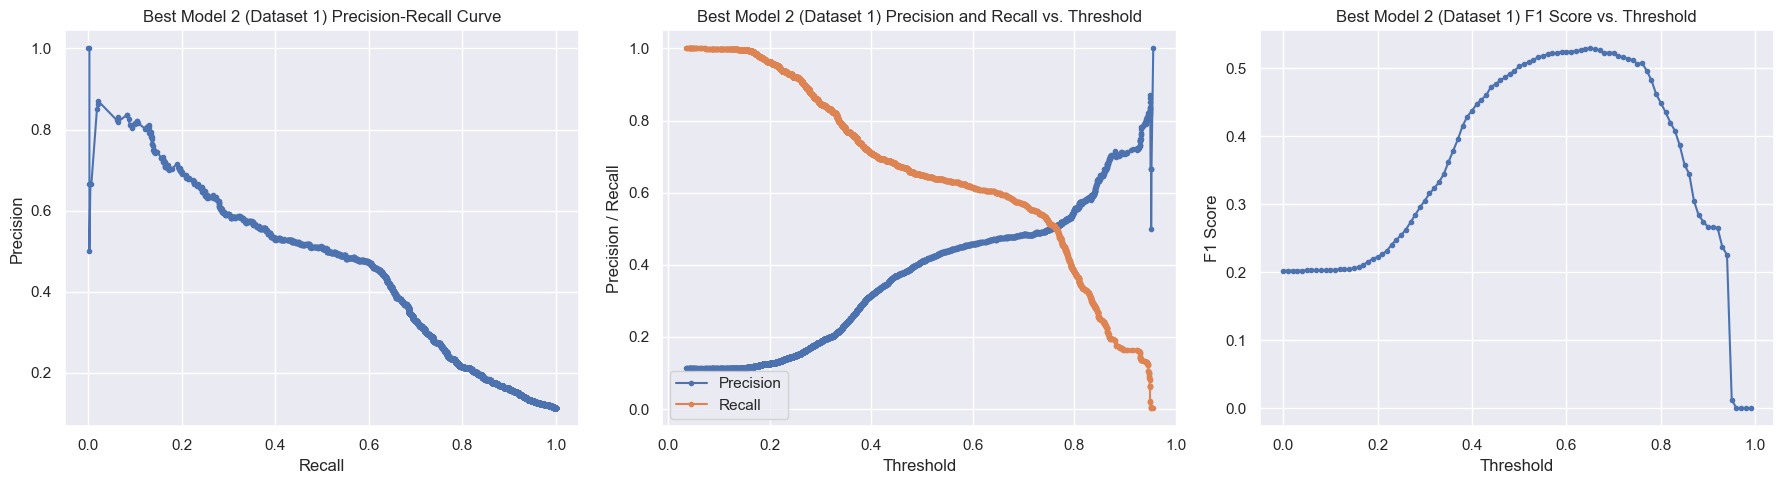

In [130]:
plot_precision_recall_f1(best_model2, x1_train, y1_train, x1_test, y1_test, 'Best Model 2 (Dataset 1)')

##### Feature Importances

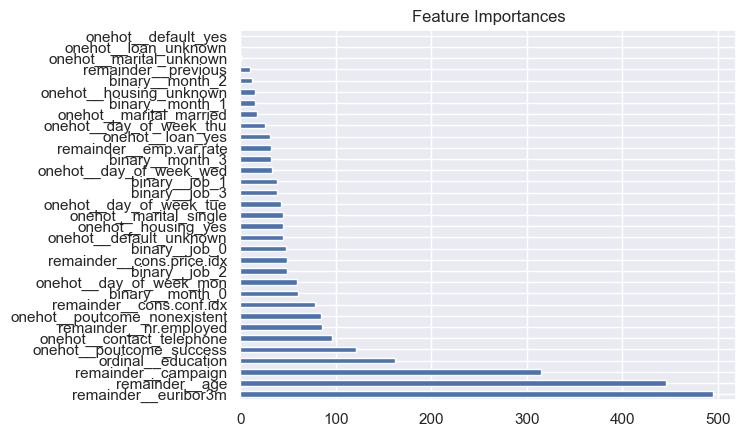

remainder__euribor3m            495
remainder__age                  446
remainder__campaign             315
ordinal__education              162
onehot__poutcome_success        121
onehot__contact_telephone        96
remainder__nr.employed           85
onehot__poutcome_nonexistent     84
remainder__cons.conf.idx         78
binary__month_0                  60
onehot__day_of_week_mon          59
binary__job_2                    49
remainder__cons.price.idx        49
binary__job_0                    48
onehot__default_unknown          45
onehot__housing_yes              45
onehot__marital_single           45
onehot__day_of_week_tue          43
binary__job_3                    38
binary__job_1                    38
onehot__day_of_week_wed          33
binary__month_3                  32
remainder__emp.var.rate          32
onehot__loan_yes                 31
onehot__day_of_week_thu          26
onehot__marital_married          17
binary__month_1                  15
onehot__housing_unknown     

In [131]:
coef1 = pd.Series(best_model2['model'].feature_importances_, transformer1.get_feature_names_out()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()
coef1

**Based on the Feature Importance, we can deduce a few things:**

If we are to take the top 8 features, their score are all above 75 and that would be:
1. `euribor3m`
1. `age`
1. `campaign`
1. `education`
1. `poutcome`
1. `contact`
1. `nr.employed`
1. `cons.conf.idx`


Non-Important Features (<75)
- `day_of_week`
- `job`
- `month`
- `cons.price.idx`
- `default`
- `marital`
- `housing`
- `loan`
- `emp.var.rate`
- `previous`

**During the initial Feature Selection step, we concluded that:**

Multicolinearity (with `cons.price.idx`)
- `emp.var.rate`
- `euribor3m`
- `nr.employed`


Statistically Not Significant:
- `housing`
- `loan`

Note: `duration` and `pdays` have already been initially unincluded

Based on the findings above, we can infer that:
- Those which are found statistically not significant actually proven to be non-important features to the model, which is consistent
- Interestingly, despite selected to be removed, `euribor3m` is both the most important feature in the dataset and among those with multicolinearity.
    - As such, we should consider keeping it instead of `cons.price.idx` which is part of the non-important features

Considering the previous model's Feature Importance and Feature Selection step, we will try to model one more time with the following features selected:
1. `euribor3m`
1. `age`
1. `campaign`
1. `education`
1. `poutcome`
1. `contact`
1. `cons.conf.idx`

The base dataset we will be using is the one without any Missing Value and Outlier Handling (dataset 1)

In [132]:
#new dataset with Feature Selection
df_fs = df[['euribor3m', 'age', 'campaign', 'education', 'poutcome', 'contact', 'cons.conf.idx', 'y']]

In [133]:
listItem = []
for col in df_fs.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0      euribor3m  float64     0      0.0     316   
1            age    int64     0      0.0      78   
2       campaign    int64     0      0.0      42   
3      education   object     0      0.0       8   
4       poutcome   object     0      0.0       3   
5        contact   object     0      0.0       2   
6  cons.conf.idx  float64     0      0.0      26   
7              y    int64     0      0.0       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       uniqueSample  
0  [4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967, 4.961, 4.959, 4.958, 4.96, 4.962, 4.955, 4.947, 4.956, 4.966, 4.963, 4.957, 4.968, 4.97, 4.965, 4.964, 5.045, 5.0, 4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76, 4.733, 4.7, 4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191, 4.153, 4.12, 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743, 3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799, 1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65, 1.64, 1.629, 1.614, 1.602, 1.584, 1.574, 1.56, 1.556, 1.548, 1.538, 1.531, 1.52, 1.51, 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435, 1.423, 1.415, 1.41, 1.405, 1.406, 1.4, 1.392, 1.384, 1.372, 1.365, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                          [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]  
4                                                                

In [134]:
#new Transformer
ordinal_mapping = [
    {'col': 'education',
     'mapping': {None: 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y':4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}}]

transformer_fs = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['poutcome','contact']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['education']),
    ('robust scaler', RobustScaler(), ['age', 'campaign', 'cons.conf.idx', 'euribor3m'])
    
], remainder='passthrough')

#### **Modelling - With Feature Selection**

####  1. Data Splitting

In [135]:
x5 = df_fs.drop(columns=['y'])  #all variables except 'y' will be used
y5 = df_fs['y']

x5_train, x5_test, y5_train, y5_test = train_test_split(
    x5,
    y5,
    test_size= 0.2,
    random_state= seed,
    stratify= y5
)

Transformer Test

In [136]:
transformer_test5 = pd.DataFrame(transformer_fs.fit_transform(x5_train),columns=transformer_fs.get_feature_names_out())

In [137]:
check_data(transformer_test5)

dataFeatures dataType  null  nullPct  unique  \
0  onehot__poutcome_nonexistent  float64     0      0.0       2   
1      onehot__poutcome_success  float64     0      0.0       2   
2     onehot__contact_telephone  float64     0      0.0       2   
3            ordinal__education  float64     0      0.0       8   
4            robust scaler__age  float64     0      0.0      77   
5       robust scaler__campaign  float64     0      0.0      41   
6  robust scaler__cons.conf.idx  float64     0      0.0      26   
7      robust scaler__euribor3m  float64     0      0.0     312   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      uniqueSample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

There are 8 features after transforming

#### 2. Model Benchmarking

In [138]:
#Insert all estimators that we can use for classification model
logreg = LogisticRegression(random_state=seed)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed, verbosity=0)
lgbm = lgb.LGBMClassifier(random_state=seed, verbose=-1)

**Model Benchmarking: Stratified K-Fold**

In [139]:
models = [logreg,knn,dt,rf,xgb,lgbm]
dataset = [
    [x1_train, y1_train, transformer1, 'Dataset 1 - No Feature Selection'],
    [x5_train, y5_train, transformer_fs, 'Dataset 5 - With Feature Selection']]

count = 0
for x_train, y_train, transformer, name in dataset:
    score=[]
    mean=[]
    mean_r = []
    std=[]
    
    for i in models:
        skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train, y_train,cv=skfold,scoring='f1')
        score.append(model_cv)
        mean.append(model_cv.mean())
        model_cv=cross_val_score(estimator,x_train, y_train,cv=skfold,scoring='recall')
        mean_r.append(model_cv.mean())
        std.append(model_cv.std()) 
    print(name)    
    display(pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1':mean,'mean recall':mean_r,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False))

Dataset 1 - No Feature Selection


mean f1  mean recall      sdev
model                                               
XGBoost              0.376606     0.277283  0.009082
Random Forest        0.372384     0.281868  0.007808
LightGBM             0.369438     0.261924  0.007822
KNN                  0.336267     0.258150  0.004324
Decision Tree        0.319798     0.340077  0.015541
Logistic Regression  0.265464     0.173005  0.020224

Dataset 5 - With Feature Selection


mean f1  mean recall      sdev
model                                               
XGBoost              0.380748     0.278364  0.014178
Random Forest        0.366327     0.299918  0.015998
LightGBM             0.357347     0.249530  0.009993
KNN                  0.356506     0.265699  0.007081
Decision Tree        0.333469     0.315555  0.020869
Logistic Regression  0.294798     0.188897  0.005259

Interestingly, the Feature-selected Dataset 5 have better XGBoost, KNN, Decision Tree and Logistic Regression Performance compared to the dataset without feature selection, while having overall worse performance for Random Forest and LightGBM during the Cross-Validation step with the default threshold (0.5)

**Model Benchmarking: Test Data**

In [140]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer_fs),
        ('model',i)])
    
    estimator.fit(x5_train,y5_train)
    return(estimator,estimator.predict(x5_test))

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred = y_pred_func(i)
    score_f1.append(f1_score(y5_test,y_pred))
    print(j,'\n', classification_report(y5_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7308
           1       0.66      0.18      0.29       928

    accuracy                           0.90      8236
   macro avg       0.78      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236



KNN 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.56      0.27      0.36       928

    accuracy                           0.89      8236
   macro avg       0.74      0.62      0.65      8236
weighted avg       0.87      0.89      0.88      8236

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      7308
           1       0.37      0.33      0.35       928

    accuracy                           0.86      8236
   macro avg       0.64      0.63      0.64      8236
weighted avg       0.85      0.86      0.86      8236

Random Forest 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7308
           1       0.48      0.31      0.38       928

    accuracy                           0.88      8236
   macro avg       0.70      0.64      0.66      8236
weighted avg       0.87      0.88   

f1 score
model                        
Random Forest        0.379714
XGBoost              0.363636
KNN                  0.360704
Decision Tree        0.349801
LightGBM             0.348438
Logistic Regression  0.286436

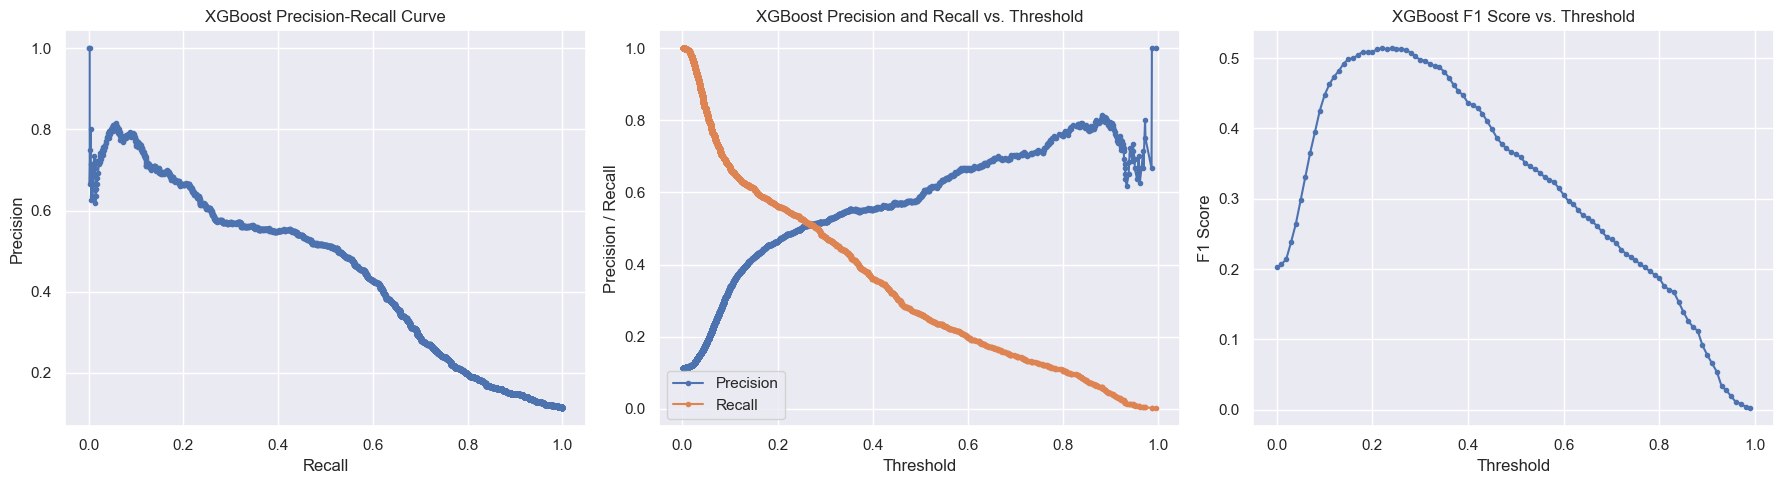

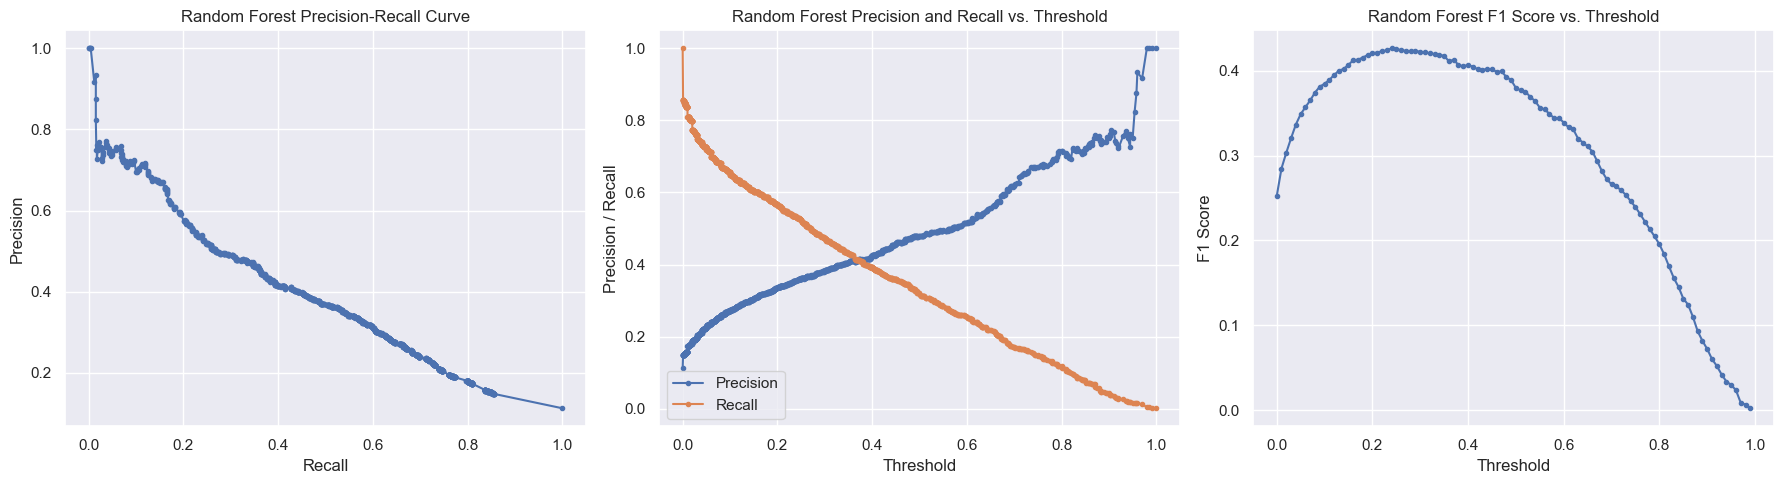

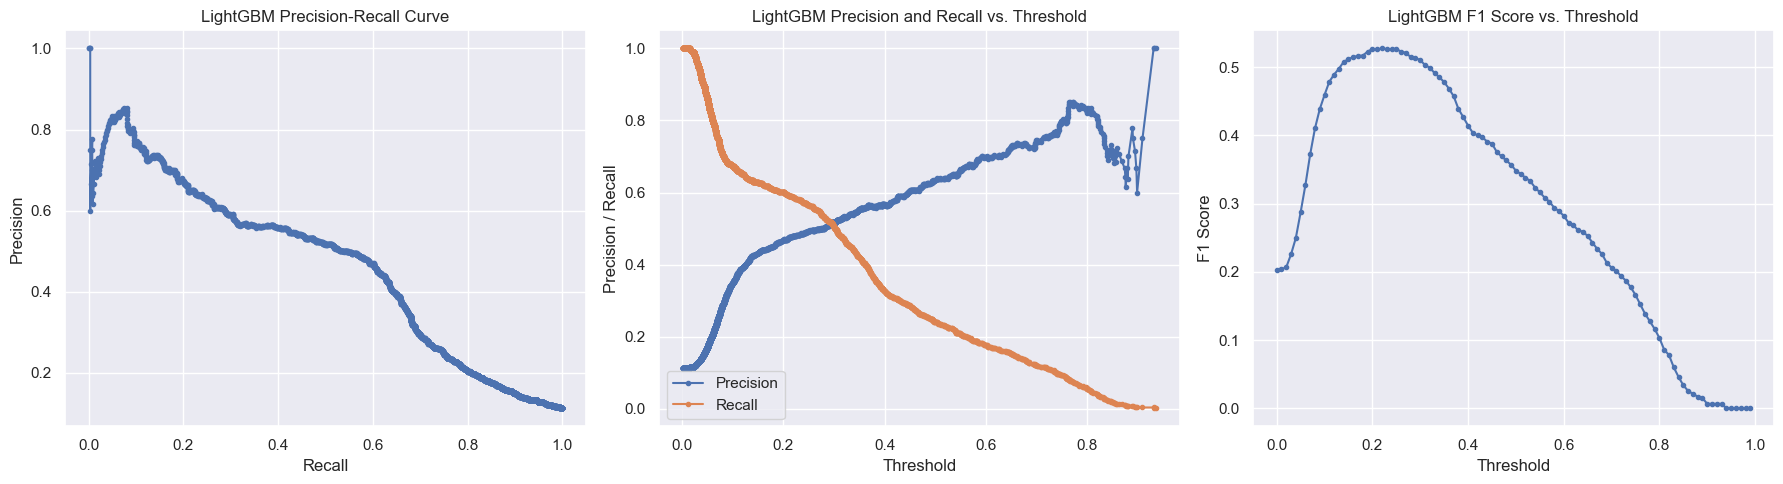

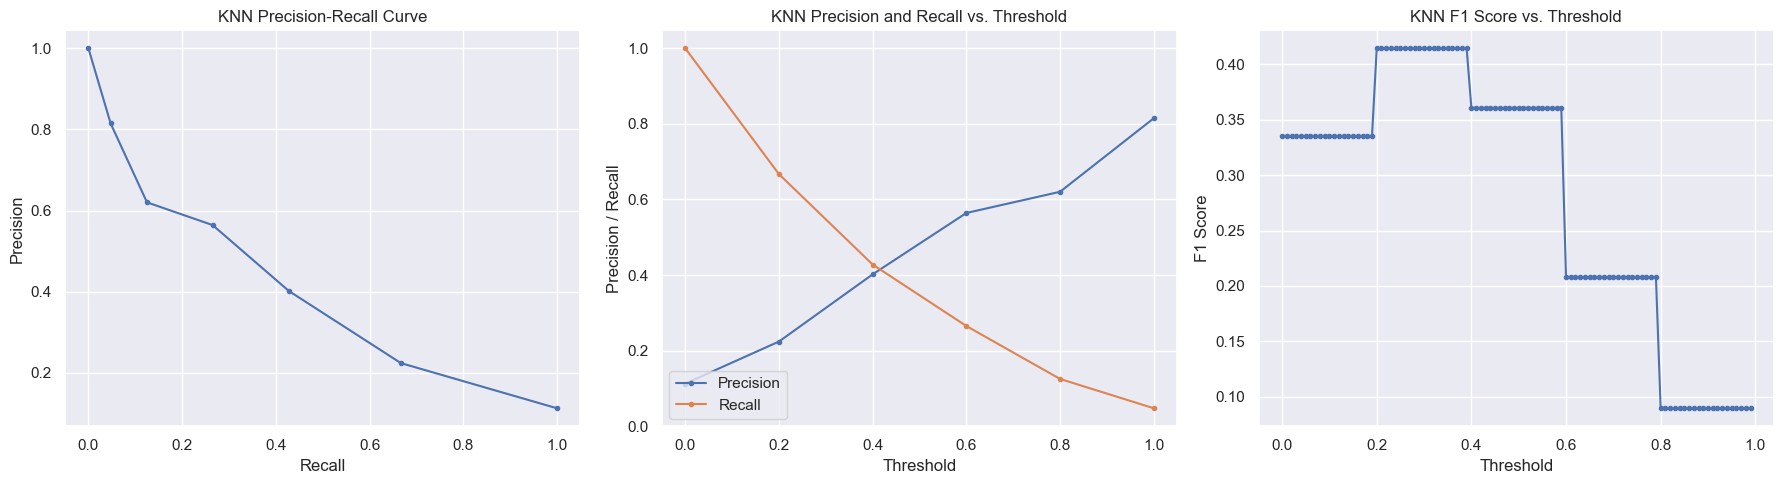

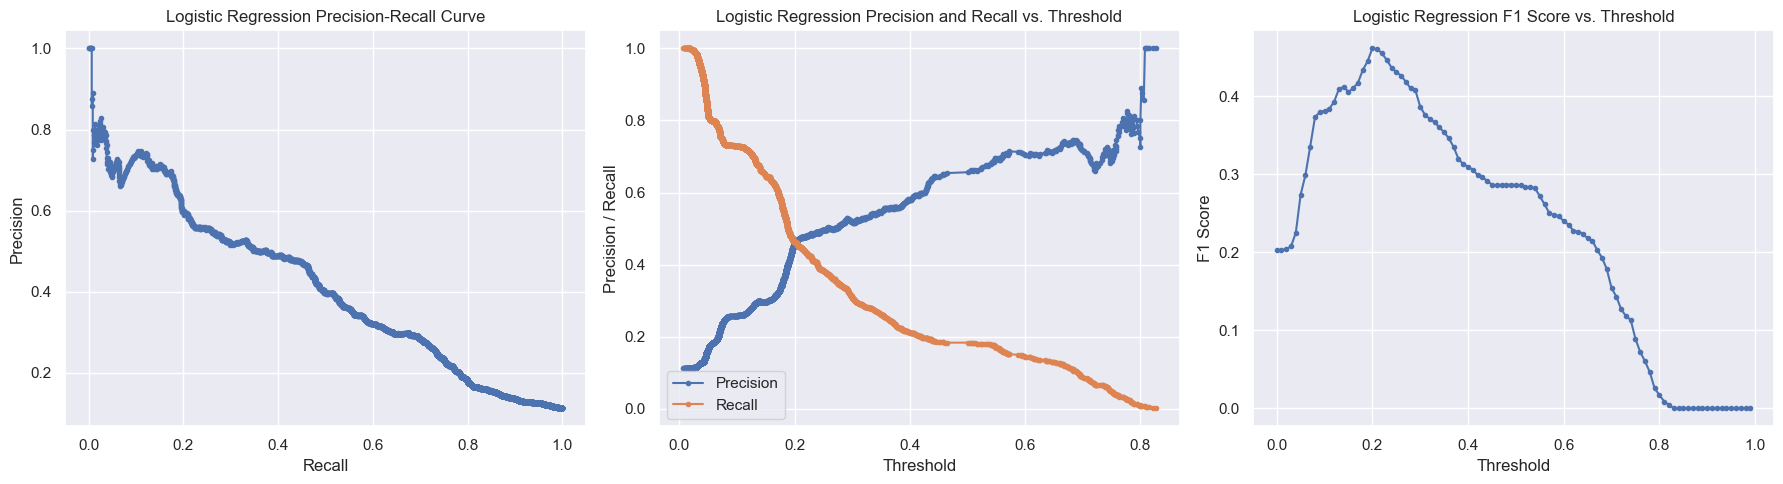

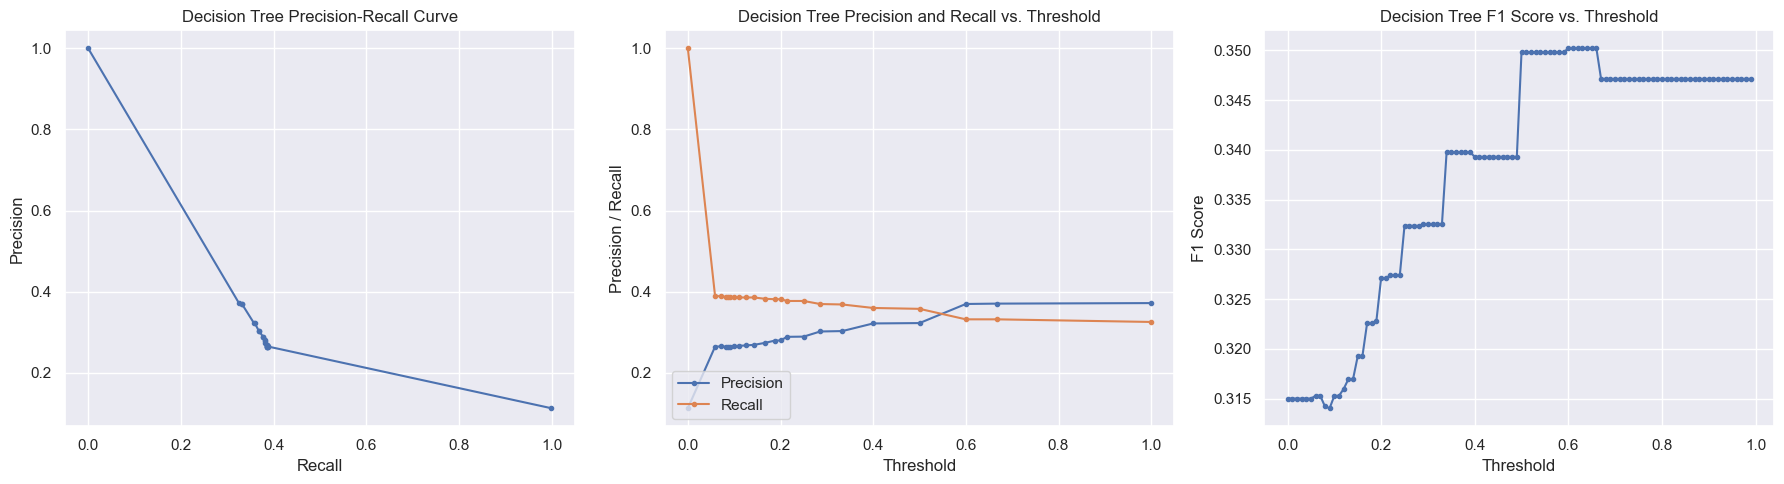

In [141]:
models = [
    (xgb, 'XGBoost'),
    (rf, 'Random Forest'),
    (lgbm, 'LightGBM'),
    (knn, 'KNN'),
    (logreg, 'Logistic Regression'),
    (dt, 'Decision Tree')
]

for model, model_name in models:
    estimator = Pipeline([
        ('preprocess', transformer_fs),
        ('model', model)
    ])
    plot_precision_recall_f1(estimator, x5_train, y5_train, x5_test, y5_test, model_name)


Against the test dataset, we can infer the following things:
- At default threshold, the Random Forest model is performing the best, and with LightGBM at the 2nd lowest before Logistic Regression.
- Based on the plot, we can see that Random Forest (and other models) cannot reach higher F1 score than around 0.43, on the contrary with LightGBM and XGBoost which has the potential to reach f1 score above 0.5 when we set the threshold to around 0.2

As such, it is clear that the only viable models we can proceed with are the LightGBM and the XGBoost, which we will try to do data rebalancing to see how they react to it

#### 3. Data Balancing

In [142]:
rus = RandomUnderSampler(random_state= 42)
ros = RandomOverSampler(random_state= 42)
smote = SMOTE()

In [143]:
ordinal_mapping = [
    {'col': 'education',
     'mapping': {None: 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y':4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}}]

transformer_fs = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['poutcome','contact']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['education'])
    
], remainder='passthrough')

XGBoost

In [144]:
rs = [rus, ros, smote]
score=[]
mean=[]
std=[]

for i in rs:
    skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    estimator=Pipeline([
        ('preprocess',transformer_fs),
        ('balance', i), #resampling
        ('model', xgb)])  #classifier
    model_cv=cross_val_score(estimator,x5_train,y5_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

#unbalanced
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
estimator=Pipeline([
    ('preprocess',transformer_fs),
    ('model', xgb)])  #classifier
model_cv=cross_val_score(estimator,x5_train,y5_train,cv=skfold,scoring='f1')
score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())
rs.append('No Balancing')

pd.DataFrame({'Resampling':rs,'mean f1':mean,'sdev':std}).set_index('Resampling').sort_values(by='mean f1',ascending=False)

mean f1      sdev
Resampling                                             
RandomOverSampler(random_state=42)   0.439164  0.006900
SMOTE()                              0.418867  0.007475
RandomUnderSampler(random_state=42)  0.413876  0.005069
No Balancing                         0.377027  0.014429

LightGBM

In [145]:
rs = [rus, ros, smote]
score=[]
mean=[]
std=[]

for i in rs:
    skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    estimator=Pipeline([
        ('preprocess',transformer_fs),
        ('balance', i), #resampling
        ('model', lgbm)])  #classifier
    model_cv=cross_val_score(estimator,x5_train,y5_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

#unbalanced
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
estimator=Pipeline([
    ('preprocess',transformer_fs),
    ('model', lgbm)])  #classifier
model_cv=cross_val_score(estimator,x5_train,y5_train,cv=skfold,scoring='f1')
score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())
rs.append('No Balancing')

pd.DataFrame({'Resampling':rs,'mean f1':mean,'sdev':std}).set_index('Resampling').sort_values(by='mean f1',ascending=False)

mean f1      sdev
Resampling                                             
RandomOverSampler(random_state=42)   0.468922  0.010455
SMOTE()                              0.450924  0.011037
RandomUnderSampler(random_state=42)  0.443135  0.008384
No Balancing                         0.363760  0.010339

Based on the Cross-Validation f1 score, it is clear that the LightGBM is the most optimal model after receiving data rebalancing.

Even so, now that we can compare apple-to-apple with the previous best model (with dataset 1), this model fail to outperform the model with the dataset 1, even after receiving the exact same treatment.

While theoretically this model should run much faster compared to the previous model (considering the significant reduction in feature count), we do not need performance speed as a factor in this model since realistically we are going to predict datasets in batches and not in real-time (based on the business problem needs).

As such, we will not continue modelling with this dataset and conclude to use the best model from using dataset 1 (with no Missing Value and Outlier handling & no Feature Selection)

##### **Treshold Selection**

In [146]:
final_model = best_model2
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=255,
                                min_data_in_leaf=25, num_iterations=75,
                                num_leaves=36, random_state=42, verbose=-1))])

In [147]:
y_pred_final = final_model.predict(x1_test)
y_pred_proba_final = final_model.predict_proba(x1_test)

roc_auc_final = roc_auc_score(y1_test, y_pred_proba_final[:,1])
report_final = classification_report(y1_test, y_pred_final)

print('ROC AUC Score Final Model:', roc_auc_final)
print('Classification Report Final Model: \n', report_final)

ROC AUC Score Final Model: 0.8152496290083612
Classification Report Final Model: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7308
           1       0.41      0.65      0.50       928

    accuracy                           0.86      8236
   macro avg       0.68      0.77      0.71      8236
weighted avg       0.89      0.86      0.87      8236



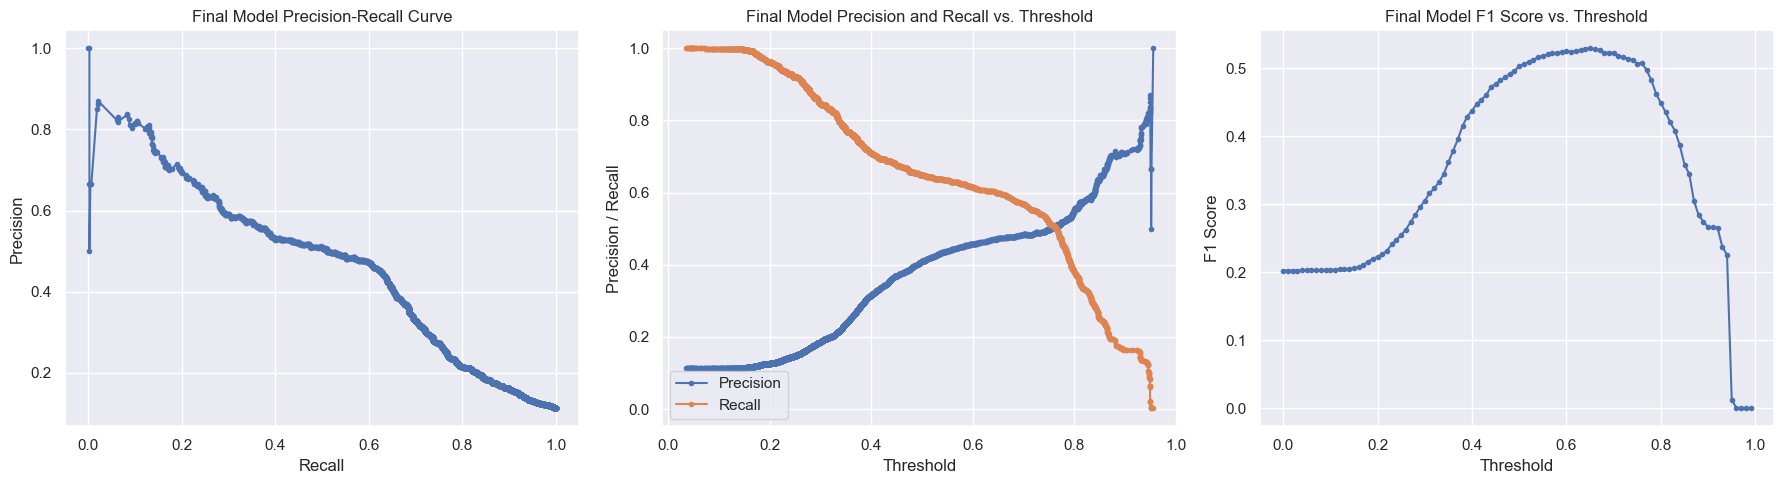

In [148]:
plot_precision_recall_f1(final_model, x1_train, y1_train, x1_test, y1_test, 'Final Model')

- The best balance betwee the recall and precision appears to be at the intersection of the two lines, which is at around 0.75 threshold with the recall and precision of around 0.50
- There is a potential to change the threshold to increase the f1 score (by extension, the precision) on the expense of slightly reducing the recall
    - While our business problem demands us to focus on the recall, maintaining a good amount of precision (at least 0.40) is a necessity for a predictive model to be useful.
    - On the other end, if the stakeholders believe that it is okay for the model to have poor precision and would like to focus on recall score (at least 0.80), then we can lower the threshold

As such, we should consider to push the threshold to 0.6 or 0.33 instead (only slightly away from the peak f1 score) to try to maximize the f1 score while maintaining higher recall and safe amount of precision

In [149]:
y_pred_proba_final = final_model.predict_proba(x1_test)
y_pred_final = np.where(y_pred_proba_final[:,1] >= 0.6, 1, 0)

roc_auc_final = roc_auc_score(y1_test, y_pred_proba_final[:,1])
report_final = classification_report(y1_test, y_pred_final)

print('ROC AUC Score Final Model (Threshold: 0.6):', roc_auc_final)
print('Classification Report Final Model (Threshold: 0.6): \n', report_final)

ROC AUC Score Final Model (Threshold: 0.6): 0.8152496290083612
Classification Report Final Model (Threshold: 0.6): 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7308
           1       0.46      0.61      0.52       928

    accuracy                           0.87      8236
   macro avg       0.70      0.76      0.73      8236
weighted avg       0.89      0.87      0.88      8236



In [150]:
y_pred_proba_final = final_model.predict_proba(x1_test)
y_pred_final = np.where(y_pred_proba_final[:,1] >= 0.33, 1, 0)

roc_auc_final = roc_auc_score(y1_test, y_pred_proba_final[:,1])
report_final = classification_report(y1_test, y_pred_final)

print('ROC AUC Score Final Model (Threshold: 0.33):', roc_auc_final)
print('Classification Report Final Model (Threshold: 0.33): \n', report_final)

ROC AUC Score Final Model (Threshold: 0.33): 0.8152496290083612
Classification Report Final Model (Threshold: 0.33): 
               precision    recall  f1-score   support

           0       0.96      0.61      0.74      7308
           1       0.21      0.82      0.33       928

    accuracy                           0.63      8236
   macro avg       0.59      0.71      0.54      8236
weighted avg       0.88      0.63      0.70      8236



After setting the Threshold to 0.6, there is an increase in f1 score by 0.02 and precision by 0.05, with recall drop by 0.04.
- While this decrease in recall performance is unfavorable, an increase of precision by 0.01 higher that the amount of score drop in recall is still favourable as it also increases the reliability of our model, at a minor sacrifice. As such, we can recommend to set the threshold as 0.6 for this model.

On the other hand, setting the threshold to 0.33 will cause the recall to increase to 0.81, but decreases the precision to 0.21
- This might be more favorable if the stakeholders would prefer to have a model that can at least somewhat help on reduce type 1 errors (False Positive) while preventing type 2 errors (False Negative)

We will leave this to the stakeholders to decide which threshold is more favourable for them to proceed with, as it may require better business expertise to uncover a different point of view

#### Data Analysis

We will only be discussing the most important features that influence clients in subscribing to a term deposit based on the feature importance of the final model 

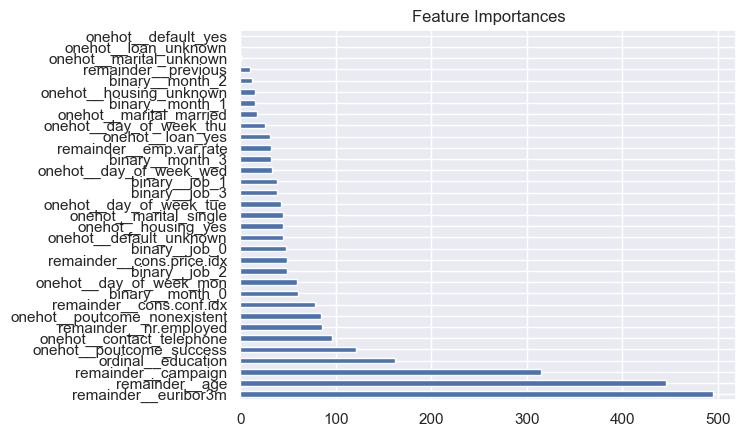

In [151]:
coef1 = pd.Series(best_model2['model'].feature_importances_, transformer1.get_feature_names_out()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

**Based on the Feature Importance, we can deduce a few things:**

The top 8 most important features would be:
1. `euribor3m`
1. `age`
1. `campaign`
1. `education`
1. `poutcome`
1. `contact`
1. `nr.employed`
1. `cons.conf.idx`

- Considering the correlation that is shared between euribor3m and nr.employed, we will not be analyzing nr.employed
- In addition, since the best model is done based on the dataset with no outlier and missing value handling, we will conduct the analysis based on that dataset and not on the fully cleaned data

##### 1. `euribor3m`

Distribution of euribor3m:



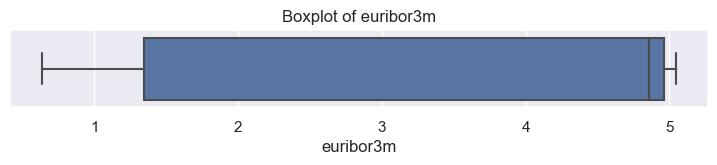

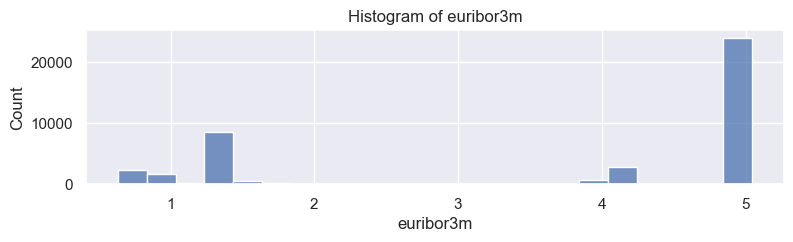

The mode of euribor3m is 4.857.
4.857    2868
4.962    2611
4.963    2487
Name: euribor3m, dtype: int64
The mean of euribor3m is 3.621293447639401.
The median of euribor3m is 4.857.
--------------------------------------------------------------------------------------------------- 



In [152]:
for col in ['euribor3m']:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    else:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.countplot(data=df, x=df[col])
        plt.title(f'Barplot of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

1. euribor3m


y             0    1  Total  Population_Proportion  Yes_Rate  Yes_PProportion
euribor3m                                                                    
4.962      2467  144   2611                   6.34       6.0             3.10
1.365       167  136    303                   0.74      45.0             2.93
1.405      1034  135   1169                   2.84      12.0             2.91
4.963      2361  126   2487                   6.04       5.0             2.72
1.266       716  104    820                   1.99      13.0             2.24
...         ...  ...    ...                    ...       ...              ...
0.888         5    0      5                   0.01       0.0             0.00
0.890         8    0      8                   0.02       0.0             0.00
3.853         1    0      1                   0.00       0.0             0.00
0.894         3    0      3                   0.01       0.0             0.00
1.047         1    0      1                   0.00       0.0             0.00

[316 rows x 6 columns]

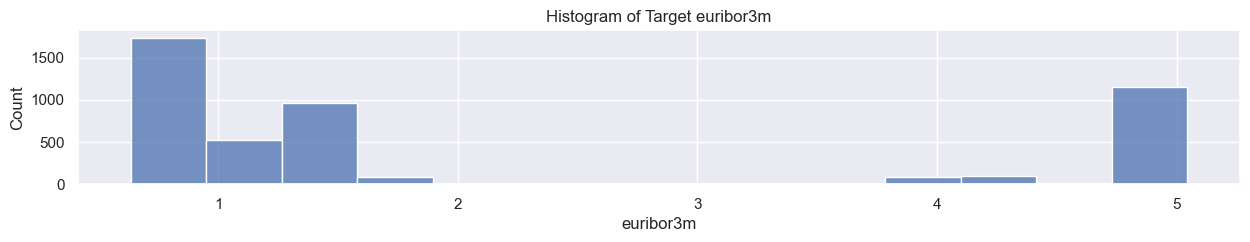

The mode of euribor3m is 4.962.
4.962    144
1.365    136
1.405    135
Name: euribor3m, dtype: int64


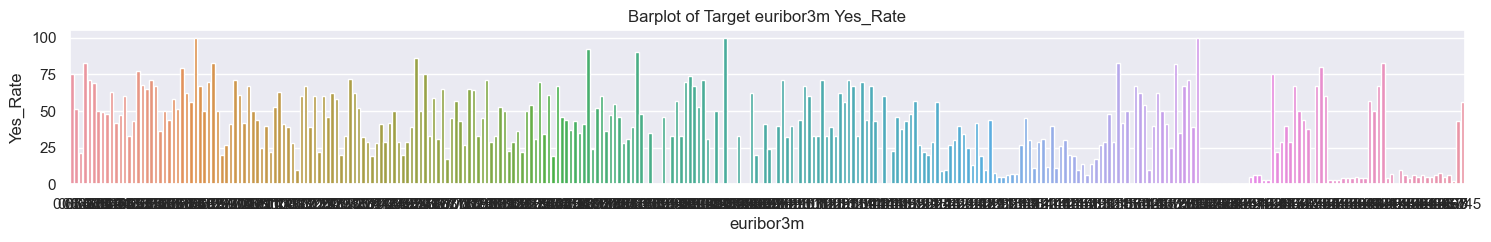

The mean of euribor3m is 2.1233617158870444.
The median of euribor3m is 1.266.

Hypothesis: euribor3m is independent from Target variable
The sample data is not normally distributed. Using Mann-Whitney Test
p-value: 0.0.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type   Mode      Mean Median P-value    Stat Test
euribor3m  Continuous  4.962  2.123362  1.266     0.0  Significant

In [153]:
auto_eda(df, ['euribor3m'], 'y', 1)

Let's try to bin them on intervals of 2 to create 3 groups

In [154]:
df_euribor3m = df[['euribor3m', 'y']]

In [155]:
df['euribor3m'].max()

5.045

In [156]:
bin_edges = np.arange(0, 6, 2)
bin_eur = (np.digitize(df_euribor3m['euribor3m'], bin_edges)-1)
print(bin_eur.max())

2


In [157]:
df_euribor3m['euribor3m_binned'] = bin_eur
discrete_features.append('euribor3m_binned')

Distribution of euribor3m_binned:



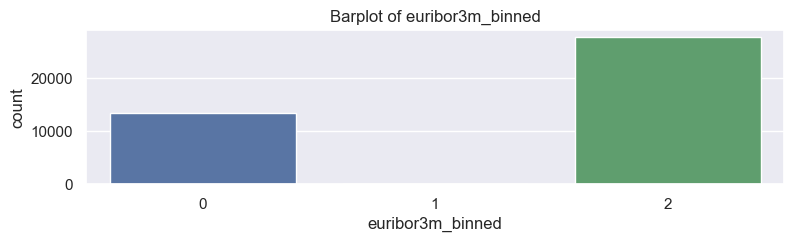

The mode of euribor3m_binned is 2.
2    27668
0    13494
1       14
Name: euribor3m_binned, dtype: int64
The mean of euribor3m_binned is 1.344229648338838.
The median of euribor3m_binned is 2.0.
--------------------------------------------------------------------------------------------------- 



In [158]:
for col in ['euribor3m_binned']:
    print(f'Distribution of {col}:\n')
    plt.figure(figsize=(9,2))
    sns.countplot(data=df_euribor3m, x=df_euribor3m[col])
    plt.title(f'Barplot of {col}')
    plt.show()
    print(f'The mode of {col} is {df_euribor3m[col].mode()[0]}.')
    print(df_euribor3m[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df_euribor3m[col].mean()}.')
    print(f'The median of {col} is {df_euribor3m[col].median()}.')
    print('-'*99, '\n')

1. euribor3m_binned


y                     0     1  Total  Population_Proportion  Yes_Rate  \
euribor3m_binned                                                        
0                 10194  3300  13494                  32.77      24.0   
2                 26330  1338  27668                  67.19       5.0   
1                    13     1     14                   0.03       7.0   

y                 Yes_PProportion  
euribor3m_binned                   
0                           71.14  
2                           28.84  
1                            0.02

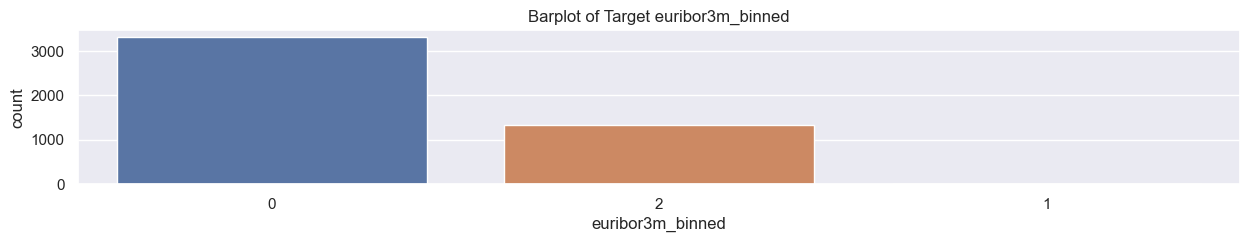

The mode of euribor3m_binned is 0.
0    3300
2    1338
1       1
Name: euribor3m_binned, dtype: int64


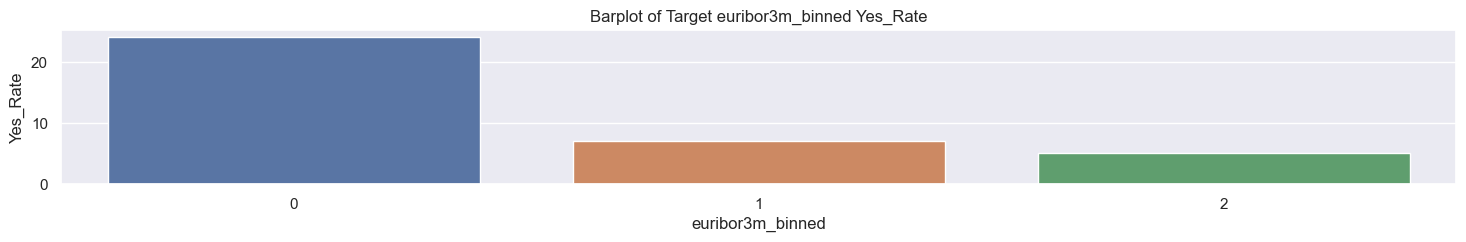


Hypothesis: euribor3m_binned is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 0.0.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type Mode Mean Median P-value    Stat Test
euribor3m_binned  Discrete    0    -      -     0.0  Significant

In [159]:
auto_eda(df_euribor3m, ['euribor3m_binned'], 'y', 1)

In summary, we can infer that:
- We can divide euribor3m rates into 3 major groups:
    - 0: low rate (0-2%)
    - 1: mid rate (2-4%)
    - 2: high rate (4-6%)
- Most clients are approached by the telemarketing campaign during high euribor3m rate of around 5% (high rate), which makes up 67% of the calls
- Interestingly, the majority of clients that subscribed to term deposit is actually during low rate (71%)
    - this implies that despite the telemarketing call operates much more actively during high rate euribor 3 months, there are twice of clients who subscribe during low rate compared to high rate, hence a **good sign of very poorly-targeted telemarketing effort**
    - It is also very important to note that **there are barely any calls during the mid rate**
- The Yes Rate (the acceptance rate for subscription) also shows that `customers who are approached during low euribor3m rate (24%) is almost 5 times more likely to subscribe than those at high rate (5%)`
- This correlation is also proven with the statistical test conducted which prove significance


Recommendation:
- Instead of focusing calls during high rate (euribor3m > 4%), maximize all calls during low rates (<2%)
- Do more calls during mid rates (2-4%) to gain more data

##### 2. `age`

Distribution of age:



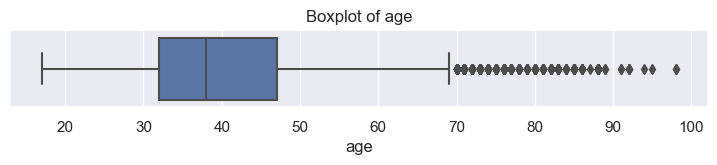

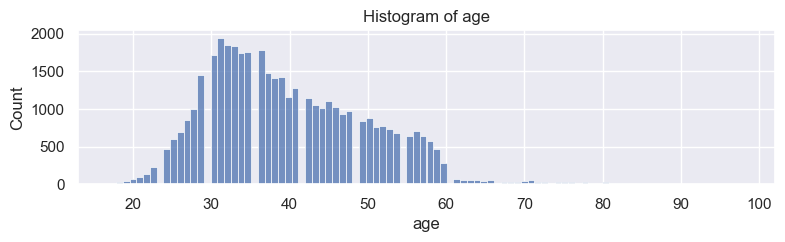

The mode of age is 31.
31    1947
32    1845
33    1833
Name: age, dtype: int64
The mean of age is 40.02380027200311.
The median of age is 38.0.
--------------------------------------------------------------------------------------------------- 



In [160]:
for col in ['age']:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

1. age


y       0    1  Total  Population_Proportion  Yes_Rate  Yes_PProportion
age                                                                    
31   1727  220   1947                   4.73      11.0             4.74
33   1623  210   1833                   4.45      11.0             4.53
30   1512  202   1714                   4.16      12.0             4.35
29   1267  186   1453                   3.53      13.0             4.01
32   1661  184   1845                   4.48      10.0             3.97
..    ...  ...    ...                    ...       ...              ...
98      0    2      2                   0.00     100.0             0.04
87      0    1      1                   0.00     100.0             0.02
91      2    0      2                   0.00       0.0             0.00
94      1    0      1                   0.00       0.0             0.00
95      1    0      1                   0.00       0.0             0.00

[78 rows x 6 columns]

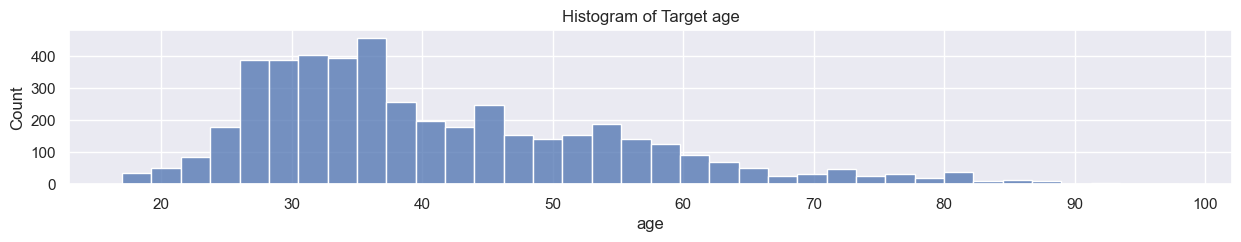

The mode of age is 31.
31    220
33    210
30    202
Name: age, dtype: int64


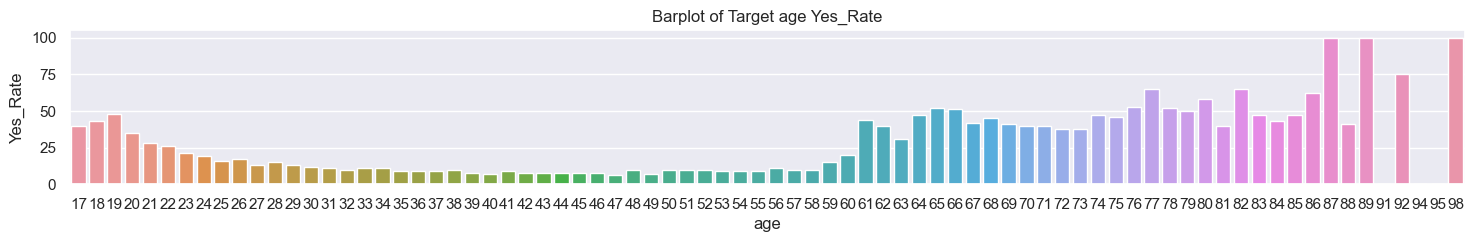

The mean of age is 40.91226557447726.
The median of age is 37.0.

Hypothesis: age is independent from Target variable
The sample data is not normally distributed. Using Mann-Whitney Test
p-value: 0.01563777740572028.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type Mode       Mean Median   P-value    Stat Test
age  Continuous   31  40.912266   37.0  0.015638  Significant

In [161]:
auto_eda(df, ['age'], 'y', 1)

Bin age 20 years interval

In [162]:
df_age = df[['age', 'y']]

bin_edges = np.arange(0, 101, 20)
bin_age = (np.digitize(df_age['age'], bin_edges)-1)*20
df_age['age_binned'] = bin_age
discrete_features.append('age_binned')

Distribution of age_binned:



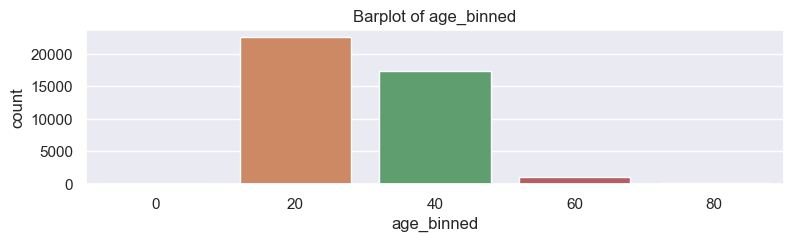

The mode of age_binned is 20.
20    22525
40    17384
60     1042
Name: age_binned, dtype: int64
The mean of age_binned is 29.63813872158539.
The median of age_binned is 20.0.
--------------------------------------------------------------------------------------------------- 



In [163]:
for col in ['age_binned']:
    print(f'Distribution of {col}:\n')
    plt.figure(figsize=(9,2))
    sns.countplot(data=df_age, x=df_age[col])
    plt.title(f'Barplot of {col}')
    plt.show()
    print(f'The mode of {col} is {df_age[col].mode()[0]}.')
    print(df_age[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df_age[col].mean()}.')
    print(f'The median of {col} is {df_age[col].median()}.')
    print('-'*99, '\n')

1. age_binned


y               0     1  Total  Population_Proportion  Yes_Rate  \
age_binned                                                        
20          19922  2603  22525                  54.70      12.0   
40          15854  1530  17384                  42.22       9.0   
60            647   395   1042                   2.53      38.0   
80             73    77    150                   0.36      51.0   
0              41    34     75                   0.18      45.0   

y           Yes_PProportion  
age_binned                   
20                    56.11  
40                    32.98  
60                     8.51  
80                     1.66  
0                      0.73

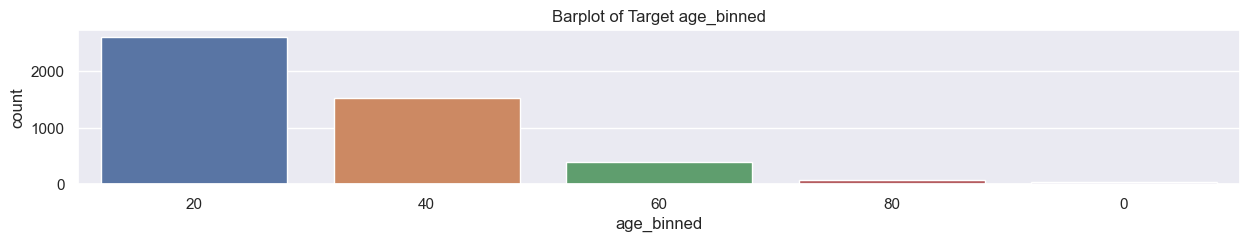

The mode of age_binned is 20.
20    2603
40    1530
60     395
Name: age_binned, dtype: int64


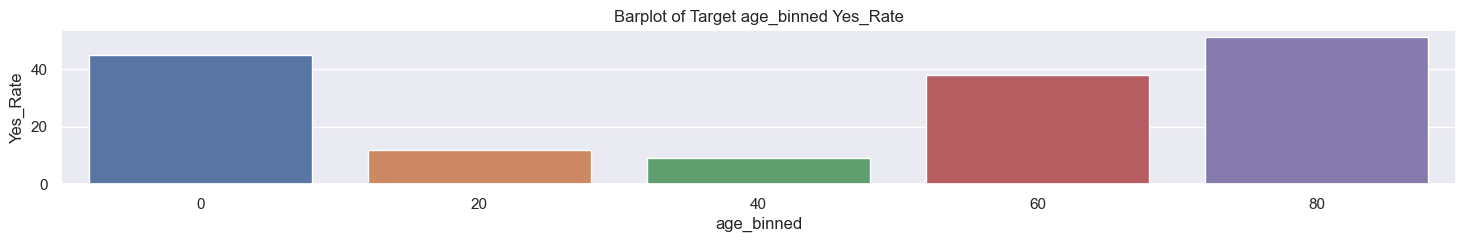


Hypothesis: age_binned is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 3.577121309840775e-253.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type Mode Mean Median P-value    Stat Test
age_binned  Discrete   20    -      -     0.0  Significant

In [164]:
auto_eda(df_age, ['age_binned'], 'y', 1)

In summary, we can infer that:
- The telemarketing campaign calls clients from all age demographic (from the young to old) with the median age of 38 years old, and 54.7% from 20-40 years old (the rest are older)
    - this might be reflecting on the demographic of clients the bank have
- The distribution of client's age which agrees to subscribe to a term deposit is reflecting the distribution of the total calls made by the campaign, with majority from 20-40 years old at 56%, and 40-60 yo at 33%
- What is interesting is that despite making up only 3% of the calls (1192 calls), age 60 years and above have the highest Yes Rate with 38% rate at 60-80 years and 51% at >80 years.
- The same casae is also true for age below 20 (only 0.18% proportion or 75 calls) with 45% of yes_rate
    - This might seem to imply that there is potential for age >60 and <20 to yield high customer base and must be further checked in the future.
- While only having 12% yes rate, age 20-40 is still 1.3 times more likely to subscribe than age 40-60

Recommendations:
- focus more at marketing to 20-40 year olds, but still maintain 40-60
- get more calls to those below 20 years and above 60 year old to get more data

3. campaign

Distribution of campaign:



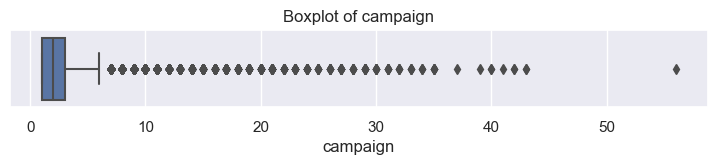

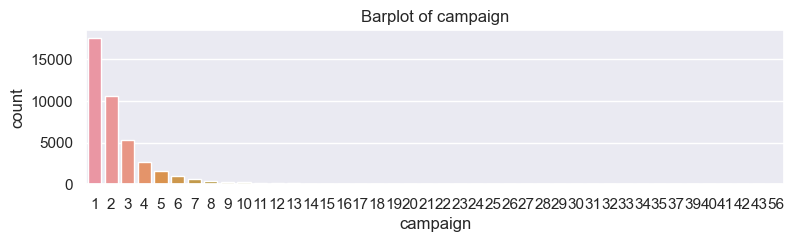

The mode of campaign is 1.
1    17634
2    10568
3     5340
Name: campaign, dtype: int64
The mean of campaign is 2.567879347192539.
The median of campaign is 2.0.
--------------------------------------------------------------------------------------------------- 



In [165]:
for col in ['campaign']:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    else:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.countplot(data=df, x=df[col])
        plt.title(f'Barplot of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

1. campaign


y             0     1  Total  Population_Proportion  Yes_Rate  Yes_PProportion
campaign                                                                      
1         15335  2299  17634                  42.83      13.0            49.56
2          9357  1211  10568                  25.67      11.0            26.10
3          4766   574   5340                  12.97      11.0            12.37
4          2401   249   2650                   6.44       9.0             5.37
5          1479   120   1599                   3.88       8.0             2.59
6           904    75    979                   2.38       8.0             1.62
7           591    38    629                   1.53       6.0             0.82
8           383    17    400                   0.97       4.0             0.37
9           266    17    283                   0.69       6.0             0.37
10          213    12    225                   0.55       5.0             0.26
11          165    12    177                   0.43       7.0             0.26
17           54     4     58                   0.14       7.0             0.09
13           88     4     92                   0.22       4.0             0.09
12          122     3    125                   0.30       2.0             0.06
15           49     2     51                   0.12       4.0             0.04
14           68     1     69                   0.17       1.0             0.02
23           15     1     16                   0.04       6.0             0.02
43            2     0      2                   0.00       0.0             0.00
30            7     0      7                   0.02       0.0             0.00
42            2     0      2                   0.00       0.0             0.00
41            1     0      1                   0.00       0.0             0.00
40            2     0      2                   0.00       0.0             0.00
39            1     0      1                   0.00       0.0             0.00
37            1     0      1                   0.00       0.0             0.00
35            5     0      5                   0.01       0.0             0.00
34            3     0      3                   0.01       0.0             0.00
33            4     0      4                   0.01       0.0             0.00
32            4     0      4                   0.01       0.0             0.00
31            7     0      7                   0.02       0.0             0.00
22           17     0     17                   0.04       0.0             0.00
29           10     0     10                   0.02       0.0             0.00
28            8     0      8                   0.02       0.0             0.00
27           11     0     11                   0.03       0.0             0.00
26            8     0      8                   0.02       0.0             0.00
25            8     0      8                   0.02       0.0             0.00
24           15     0     15                   0.04       0.0             0.00
21           24     0     24                   0.06       0.0             0.00
20           30     0     30                   0.07       0.0             0.00
19           26     0     26                   0.06       0.0             0.00
18           33     0     33                   0.08       0.0             0.00
16           51     0     51                   0.12       0.0             0.00
56            1     0      1                   0.00       0.0             0.00

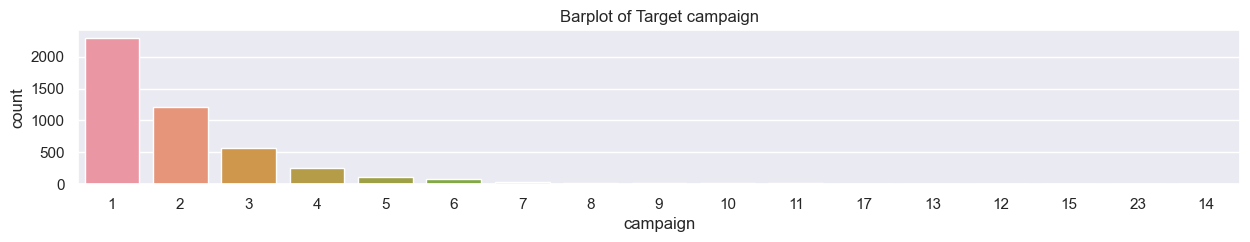

The mode of campaign is 1.
1    2299
2    1211
3     574
Name: campaign, dtype: int64


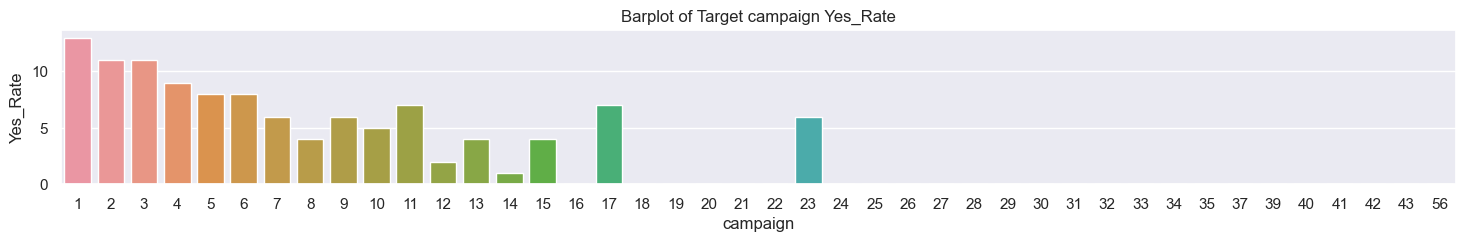


Hypothesis: campaign is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 3.988243481132784e-26.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type Mode Mean Median P-value    Stat Test
campaign  Discrete    1    -      -     0.0  Significant

In [166]:
auto_eda(df, ['campaign'], 'y', 1)

In summary, we can clearly conclude that:
- The majority of campaign calls were made only once, which is at 42.8%, and twice at 25.67%.
    - It is important to note that there is virtually no limit to how many calls were made considering at one instances a client was called 56 times
- The distribution of clients who subscribe based on how many times they were called is reflecting the distribution of overall calls made during the campaign
    - 49% of clients who agrees to subscribe is only called once
- `The odds for a client accepting to subscribe peaked when they are only called once at 13%, and continues to decrease with the more calls have been made`
    - This implies that ideally, **we can make a limit on how many calls are we suppose to make before deciding to stop** due to the low chance of them even agreeing at the end.

Recommendation:
- Stakeholders should decide on the probability threshold to deem the client not worth continue pursuing

##### 4. `education`

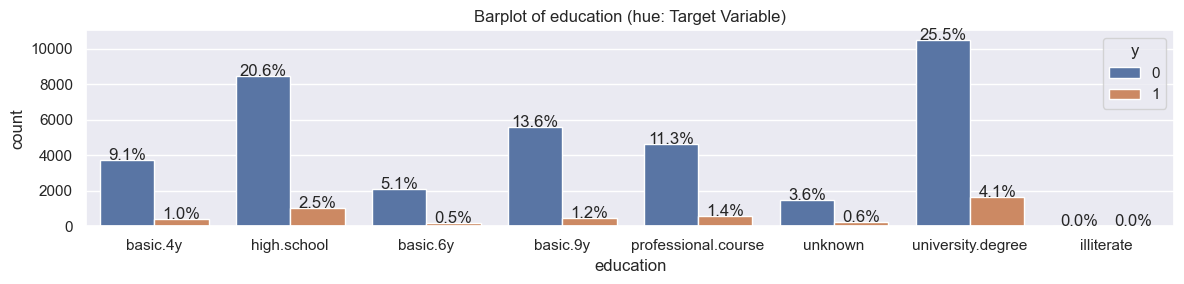

In [167]:
for feature in ['education']:
   plt.figure(figsize=(12,3))
   ax = sns.countplot(data=df, x=feature, hue='y')
   for bar in ax.patches:
      ax.annotate(f'{(bar.get_height()/41118)*100:.1f}%', (bar.get_x() +  bar.get_width()/2, bar.get_height()), ha='center')
   plt.title(f'Barplot of {feature} (hue: Target Variable)')
   plt.tight_layout()
   plt.show()

1. education


y                        0     1  Total  Population_Proportion  Yes_Rate  \
education                                                                  
university.degree    10495  1669  12164                  29.54      14.0   
high.school           8481  1031   9512                  23.10      11.0   
professional.course   4645   595   5240                  12.73      11.0   
basic.9y              5572   473   6045                  14.68       8.0   
basic.4y              3748   428   4176                  10.14      10.0   
unknown               1479   251   1730                   4.20      15.0   
basic.6y              2103   188   2291                   5.56       8.0   
illiterate              14     4     18                   0.04      22.0   

y                    Yes_PProportion  
education                             
university.degree              35.98  
high.school                    22.22  
professional.course            12.83  
basic.9y                       10.20  
basic.4y                        9.23  
unknown                         5.41  
basic.6y                        4.05  
illiterate                      0.09

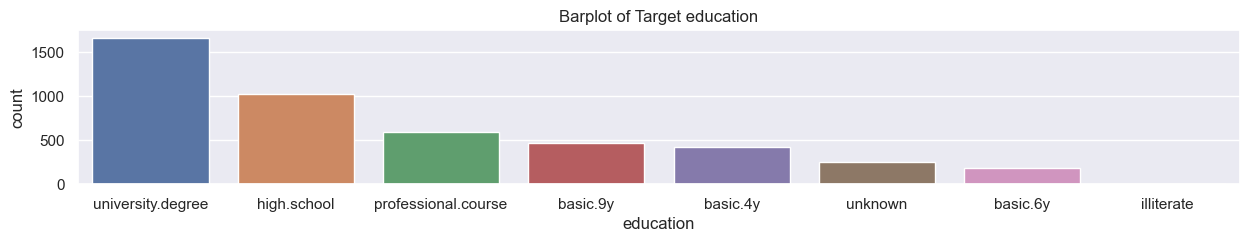

The mode of education is university.degree.
university.degree      1669
high.school            1031
professional.course     595
Name: education, dtype: int64


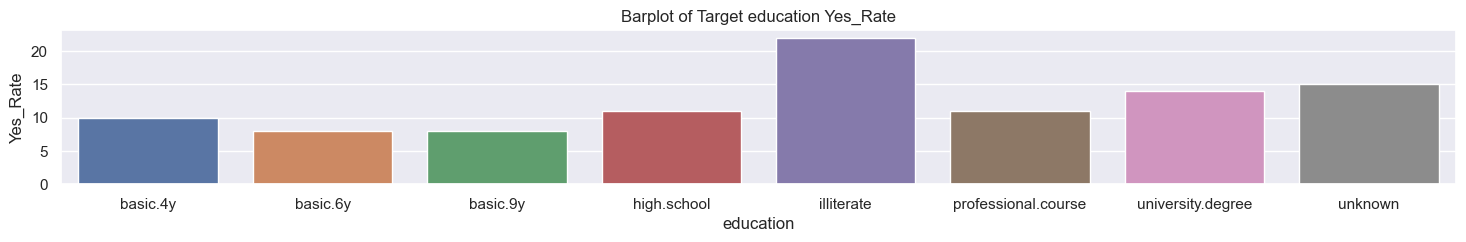


Hypothesis: education is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 3.746768377534744e-38.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type               Mode Mean Median P-value    Stat Test
education  Categorical  university.degree    -      -     0.0  Significant

In [168]:
auto_eda(df, ['education'], 'y', 1)

In summary, we can conclude that:
- Most calls are made to clients with university and high school as their education level.
- The distribution of clients who agree to subscribe is similar to the overall call distribution, with university degree holders at 36% of those who accepted
- The yes rate also shows that `higher education level is a contributing factor in increasing the likelihood for the client to accept subscription to term deposit`, with university degree at 14% rate, which is 1.3 times more likely than high school and professional course 
    - despite having the highest rate, the group 'illiterate' is too few (0,.04% sample proportion) to infer anything. The same case for unknown which has higher yes rate than university degree, but we cannot infer anything due to not being able to classify it

Recommendations:
- Focus on marketing to higher education levels such as university degree, high school and professional course.  

##### 5. `poutcome`

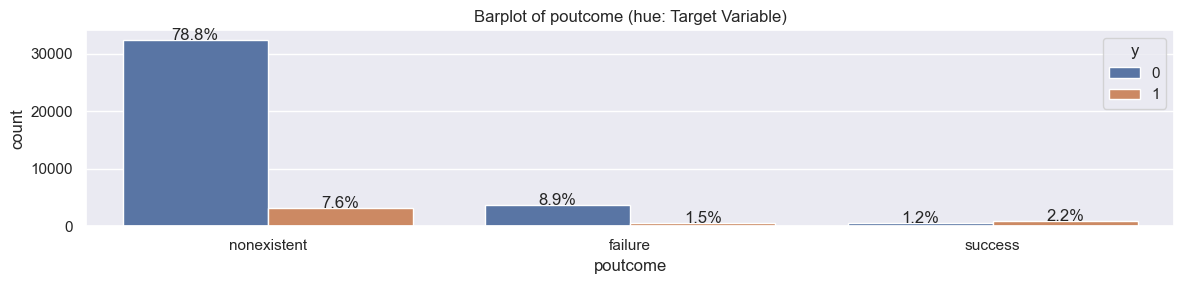

In [169]:
for feature in ['poutcome']:
   plt.figure(figsize=(12,3))
   ax = sns.countplot(data=df, x=feature, hue='y')
   for bar in ax.patches:
      ax.annotate(f'{(bar.get_height()/41118)*100:.1f}%', (bar.get_x() +  bar.get_width()/2, bar.get_height()), ha='center')
   plt.title(f'Barplot of {feature} (hue: Target Variable)')
   plt.tight_layout()
   plt.show()

1. poutcome


y                0     1  Total  Population_Proportion  Yes_Rate  \
poutcome                                                           
nonexistent  32411  3140  35551                  86.34       9.0   
success        479   894   1373                   3.33      65.0   
failure       3647   605   4252                  10.33      14.0   

y            Yes_PProportion  
poutcome                      
nonexistent            67.69  
success                19.27  
failure                13.04

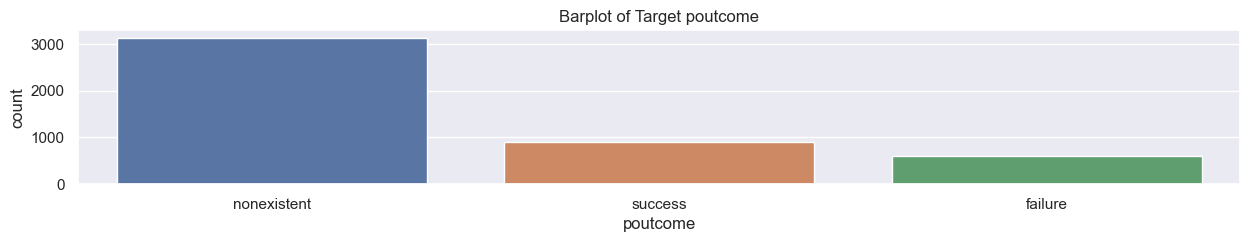

The mode of poutcome is nonexistent.
nonexistent    3140
success         894
failure         605
Name: poutcome, dtype: int64


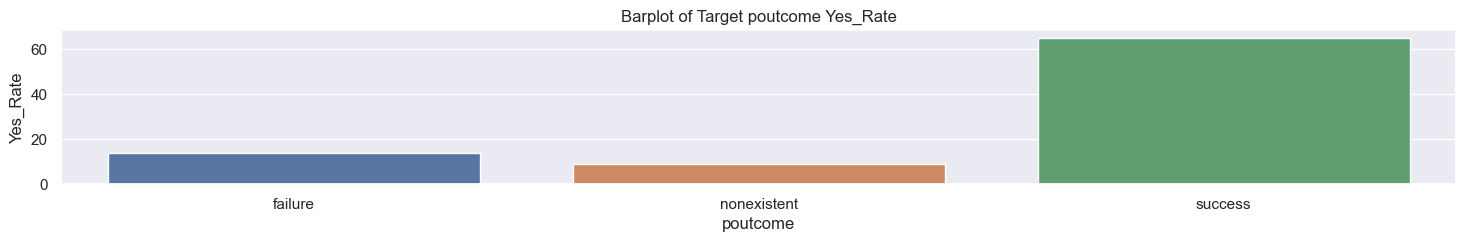


Hypothesis: poutcome is independent from Target variable
Non-binary Variable. Using Chi-Squared Test
p-value: 0.0.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type         Mode Mean Median P-value    Stat Test
poutcome  Categorical  nonexistent    -      -     0.0  Significant

In [170]:
auto_eda(df, ['poutcome'], 'y', 1)

To summarize, we can conclude that:
- Most calls made are to those who have never been called in a previous telemarketing campaign (86%)
- Most subscribers are from those who has never been approached in a previous telemarketing campaign (67.69%)
- Even so, `those who has ever subscribed to a term deposit during the previous campaign (yes rate = 65%) is 4.6 times more likely to agree to subscribe again compared to those who decline during the previous campaign (14%), and 7.2 times more likely than those who never got contacted at the previous campaign`
    - This clearly implies that those who has joined a campaign is more likely to join the next one

Recommendation:
- While calling new clients are always great, focus on marketing to those who have previously subscribed to a term deposit rather than those who is historically unwilling, at least on the previous campaign

##### 6. `contact`

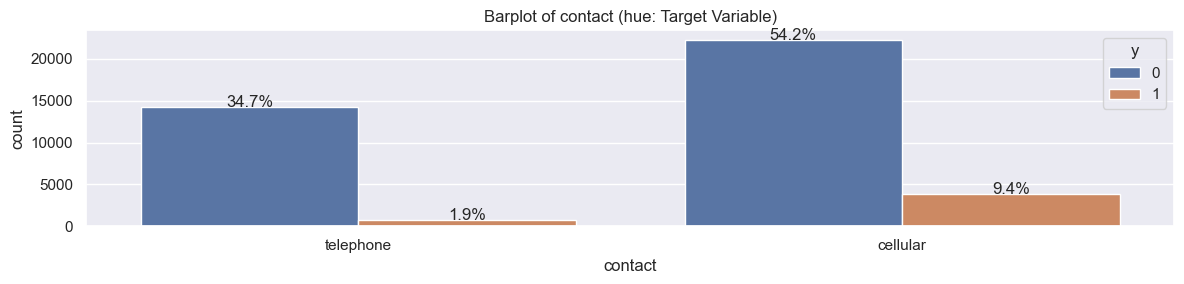

In [171]:
for feature in ['contact']:
   plt.figure(figsize=(12,3))
   ax = sns.countplot(data=df, x=feature, hue='y')
   for bar in ax.patches:
      ax.annotate(f'{(bar.get_height()/41118)*100:.1f}%', (bar.get_x() +  bar.get_width()/2, bar.get_height()), ha='center')
   plt.title(f'Barplot of {feature} (hue: Target Variable)')
   plt.tight_layout()
   plt.show()

1. contact


y              0     1  Total  Population_Proportion  Yes_Rate  \
contact                                                          
cellular   22283  3852  26135                  63.47      15.0   
telephone  14254   787  15041                  36.53       5.0   

y          Yes_PProportion  
contact                     
cellular             83.04  
telephone            16.96

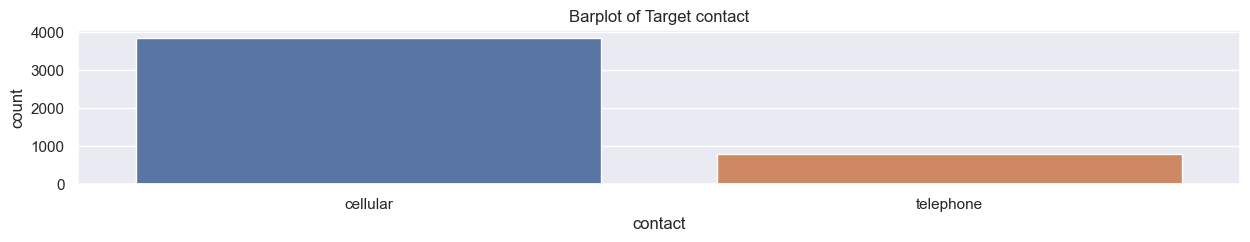

The mode of contact is cellular.
cellular     3852
telephone     787
Name: contact, dtype: int64


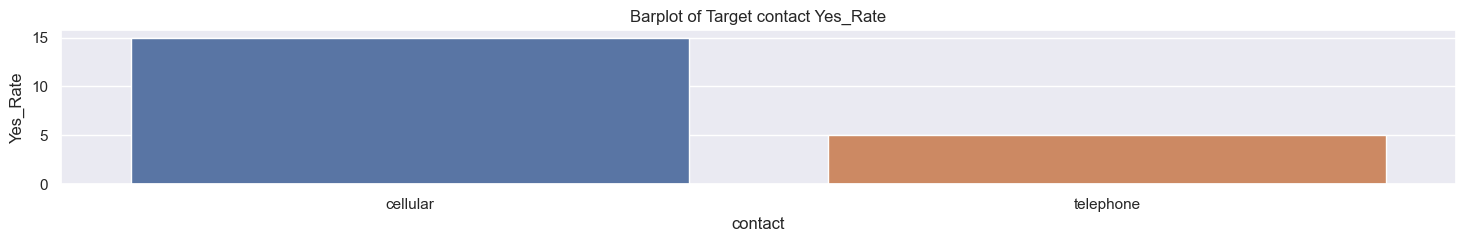


Hypothesis: contact is independent from Target variable
Binary Variable. Using Z-Test
p-value: 1.0679116188639481e-189.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type      Mode Mean Median P-value    Stat Test
contact  Categorical  cellular    -      -     0.0  Significant

In [172]:
auto_eda(df, ['contact'], 'y', 1)

In summary, we can conclude that:
- Most calls are made via cellular (63.5%) than telephone
- The majority of those who agrees to subscribed to a term deposit was called via cellular (83%) with a huge margin compared to via telephone
- The Yes Rate also reflects this, with `clients who got contacted via cellular are 3 times more likely to agree to subscribe to a term deposit than those who got contacted via telephone`

Recommendation:
- Focus on contacting clients via cellular, and only via telephone if there is no other way to contact them

##### 7. `cons.conf.idx`

Distribution of cons.conf.idx:



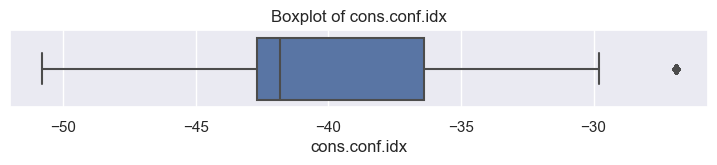

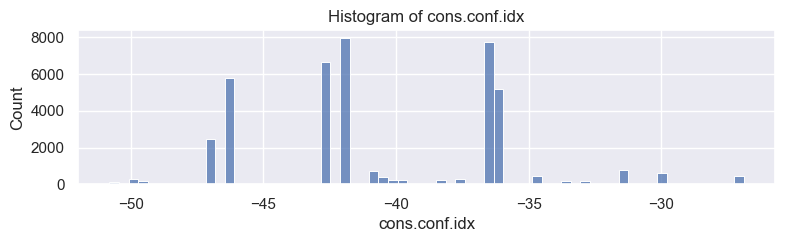

The mode of cons.conf.idx is -36.4.
-36.4    7762
-42.7    6681
-46.2    5793
Name: cons.conf.idx, dtype: int64
The mean of cons.conf.idx is -40.502863318437925.
The median of cons.conf.idx is -41.8.
--------------------------------------------------------------------------------------------------- 



In [173]:
for col in ['cons.conf.idx']:
    print(f'Distribution of {col}:\n')
    if col in continuous_features:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.histplot(data=df, x=df[col])
        plt.title(f'Histogram of {col}')
        plt.show()
    else:
        plt.figure(figsize=(9,1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
        plt.figure(figsize=(9,2))
        sns.countplot(data=df, x=df[col])
        plt.title(f'Barplot of {col}')
        plt.show()
    print(f'The mode of {col} is {df[col].mode()[0]}.')
    print(df[col].value_counts(ascending=False).nlargest(3))
    print(f'The mean of {col} is {df[col].mean()}.')
    print(f'The median of {col} is {df[col].median()}.')
    print('-'*99, '\n')

1. cons.conf.idx


y                 0    1  Total  Population_Proportion  Yes_Rate  \
cons.conf.idx                                                      
-46.2          5269  524   5793                  14.07       9.0   
-47.1          2015  442   2457                   5.97      18.0   
-42.7          6274  407   6681                  16.23       6.0   
-36.1          4902  271   5173                  12.56       5.0   
-40.8           451  264    715                   1.74      37.0   
-31.4           506  264    770                   1.87      34.0   
-36.4          7522  240   7762                  18.85       3.0   
-42.0          3425  190   3615                   8.78       5.0   
-41.8          4186  188   4374                  10.62       4.0   
-26.9           266  180    446                   1.08      40.0   
-40.3           135  176    311                   0.76      57.0   
-30.1           189  168    357                   0.87      47.0   
-34.8           114  150    264                   0.64      57.0   
-37.5           153  150    303                   0.74      50.0   
-50.0           156  126    282                   0.68      45.0   
-40.0            90  122    212                   0.51      58.0   
-38.3           113  120    233                   0.57      52.0   
-39.8           122  107    229                   0.56      47.0   
-29.8           161  106    267                   0.65      40.0   
-34.6            77   97    174                   0.42      56.0   
-49.5           111   93    204                   0.50      46.0   
-33.0            84   88    172                   0.42      51.0   
-33.6           112   65    177                   0.43      37.0   
-50.8            70   58    128                   0.31      45.0   
-40.4            25   42     67                   0.16      63.0   
-45.9             9    1     10                   0.02      10.0   

y              Yes_PProportion  
cons.conf.idx                   
-46.2                    11.30  
-47.1                     9.53  
-42.7                     8.77  
-36.1                     5.84  
-40.8                     5.69  
-31.4                     5.69  
-36.4                     5.17  
-42.0                     4.10  
-41.8                     4.05  
-26.9                     3.88  
-40.3                     3.79  
-30.1                     3.62  
-34.8                     3.23  
-37.5                     3.23  
-50.0                     2.72  
-40.0                     2.63  
-38.3                     2.59  
-39.8                     2.31  
-29.8                     2.28  
-34.6                     2.09  
-49.5                     2.00  
-33.0                     1.90  
-33.6                     1.40  
-50.8                     1.25  
-40.4                     0.91  
-45.9                     0.02

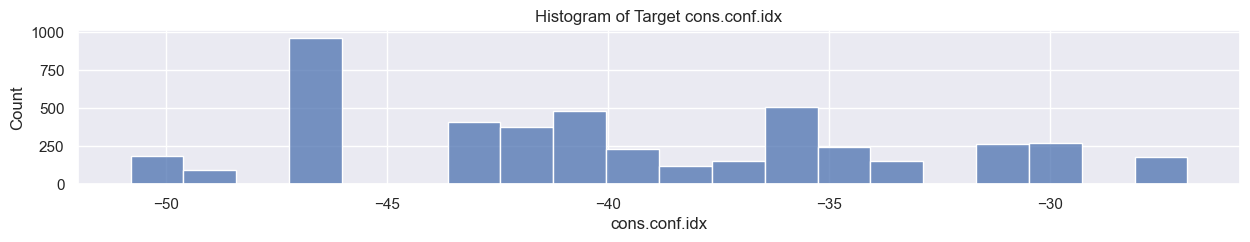

The mode of cons.conf.idx is -46.2.
-46.2    524
-47.1    442
-42.7    407
Name: cons.conf.idx, dtype: int64


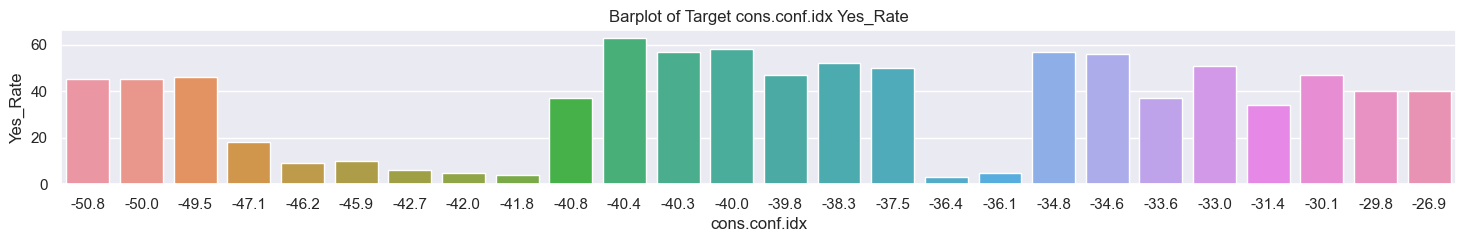

The mean of cons.conf.idx is -39.79111877559819.
The median of cons.conf.idx is -40.4.

Hypothesis: cons.conf.idx is independent from Target variable
The sample data is not normally distributed. Using Mann-Whitney Test
p-value: 7.10134876776393e-17.
Reject H0
--------------------------------------------------------------------------------------------------- 



Data Type  Mode       Mean Median P-value    Stat Test
cons.conf.idx  Continuous -46.2 -39.791119  -40.4     0.0  Significant

In [174]:
auto_eda(df, ['cons.conf.idx'], 'y', 1)

In summary, we can infer that:
- It is clear that the condition during the time the data is taken place at (2008 - 2013; by extension, when the calls were made) is during a pessimistic time against the financial institutions
    - as such, it is easy to say that this model will not be applicable once the time became more optimistic (outside the consumer confidence index (CCI) range of -50 to -26.9)
- Calls were made mostly during the middle of the distribution, where clients are moderately pessimistic in the context of the time (-46 to -36 CCI)
- It is quite difficult to get a clear trend, but in general the yes rate seems to be higher the better the CCI score gets, starting from -40.8 (with yes rate of 37%) and above (making up 60% of those who agrees to subscribe)

Recommendation:
- Focus on marketing when the CCI score is higher (-40.8 and above)

### **7. Conclusion and Recommendation**

#### **Conclusion**

**Model Summary**

In [175]:
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'day_of_week',
                                                   'poutcome', 'default',
                                                   'contact', 'housing',
                                                   'loan']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None                   0
illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                                  ['education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=255,
                                min_data_in_leaf=25, num_iterations=75,
                                num_leaves=36, random_state=42, verbose=-1))])

The following is the characteristics of the final model:
1. The dataset we use has the following features:

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| age | quantitative | Age of client
| job | categorical | Type of job of client
| marital | categorical | Marital status of client
| education | categorical | Education level of client
| default | categorical | Whether the client has credit in default
| housing | categorical | Whether the client has housing loan
| loan | categorical | Whether the client has personal loan
| contact | categorical | Communication channel for contact with client
| month | categorical | Month for last contact with client
| day_of_week | categorical | Day of the week for last contact with client
| campaign | quantitative | Number of times the client was contacted during this campaign, including last contact
| previous | quantitative | Total number of times the client was contacted before this campaign
| poutcome | categorical | Outcome of the previous campaign
| emp.var.rate | quantitative | Employment variation rate (quaterly indicator)
| cons.price.idx | quantitative | Consumer price index (monthly indicator)
| cons.conf.idx | quantitative | Consumer confidence index (monthly indicator)
| euribor3m | quantitative | Euribor 3 month rate (daily indicator)
| nr.employed | quantitative | Average of the Total Number of Employed Citizens (quaterly indicator)
| `y` | categorical | `Target variable`. 'yes': Client subscribed for term deposit. 'no': Client did not subscribe for term deposit.

2. Data Preprocessing:
- Removal of Duplicates
- No Missing Value and Outlier Handling (Missing Value is already filled in as 'unknown')
- Encoding & Scaling as follows:

| **Type** | **Sub-type** | **Preprocessing** | **Variables / Features** |
| --- | --- | --- | --- |
| Quantitative | Continuous | - | `age`, `cons.price.idx`, `cons.conf.idx`, `emp.var.rate`, `euribor3m`, `nr.employed `|
| Quantitative | Discrete | - | `campaign`, `previous`|
| Categorical | Ordinal | Ordinal Encoding | `education` |
| Categorical | Nominal | Onehot Encoding | `marital`, `default`, `day_of_week`, `poutcome`, `default`, `contact`, `housing`, `loan`|
| Categorical | Nominal | Binary Encoding | `job`, `month`|
| Categorical | Target Variable (Binary) | - | `y` |

**Performance**

Confusion Matrix:


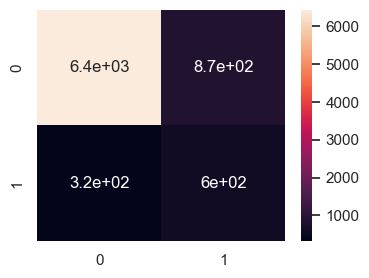

ROC AUC Score Final Model: 0.8152496290083612
Classification Report Final Model: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7308
           1       0.41      0.65      0.50       928

    accuracy                           0.86      8236
   macro avg       0.68      0.77      0.71      8236
weighted avg       0.89      0.86      0.87      8236



In [176]:
y_pred_final = final_model.predict(x1_test)
y_pred_proba_final = final_model.predict_proba(x1_test)

roc_auc_final = roc_auc_score(y1_test, y_pred_proba_final[:,1])
report_final = classification_report(y1_test, y_pred_final)

plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y1_test, y_pred_final), annot=True)
print('Confusion Matrix:')
plt.show()

print('ROC AUC Score Final Model:', roc_auc_final)
print('Classification Report Final Model: \n', report_final)

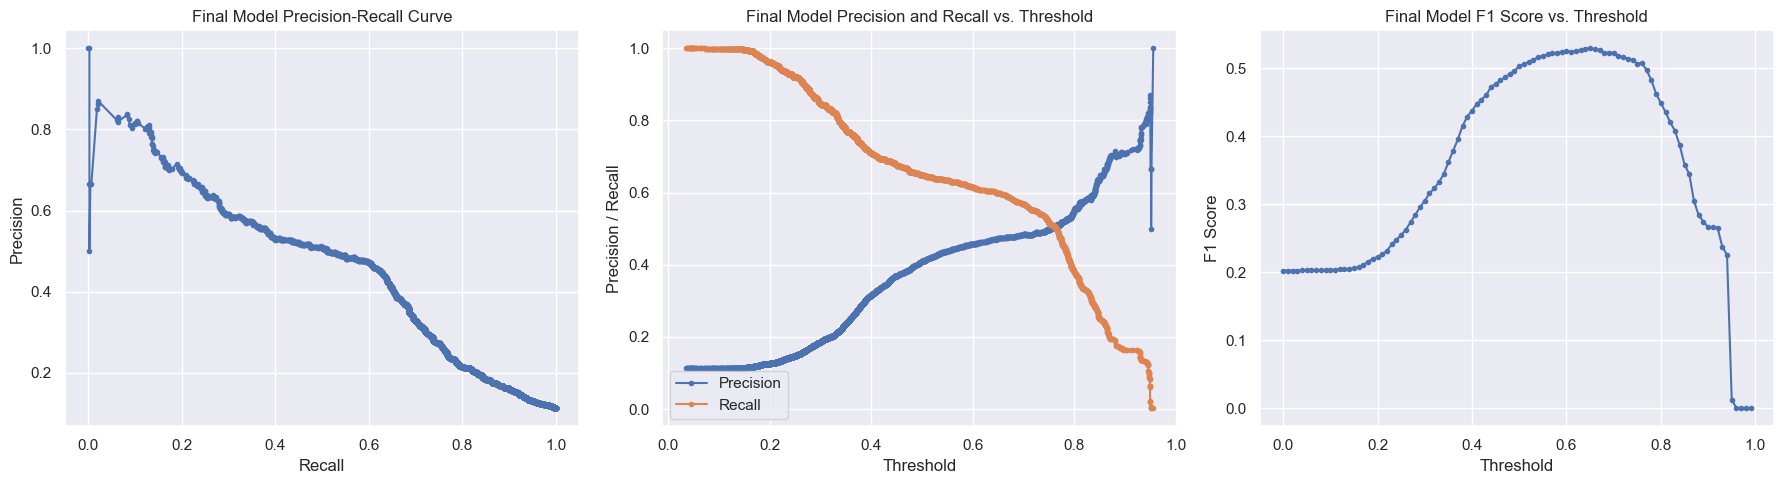

In [177]:
plot_precision_recall_f1(final_model, x1_train, y1_train, x1_test, y1_test, 'Final Model')

Without changing the threhsold (default is 0.5), the model currently performs with an f1 score of 0.50, recall 0.65 and precision of 0.41.

We can interpret this as below:
1. The model is only capable of detecting 65% of those who are interested to subscribe to a term deposit
2. Out of all the clients predicted to be interested to subscribe to a term deposit, only 41% is correctly predicted (those who actually will be willing to subscribe)
    - In other words, 59% of clients contacted are not interested, but are predicted to be interested

The cause of the poor performance is the dataset that is being used to trained, which contains a lot of missing values for the categorical features and the lack of important features.
- In other terms, the result received is the limits of what we can create with the currently available dataset

An alternative solution would be to change the threshold, 

In [178]:
y_pred_proba_final = final_model.predict_proba(x1_test)
y_pred_final = np.where(y_pred_proba_final[:,1] >= 0.33, 1, 0)

report_final = classification_report(y1_test, y_pred_final)

print('Classification Report Final Model (Threshold: 0.33): \n', report_final)

y_pred_proba_final = final_model.predict_proba(x1_test)
y_pred_final = np.where(y_pred_proba_final[:,1] >= 0.6, 1, 0)

report_final = classification_report(y1_test, y_pred_final)

print('Classification Report Final Model (Threshold: 0.6): \n', report_final)

Classification Report Final Model (Threshold: 0.33): 
               precision    recall  f1-score   support

           0       0.96      0.61      0.74      7308
           1       0.21      0.82      0.33       928

    accuracy                           0.63      8236
   macro avg       0.59      0.71      0.54      8236
weighted avg       0.88      0.63      0.70      8236

Classification Report Final Model (Threshold: 0.6): 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7308
           1       0.46      0.61      0.52       928

    accuracy                           0.87      8236
   macro avg       0.70      0.76      0.73      8236
weighted avg       0.89      0.87      0.88      8236



Changing the Threshold value to 0.33 would increase the recall significantly to 0.82 at the cost of the precision at 0.21
- In other terms, the model is able to detect 82% of those who are actually interested, but 79% of the prediction is wrong (actually not interested but predicted as so)

On the contrary, changing the Threshold value to 0.55 would increase the precision by 0.5 (at 0.46) at the cost of 0.4 recal (at 0.61%)
- In other terms, the model is able to detect 61% of those who are actually interested, but only 54% of the prediction is wrong (actually not interested but predicted as so)

Ultimately, the decision to change the treshold is the decision of the stakeholder

On the other side, we got the ROC AUC score of 0.815, which is higher than the score achieved on a research journal made by Moro et al. (2014) conducting predictive modelling for the same dataset with Neural Network as their main algorithm, with ROC AUC score of only 0.80.

As such, it might imply that we have successfuly pushed the dataset to its limit for this modelling

**Profit Opportunity**

Business Value based on Recall

Based on the classification report, the recall value indicates that the model will correctly classify 65% of interested candidates (true positives) from all interested candidates (total of true positives and false negatives).

Based on the paper by Bikker and Gerritsen (2018), (Source: https://onlinelibrary.wiley.com/doi/full/10.1111/irfi.12143), the minimum balance for a time deposit between 2003 - 2014 (similar to the timing in our dataset) is approximately 500 euros minimum. Hence, a successful client subscription means that the bank obtains an additional 500 euros of regulatory capital to meet the capital requirements in alignment to the business objective.

In order to assess and calculate the business value of the model, the following assumptions will be made in a hypothetical future campaign held over 1 year:

- Number of total potential clients to call during a telemarketing campaign held in the future is 8000 people (according to the reference paper for the original dataset, ~40000 clients were called over the period of 5 years, hence, ~40000 / 5 = ~8000)
- Out of 8000 clients, a scenario is assumed where 880 clients are interested and 3120 are not (11%).

In the hypothetical scenario where the model is not used and the assumption that the chance of obtaining a clients falls to a random chance of 50% via telemarketing campaign without model:
- Hence, out of 880 interested clients, 440 clients will subscribe according to a random chance of 50%.
- Over the period of 1 year, the bank stands to gain a minimum of 440 * 500 euros = 220,000 euros hypothetically.

In the hypothetical scenario where the model is used:
- Based on a recall value of 65%, the model will correctly identify 572 clients who will subscribe.
- Over the period of 1 year, the bank stands to gain a minimum of 572 * 500 euros = 285,000 euros hypothetically.

From the above hypothetical scenarios, this comes down to an `additional minimum of 65,000 euros (285,000 - 220,000) per year if the model is used`.

In other words, if the model is not used, the bank might potentially miss out on the chance to obtain an additional 65,000 euros of regulatory capital per year, which is very crucial to the bank due to the conditions imposed by the financial crisis. This is under the assumption they call 8000 potential clients per year and may be more if they call more clients.

Also, it is important to note that the recall value can be increased if the stakeholders decide that lowering the precision is acceptable, hence, the amount of regulatory capital obtained from using this model might be potentially higher than the above calculation.

**Data Analysis**

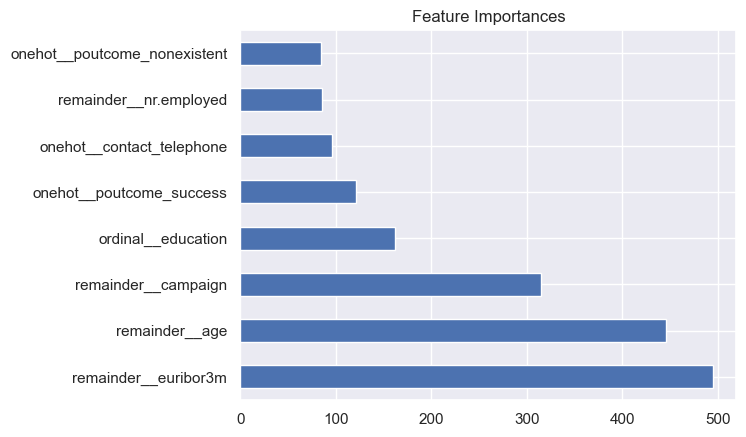

In [179]:
coef1 = pd.Series(final_model['model'].feature_importances_, transformer1.get_feature_names_out()).sort_values(ascending = False).head(8)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

The top 8 most important features would be:
1. `euribor3m`
    - customers who are contacted during lower euribor 3 months rate (0-2%) is 5 times more likely to subscribe than those contacted during high rate (4-6%)
    - There is a good sign of very poorly-targeted telemarketing effort, where most calls were made during high rates (67%) instead of low rates
2. `age`
    - age between 20-40 years is 1.3 times more likely to subscribe than age group of 40-60 years
    - data on other age groups are too few to infer anything, but the current trend says they show great potential of interest
3. `campaign`
    - The odds for a client accepting to subscribe peaked when they are only called once (with 13% chance), and continues to decrease with the more calls have been made
    - We can ideally make a limit on how many calls are we suppose to make before deciding to stop ('give up')
4. `education`
    - Higher education level is a contributing factor in increasing the likelihood for the client to accept subscription to term deposit
5. `poutcome`
    - Those who has ever subscribed to a term deposit during the previous campaign (yes rate = 65%) is 4.6 times more likely to agree to subscribe again compared to those who decline during the previous campaign (14%), and 7.2 times more likely than those who never got contacted at the previous campaign
6. `contact`
    - Clients contacted via cellular are 3 times more likely to agree to subscribe to a term deposit than those who got contacted via telephone
7. `nr.employed`
    - No need for conclusion due to multicolinearity with `euribor3m`
8. `cons.conf.idx`
    - The probability of interest among clients seems to be higher the better the CCI score gets, starting from -40.8 (with yes rate of 37%) and above (making up 60% of those who agrees to subscribe)
    - This model will not be applicable once the time became more optimistic (outside the consumer confidence index (CCI) range of -50 to -26.9)

**Model Limitation**

As previously explained, the model currently is only capable of detecting 65% of those who are actually interested (based on Recall(P)), and only have the prediction accuracy of 41% (based on Precision (P)). In general, we would like to achieve our target metrics score of 80%, but due to the dataset limitation we are not able to achieve a better model even after trying out multiple variations of the dataset.

In regards to the dataset, there are still too many missing values which are still temporarily filled in as 'unknown', which we believe to be one of the more contributing factors to the model's subpar performance due to information loss. Aside of that adding a timestamp (especially for the year the data was taken) would significantly help understanding the context of the data.

**Recommendation**
Business Recommendations:
- Maximize all calls made during low euribor 3 months rates (0-2%), more optimistic CCI (>-40.8) and via Cellular
- Focus on marketing to high-educated clients around the age of 20-40 who historically have shown interest to subscribe to a term deposit in the previous campaigns
- Stakeholders should decide on the probability threshold to deem a client not worth continue pursuing to know when to stop calling clients

Model & Dataset Recommendations:
- Stakeholders should decide on which threshold to go with in order to best satisfy the business goal
- Add timestamp to the dataset (currently there is way to distinguish the year the data was taken)
- Increase more features, such as:
    - Regarding the demographic of the client (gender, kids at home, family size, income level, etc.),
    - The agent/caller who approached the client (experience, gender, tenure), and 
    - More context on the socio-economic condition at the time.
- Collect more data on:
    - Telemarketing calls during mid euribor 3 month rates (2-4%) to gain more data
    - Clients' interest to subscribe to term deposit at the age of below 20 and above 60
- Try modelling with other more complex algorithms (Neural Network, SVC, etc) and rebalancing methods
- Do hyperparameter tuning with more parameters considered

****

### **8. Saving Model**

In [180]:
# Saving model using Pickle
filename = 'Final_Project_Raymond_Dicky'
pickle.dump(final_model, open(filename,'wb'))